In [2]:
import pandas as pd

merged_df = pd.read_csv("/Users/alvinthosatria/Documents/FYP/FYP/concatenated_features.csv")


filtered_features = []
for column in merged_df.columns:
    if column.startswith("esm_") or column.startswith("emb"):
        continue

    filtered_features.append(column)

filtered_features

['median_TPM',
 'protein_aa_freq_S',
 'cdna_mfe',
 'protein_instability',
 '5utr_length',
 'protein_aa_freq_C',
 'protein_helix_frac',
 'protein_aa_freq_K',
 'protein_aa_freq_H',
 'protein_aa_freq_P',
 'protein_aa_freq_I',
 '3utr_paired_ratio',
 'protein_aa_freq_M',
 'kozak_score',
 'protein_aa_freq_A',
 'protein_abundance_log']

In [3]:
merged_df

,median_TPM,protein_aa_freq_S,cdna_mfe,protein_instability,5utr_length,protein_aa_freq_C,protein_helix_frac,protein_aa_freq_K,protein_aa_freq_H,protein_aa_freq_P,...,esm_struct_374,esm_struct_375,esm_struct_376,esm_struct_377,esm_struct_378,esm_struct_379,esm_struct_380,esm_struct_381,esm_struct_382,esm_struct_383
0,-2.302585,0.069418,-14.397205,47.149737,6.066108,0.015009,0.292683,0.022514,0.018762,0.071295,...,73.373010,72.970220,12.923666,95.889725,51.059320,101.878426,-2.101057,-19.723396,135.783810,213.12137
1,2.432297,0.045082,-9.758310,36.974590,4.158883,0.012295,0.385246,0.049180,0.020492,0.061475,...,68.257310,60.291650,23.755404,109.030050,71.852974,96.979670,-5.143823,-20.785597,135.948970,225.27715
2,1.319086,0.088993,-11.061036,49.644988,5.093750,0.025761,0.271663,0.060890,0.035129,0.067916,...,83.333984,47.796707,10.249809,112.114845,54.815975,92.964690,13.249508,-8.416548,143.190410,230.09184
3,2.598607,0.078125,-10.534878,54.413438,5.393628,0.090625,0.321875,0.084375,0.037500,0.021875,...,59.012886,55.144268,7.491446,105.824670,103.813060,96.018524,-12.567250,-28.538748,109.231544,228.63722
4,2.086914,0.064516,-10.215169,34.719124,3.091042,0.011521,0.368664,0.087558,0.029954,0.018433,...,81.520420,42.850110,15.061850,79.176130,45.563927,76.292450,5.719397,-26.815514,141.263870,236.35191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7874,1.147402,0.082418,-10.814631,36.865934,4.882802,0.010989,0.346154,0.010989,0.010989,0.043956,...,68.545890,54.651220,27.990210,126.722830,88.860085,119.819840,-2.006317,-38.220192,116.409584,234.39198
7875,1.111858,0.074026,-12.283579,41.112610,5.273000,0.015584,0.385714,0.058442,0.025974,0.040260,...,62.303730,53.460125,37.014782,99.942940,69.377830,92.277370,6.069344,-22.673060,117.575730,221.72969
7876,1.214913,0.067265,-14.544234,53.725112,3.135494,0.015695,0.320628,0.024664,0.035874,0.065022,...,62.095028,67.709090,17.100504,102.763570,73.797020,109.286156,-3.990773,-7.868795,115.358430,216.32007
7877,1.249902,0.074380,-12.109897,64.338168,4.828314,0.016529,0.355372,0.045455,0.024793,0.068871,...,51.527200,73.513790,25.403866,105.522064,71.612724,99.531525,-12.912899,-21.747282,108.563416,217.93704


# Linear Regression


10-Fold Cross Validation RMSE: 2.41 (+/- 0.10)


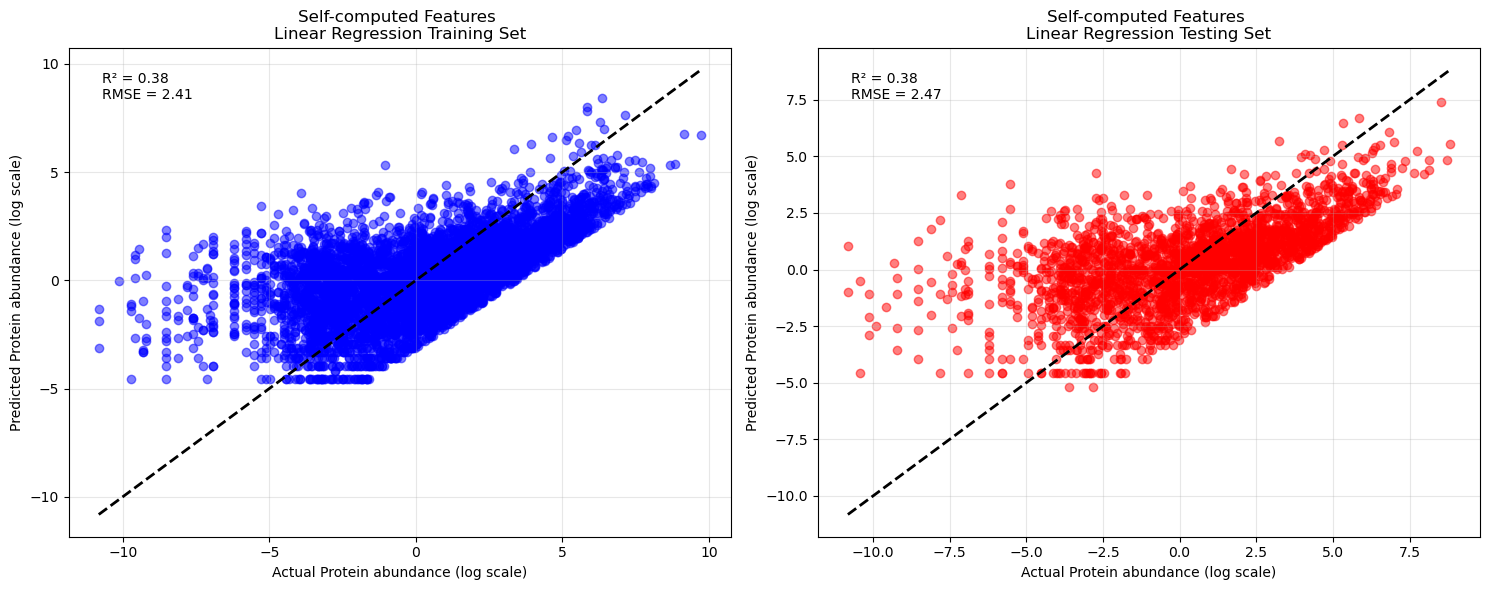


Model Parameters:
Coefficient: 1.8807
Intercept: 0.2694


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import os
import random

X = merged_df["median_TPM"].values.reshape(-1, 1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2
cv_rmse_pct = (cv_mean / np.mean(y_train)) * 100

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)

    ax.set_xlabel("Actual Protein abundance (log scale)")
    ax.set_ylabel("Predicted Protein abundance (log scale)")
    ax.set_title(f"Self-computed Features \n{title}")
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(ax1, y_train, y_train_pred, "Linear Regression Training Set", "blue")
plot_predictions(ax2, y_test, y_test_pred, "Linear Regression Testing Set", "red")

plt.tight_layout()
plt.show()

print("\nModel Parameters:")
print(f"Coefficient: {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Multilinear Regression


10-Fold Cross Validation RMSE: 2.28 (+/- 0.14)


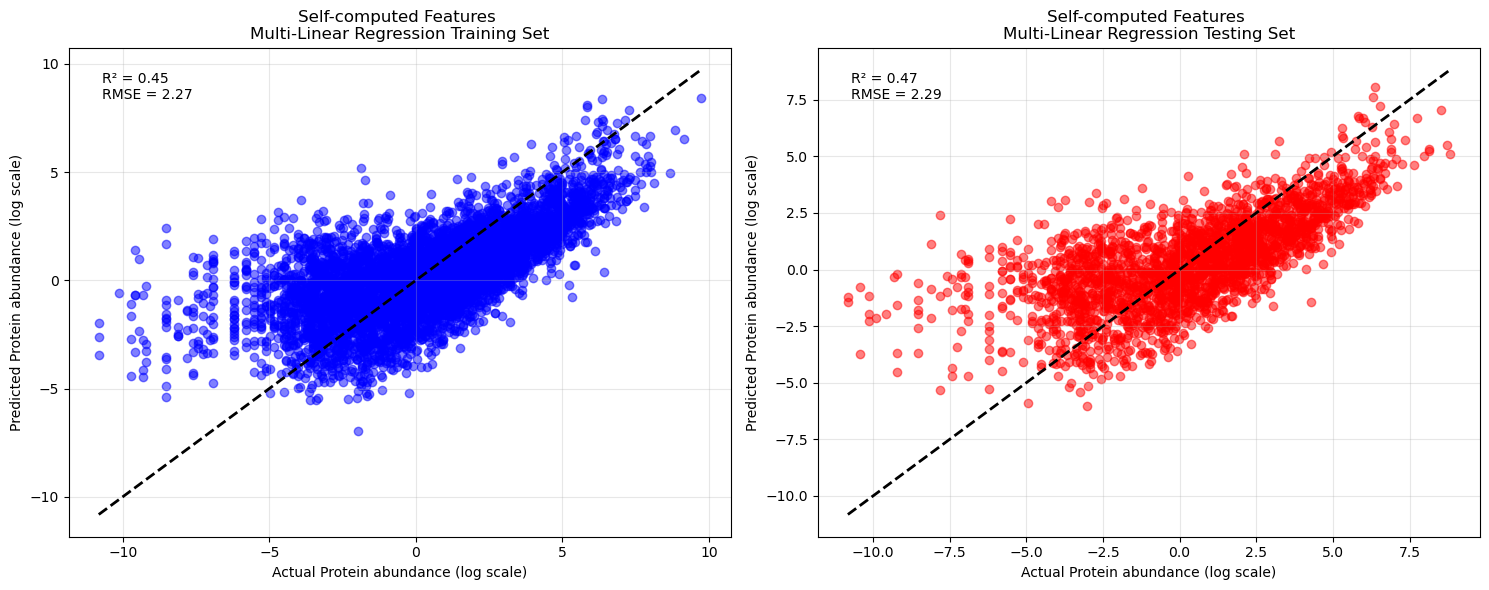


Model Parameters:
Coefficient: 1.6975
Intercept: 0.2694


In [13]:
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seeds(42)

X = merged_df[filtered_features].drop("protein_abundance_log", axis=1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

cv_scores = cross_val_score(
    lr_model, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot([min_val, max_val], [min_val, max_val], "k--", lw=2)

    ax.set_xlabel("Actual Protein abundance (log scale)")
    ax.set_ylabel("Predicted Protein abundance (log scale)")
    ax.set_title(f"Self-computed Features \n{title}")
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(ax1, y_train, y_train_pred, "Multi-Linear Regression Training Set", "blue")
plot_predictions(ax2, y_test, y_test_pred, "Multi-Linear Regression Testing Set", "red")

plt.tight_layout()
plt.show()

print("\nModel Parameters:")
print(f"Coefficient: {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Random Forest Regressor

# Optuna Param Tuning

In [6]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = merged_df[filtered_features].drop("protein_abundance_log", axis=1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_categorical("max_depth", [10, 20, 30, 40, 50, None]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        'max_samples': trial.suggest_float('max_samples', 0.5, 1.0)
    }

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    r2_diff = train_r2 - test_r2

    print(f"\nTrial {trial.number}:")
    print(f"Parameters: {params}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"R² difference: {r2_diff:.4f}")

    penalty = 0
    if r2_diff >= 0.15:
        penalty = r2_diff - 0.15  # Penalty proportional to excess overfitting
        print(f"Overfitting detected! Applying penalty: {penalty:.4f}")

    penalized_test_r2 = test_r2 - penalty
    print(f"Penalized Test R²: {penalized_test_r2:.4f}")
    
    return penalized_test_r2


study = optuna.create_study(direction="maximize")

def print_progress(study, trial):
    print(f"\nBest trial so far: {study.best_trial.number}")
    print(f"Best penalized R² score so far: {study.best_value:.4f}")
    print(f"Best parameters so far: {study.best_params}")


print("Starting hyperparameter optimization...")
n_trials = 250
study.optimize(objective, n_trials=n_trials, callbacks=[print_progress])

print("\nOptimization completed!")
print(f"Best penalized R² score: {study.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

try:
    import optuna.visualization as vis
    import matplotlib.pyplot as plt

    fig1 = vis.plot_optimization_history(study)
    fig1.show()

    fig2 = vis.plot_param_importances(study)
    fig2.show()
except ImportError:
    print(
        "Optuna visualization is not available. Install optuna[visualization] to see plots."
    )

[I 2025-04-04 17:09:26,034] A new study created in memory with name: no-name-b437cd84-c116-4518-8da8-82902de0a58f


Starting hyperparameter optimization...


[I 2025-04-04 17:09:26,824] Trial 0 finished with value: 0.4578737687656971 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_samples': 0.8163699427066241}. Best is trial 0 with value: 0.4578737687656971.



Trial 0:
Parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_samples': 0.8163699427066241}
Train R²: 0.5590
Test R²: 0.4579
R² difference: 0.1012
Penalized Test R²: 0.4579

Best trial so far: 0
Best penalized R² score so far: 0.4579
Best parameters so far: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_samples': 0.8163699427066241}


[I 2025-04-04 17:09:27,659] Trial 1 finished with value: 0.46480640893501024 and parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}. Best is trial 1 with value: 0.46480640893501024.



Trial 1:
Parameters: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}
Train R²: 0.5851
Test R²: 0.4648
R² difference: 0.1203
Penalized Test R²: 0.4648

Best trial so far: 1
Best penalized R² score so far: 0.4648
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}


[I 2025-04-04 17:09:28,301] Trial 2 finished with value: 0.4412042359866556 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8479605344534761}. Best is trial 1 with value: 0.46480640893501024.



Trial 2:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.8479605344534761}
Train R²: 0.6543
Test R²: 0.4727
R² difference: 0.1815
Overfitting detected! Applying penalty: 0.0315
Penalized Test R²: 0.4412

Best trial so far: 1
Best penalized R² score so far: 0.4648
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}


[I 2025-04-04 17:09:29,214] Trial 3 finished with value: 0.4640826107355791 and parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.5061915883032267}. Best is trial 1 with value: 0.46480640893501024.



Trial 3:
Parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_samples': 0.5061915883032267}
Train R²: 0.5742
Test R²: 0.4641
R² difference: 0.1101
Penalized Test R²: 0.4641

Best trial so far: 1
Best penalized R² score so far: 0.4648
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}


[I 2025-04-04 17:09:30,027] Trial 4 finished with value: 0.39141115837827434 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.8303914110587312}. Best is trial 1 with value: 0.46480640893501024.



Trial 4:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_samples': 0.8303914110587312}
Train R²: 0.7132
Test R²: 0.4773
R² difference: 0.2359
Overfitting detected! Applying penalty: 0.0859
Penalized Test R²: 0.3914

Best trial so far: 1
Best penalized R² score so far: 0.4648
Best parameters so far: {'n_estimators': 800, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_features': 'log2', 'max_samples': 0.7618539432194158}


[I 2025-04-04 17:09:30,650] Trial 5 finished with value: 0.46489149354754966 and parameters: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}. Best is trial 5 with value: 0.46489149354754966.



Trial 5:
Parameters: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}
Train R²: 0.5893
Test R²: 0.4649
R² difference: 0.1244
Penalized Test R²: 0.4649

Best trial so far: 5
Best penalized R² score so far: 0.4649
Best parameters so far: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}


[I 2025-04-04 17:09:31,631] Trial 6 finished with value: 0.4457753918531141 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.9929517074315154}. Best is trial 5 with value: 0.46489149354754966.



Trial 6:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.9929517074315154}
Train R²: 0.6472
Test R²: 0.4715
R² difference: 0.1757
Overfitting detected! Applying penalty: 0.0257
Penalized Test R²: 0.4458

Best trial so far: 5
Best penalized R² score so far: 0.4649
Best parameters so far: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}


[I 2025-04-04 17:09:32,644] Trial 7 finished with value: 0.45829124311687763 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_samples': 0.9201251946535145}. Best is trial 5 with value: 0.46489149354754966.



Trial 7:
Parameters: {'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_samples': 0.9201251946535145}
Train R²: 0.5609
Test R²: 0.4583
R² difference: 0.1027
Penalized Test R²: 0.4583

Best trial so far: 5
Best penalized R² score so far: 0.4649
Best parameters so far: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}


[I 2025-04-04 17:09:33,235] Trial 8 finished with value: 0.3297330448821806 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.7632829198162097}. Best is trial 5 with value: 0.46489149354754966.



Trial 8:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.7632829198162097}
Train R²: 0.7805
Test R²: 0.4801
R² difference: 0.3004
Overfitting detected! Applying penalty: 0.1504
Penalized Test R²: 0.3297

Best trial so far: 5
Best penalized R² score so far: 0.4649
Best parameters so far: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.6448633899883298}


[I 2025-04-04 17:09:34,267] Trial 9 finished with value: 0.46659725861597934 and parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}. Best is trial 9 with value: 0.46659725861597934.



Trial 9:
Parameters: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}
Train R²: 0.6043
Test R²: 0.4666
R² difference: 0.1377
Penalized Test R²: 0.4666

Best trial so far: 9
Best penalized R² score so far: 0.4666
Best parameters so far: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}


[I 2025-04-04 17:09:34,511] Trial 10 finished with value: 0.46376529375049913 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6474290475442976}. Best is trial 9 with value: 0.46659725861597934.



Trial 10:
Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 28, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.6474290475442976}
Train R²: 0.5920
Test R²: 0.4638
R² difference: 0.1283
Penalized Test R²: 0.4638

Best trial so far: 9
Best penalized R² score so far: 0.4666
Best parameters so far: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}


[I 2025-04-04 17:09:34,912] Trial 11 finished with value: 0.4632080833937682 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_samples': 0.6200778972399194}. Best is trial 9 with value: 0.46659725861597934.
[I 2025-04-04 17:09:35,045] Trial 12 finished with value: 0.4536626898931133 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 30, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_samples': 0.6631764403011382}. Best is trial 9 with value: 0.46659725861597934.



Trial 11:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_samples': 0.6200778972399194}
Train R²: 0.5756
Test R²: 0.4632
R² difference: 0.1124
Penalized Test R²: 0.4632

Best trial so far: 9
Best penalized R² score so far: 0.4666
Best parameters so far: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}

Trial 12:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 30, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_samples': 0.6631764403011382}
Train R²: 0.5538
Test R²: 0.4537
R² difference: 0.1001
Penalized Test R²: 0.4537

Best trial so far: 9
Best penalized R² score so far: 0.4666
Best parameters so far: {'n_estimators': 1000, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.8430267802386793}


[I 2025-04-04 17:09:35,356] Trial 13 finished with value: 0.46741502908712684 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}. Best is trial 13 with value: 0.46741502908712684.



Trial 13:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}
Train R²: 0.5952
Test R²: 0.4674
R² difference: 0.1278
Penalized Test R²: 0.4674

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:35,672] Trial 14 finished with value: 0.4665460601975596 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5156314410048006}. Best is trial 13 with value: 0.46741502908712684.



Trial 14:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5156314410048006}
Train R²: 0.6067
Test R²: 0.4665
R² difference: 0.1402
Penalized Test R²: 0.4665

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:36,119] Trial 15 finished with value: 0.4416370754211201 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.9080130569204683}. Best is trial 13 with value: 0.46741502908712684.
[I 2025-04-04 17:09:36,258] Trial 16 finished with value: 0.365358843833427 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5630937208142699}. Best is trial 13 with value: 0.46741502908712684.



Trial 15:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_samples': 0.9080130569204683}
Train R²: 0.6540
Test R²: 0.4728
R² difference: 0.1812
Overfitting detected! Applying penalty: 0.0312
Penalized Test R²: 0.4416

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}

Trial 16:
Parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5630937208142699}
Train R²: 0.7238
Test R²: 0.4696
R² difference: 0.2542
Overfitting detected! Applying penalty: 0.1042
Penalized Test R²: 0.3654

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8

[I 2025-04-04 17:09:36,584] Trial 17 finished with value: 0.46215974012403205 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 26, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.6970125800033601}. Best is trial 13 with value: 0.46741502908712684.



Trial 17:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 26, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_samples': 0.6970125800033601}
Train R²: 0.5677
Test R²: 0.4622
R² difference: 0.1055
Penalized Test R²: 0.4622

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:37,117] Trial 18 finished with value: 0.45656004815962936 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.709284052028265}. Best is trial 13 with value: 0.46741502908712684.



Trial 18:
Parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_samples': 0.709284052028265}
Train R²: 0.6337
Test R²: 0.4701
R² difference: 0.1636
Overfitting detected! Applying penalty: 0.0136
Penalized Test R²: 0.4566

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:37,462] Trial 19 finished with value: 0.46144534387144376 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.9184421404160956}. Best is trial 13 with value: 0.46741502908712684.



Trial 19:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.9184421404160956}
Train R²: 0.6247
Test R²: 0.4681
R² difference: 0.1566
Overfitting detected! Applying penalty: 0.0066
Penalized Test R²: 0.4614

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:38,123] Trial 20 finished with value: 0.4606666616185341 and parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.5822966357795841}. Best is trial 13 with value: 0.46741502908712684.



Trial 20:
Parameters: {'n_estimators': 700, 'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 11, 'max_features': 'log2', 'max_samples': 0.5822966357795841}
Train R²: 0.5637
Test R²: 0.4607
R² difference: 0.1031
Penalized Test R²: 0.4607

Best trial so far: 13
Best penalized R² score so far: 0.4674
Best parameters so far: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5444276010355653}


[I 2025-04-04 17:09:38,444] Trial 21 finished with value: 0.46832488648140136 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}. Best is trial 21 with value: 0.46832488648140136.



Trial 21:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}
Train R²: 0.6055
Test R²: 0.4683
R² difference: 0.1372
Penalized Test R²: 0.4683

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:38,681] Trial 22 finished with value: 0.46601131279911956 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5619807463335733}. Best is trial 21 with value: 0.46832488648140136.



Trial 22:
Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5619807463335733}
Train R²: 0.6014
Test R²: 0.4660
R² difference: 0.1354
Penalized Test R²: 0.4660

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:39,098] Trial 23 finished with value: 0.4414989938372237 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5287663298558763}. Best is trial 21 with value: 0.46832488648140136.



Trial 23:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5287663298558763}
Train R²: 0.6518
Test R²: 0.4716
R² difference: 0.1801
Overfitting detected! Applying penalty: 0.0301
Penalized Test R²: 0.4415

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:39,337] Trial 24 finished with value: 0.46341660311077826 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.6016126969287868}. Best is trial 21 with value: 0.46832488648140136.



Trial 24:
Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.6016126969287868}
Train R²: 0.6237
Test R²: 0.4686
R² difference: 0.1552
Overfitting detected! Applying penalty: 0.0052
Penalized Test R²: 0.4634

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:39,902] Trial 25 finished with value: 0.4653909651158561 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.8694598989312858}. Best is trial 21 with value: 0.46832488648140136.



Trial 25:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.8694598989312858}
Train R²: 0.5988
Test R²: 0.4654
R² difference: 0.1335
Penalized Test R²: 0.4654

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:40,259] Trial 26 finished with value: 0.37015648255436595 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.8029029085072388}. Best is trial 21 with value: 0.46832488648140136.



Trial 26:
Parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.8029029085072388}
Train R²: 0.7375
Test R²: 0.4788
R² difference: 0.2587
Overfitting detected! Applying penalty: 0.1087
Penalized Test R²: 0.3702

Best trial so far: 21
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5068454148101275}


[I 2025-04-04 17:09:40,649] Trial 27 finished with value: 0.46834378842769 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5515586862824877}. Best is trial 27 with value: 0.46834378842769.



Trial 27:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5515586862824877}
Train R²: 0.6138
Test R²: 0.4683
R² difference: 0.1455
Penalized Test R²: 0.4683

Best trial so far: 27
Best penalized R² score so far: 0.4683
Best parameters so far: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5515586862824877}


[I 2025-04-04 17:09:41,050] Trial 28 finished with value: 0.46882302358836714 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}. Best is trial 28 with value: 0.46882302358836714.



Trial 28:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}
Train R²: 0.6212
Test R²: 0.4700
R² difference: 0.1512
Overfitting detected! Applying penalty: 0.0012
Penalized Test R²: 0.4688

Best trial so far: 28
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}


[I 2025-04-04 17:09:41,444] Trial 29 finished with value: 0.45873783818490776 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5029629066400838}. Best is trial 28 with value: 0.46882302358836714.



Trial 29:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5029629066400838}
Train R²: 0.6360
Test R²: 0.4723
R² difference: 0.1636
Overfitting detected! Applying penalty: 0.0136
Penalized Test R²: 0.4587

Best trial so far: 28
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}


[I 2025-04-04 17:09:41,954] Trial 30 finished with value: 0.4680702096240844 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6050232940698187}. Best is trial 28 with value: 0.46882302358836714.



Trial 30:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6050232940698187}
Train R²: 0.6207
Test R²: 0.4694
R² difference: 0.1513
Overfitting detected! Applying penalty: 0.0013
Penalized Test R²: 0.4681

Best trial so far: 28
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}


[I 2025-04-04 17:09:42,461] Trial 31 finished with value: 0.46826089589252484 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6017360404949675}. Best is trial 28 with value: 0.46882302358836714.



Trial 31:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6017360404949675}
Train R²: 0.6054
Test R²: 0.4683
R² difference: 0.1372
Penalized Test R²: 0.4683

Best trial so far: 28
Best penalized R² score so far: 0.4688
Best parameters so far: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5489070590653752}


[I 2025-04-04 17:09:43,051] Trial 32 finished with value: 0.4689508333701554 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}. Best is trial 32 with value: 0.4689508333701554.



Trial 32:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}
Train R²: 0.6041
Test R²: 0.4690
R² difference: 0.1352
Penalized Test R²: 0.4690

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:43,723] Trial 33 finished with value: 0.4686722082715049 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5544187662453324}. Best is trial 32 with value: 0.4689508333701554.



Trial 33:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5544187662453324}
Train R²: 0.6111
Test R²: 0.4687
R² difference: 0.1425
Penalized Test R²: 0.4687

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:44,420] Trial 34 finished with value: 0.4675112683077224 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.551251547327094}. Best is trial 32 with value: 0.4689508333701554.



Trial 34:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.551251547327094}
Train R²: 0.6229
Test R²: 0.4702
R² difference: 0.1527
Overfitting detected! Applying penalty: 0.0027
Penalized Test R²: 0.4675

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:45,227] Trial 35 finished with value: 0.4637877918275517 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6755727214288578}. Best is trial 32 with value: 0.4689508333701554.



Trial 35:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6755727214288578}
Train R²: 0.6246
Test R²: 0.4692
R² difference: 0.1554
Overfitting detected! Applying penalty: 0.0054
Penalized Test R²: 0.4638

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:45,851] Trial 36 finished with value: 0.4681951041743778 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5807113547211828}. Best is trial 32 with value: 0.4689508333701554.



Trial 36:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5807113547211828}
Train R²: 0.6056
Test R²: 0.4682
R² difference: 0.1374
Penalized Test R²: 0.4682

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:46,555] Trial 37 finished with value: 0.44933524050628504 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5482670141456568}. Best is trial 32 with value: 0.4689508333701554.



Trial 37:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5482670141456568}
Train R²: 0.6472
Test R²: 0.4733
R² difference: 0.1739
Overfitting detected! Applying penalty: 0.0239
Penalized Test R²: 0.4493

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:47,176] Trial 38 finished with value: 0.45555538602258905 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6252136767690558}. Best is trial 32 with value: 0.4689508333701554.



Trial 38:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6252136767690558}
Train R²: 0.6373
Test R²: 0.4714
R² difference: 0.1659
Overfitting detected! Applying penalty: 0.0159
Penalized Test R²: 0.4556

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:48,130] Trial 39 finished with value: 0.42705472515663934 and parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.7438465526270865}. Best is trial 32 with value: 0.4689508333701554.



Trial 39:
Parameters: {'n_estimators': 900, 'max_depth': 40, 'min_samples_split': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.7438465526270865}
Train R²: 0.6724
Test R²: 0.4747
R² difference: 0.1977
Overfitting detected! Applying penalty: 0.0477
Penalized Test R²: 0.4271

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:48,729] Trial 40 finished with value: 0.45875847814416304 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5804368029056887}. Best is trial 32 with value: 0.4689508333701554.



Trial 40:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5804368029056887}
Train R²: 0.6300
Test R²: 0.4694
R² difference: 0.1606
Overfitting detected! Applying penalty: 0.0106
Penalized Test R²: 0.4588

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:49,111] Trial 41 finished with value: 0.4619886239528159 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.536337625898462}. Best is trial 32 with value: 0.4689508333701554.



Trial 41:
Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.536337625898462}
Train R²: 0.5786
Test R²: 0.4620
R² difference: 0.1166
Penalized Test R²: 0.4620

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:49,869] Trial 42 finished with value: 0.4674676586847839 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.509016608962812}. Best is trial 32 with value: 0.4689508333701554.



Trial 42:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.509016608962812}
Train R²: 0.6131
Test R²: 0.4675
R² difference: 0.1456
Penalized Test R²: 0.4675

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:50,540] Trial 43 finished with value: 0.4458123257751644 and parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5265183730310947}. Best is trial 32 with value: 0.4689508333701554.



Trial 43:
Parameters: {'n_estimators': 700, 'max_depth': 40, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5265183730310947}
Train R²: 0.6467
Test R²: 0.4712
R² difference: 0.1754
Overfitting detected! Applying penalty: 0.0254
Penalized Test R²: 0.4458

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:51,150] Trial 44 finished with value: 0.4665015052437448 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.6310350991562603}. Best is trial 32 with value: 0.4689508333701554.



Trial 44:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.6310350991562603}
Train R²: 0.6032
Test R²: 0.4665
R² difference: 0.1367
Penalized Test R²: 0.4665

Best trial so far: 32
Best penalized R² score so far: 0.4690
Best parameters so far: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5551084685672385}


[I 2025-04-04 17:09:51,543] Trial 45 finished with value: 0.4717434750352576 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}. Best is trial 45 with value: 0.4717434750352576.



Trial 45:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}
Train R²: 0.6214
Test R²: 0.4717
R² difference: 0.1496
Penalized Test R²: 0.4717

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:52,061] Trial 46 finished with value: 0.4377731513014549 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5639169847397758}. Best is trial 45 with value: 0.4717434750352576.



Trial 46:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5639169847397758}
Train R²: 0.6583
Test R²: 0.4731
R² difference: 0.1853
Overfitting detected! Applying penalty: 0.0353
Penalized Test R²: 0.4378

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:52,875] Trial 47 finished with value: 0.45085818830757296 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5844059305793212}. Best is trial 45 with value: 0.4717434750352576.



Trial 47:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5844059305793212}
Train R²: 0.6446
Test R²: 0.4728
R² difference: 0.1719
Overfitting detected! Applying penalty: 0.0219
Penalized Test R²: 0.4509

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:53,275] Trial 48 finished with value: 0.4701634318136253 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.529022049420326}. Best is trial 45 with value: 0.4717434750352576.



Trial 48:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.529022049420326}
Train R²: 0.6140
Test R²: 0.4702
R² difference: 0.1439
Penalized Test R²: 0.4702

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:53,968] Trial 49 finished with value: 0.4130613619662339 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.9767702055742677}. Best is trial 45 with value: 0.4717434750352576.



Trial 49:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.9767702055742677}
Train R²: 0.6854
Test R²: 0.4742
R² difference: 0.2112
Overfitting detected! Applying penalty: 0.0612
Penalized Test R²: 0.4131

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:54,839] Trial 50 finished with value: 0.4679122831113579 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5274501882844145}. Best is trial 45 with value: 0.4717434750352576.



Trial 50:
Parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5274501882844145}
Train R²: 0.6095
Test R²: 0.4679
R² difference: 0.1416
Penalized Test R²: 0.4679

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:55,227] Trial 51 finished with value: 0.46887391002757584 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5001725561605496}. Best is trial 45 with value: 0.4717434750352576.



Trial 51:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5001725561605496}
Train R²: 0.6031
Test R²: 0.4689
R² difference: 0.1342
Penalized Test R²: 0.4689

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:55,614] Trial 52 finished with value: 0.4697071541425951 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5168243233300528}. Best is trial 45 with value: 0.4717434750352576.



Trial 52:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5168243233300528}
Train R²: 0.6070
Test R²: 0.4697
R² difference: 0.1373
Penalized Test R²: 0.4697

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:55,992] Trial 53 finished with value: 0.4684431290683425 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5003705114748208}. Best is trial 45 with value: 0.4717434750352576.



Trial 53:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5003705114748208}
Train R²: 0.5986
Test R²: 0.4684
R² difference: 0.1301
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:56,381] Trial 54 finished with value: 0.46711175000371385 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5235336883026278}. Best is trial 45 with value: 0.4717434750352576.



Trial 54:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5235336883026278}
Train R²: 0.5937
Test R²: 0.4671
R² difference: 0.1266
Penalized Test R²: 0.4671

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:56,604] Trial 55 finished with value: 0.45247895482646816 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5313070863732947}. Best is trial 45 with value: 0.4717434750352576.



Trial 55:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5313070863732947}
Train R²: 0.6438
Test R²: 0.4732
R² difference: 0.1707
Overfitting detected! Applying penalty: 0.0207
Penalized Test R²: 0.4525

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:57,121] Trial 56 finished with value: 0.46867291173535375 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5765873125271432}. Best is trial 45 with value: 0.4717434750352576.



Trial 56:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5765873125271432}
Train R²: 0.6113
Test R²: 0.4687
R² difference: 0.1426
Penalized Test R²: 0.4687

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:57,447] Trial 57 finished with value: 0.4459567295851202 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5212128384386178}. Best is trial 45 with value: 0.4717434750352576.



Trial 57:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_samples': 0.5212128384386178}
Train R²: 0.6458
Test R²: 0.4709
R² difference: 0.1749
Overfitting detected! Applying penalty: 0.0249
Penalized Test R²: 0.4460

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:57,950] Trial 58 finished with value: 0.4645655040816866 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5406798796297978}. Best is trial 45 with value: 0.4717434750352576.



Trial 58:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5406798796297978}
Train R²: 0.5901
Test R²: 0.4646
R² difference: 0.1255
Penalized Test R²: 0.4646

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:58,291] Trial 59 finished with value: 0.4680799946989419 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5007868639512678}. Best is trial 45 with value: 0.4717434750352576.



Trial 59:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5007868639512678}
Train R²: 0.6212
Test R²: 0.4697
R² difference: 0.1516
Overfitting detected! Applying penalty: 0.0016
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:58,714] Trial 60 finished with value: 0.4541547280676269 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6549980369448405}. Best is trial 45 with value: 0.4717434750352576.



Trial 60:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6549980369448405}
Train R²: 0.6380
Test R²: 0.4711
R² difference: 0.1669
Overfitting detected! Applying penalty: 0.0169
Penalized Test R²: 0.4542

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:59,220] Trial 61 finished with value: 0.46912499367823246 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5692854738952577}. Best is trial 45 with value: 0.4717434750352576.



Trial 61:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5692854738952577}
Train R²: 0.6093
Test R²: 0.4691
R² difference: 0.1402
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:09:59,623] Trial 62 finished with value: 0.4551569213486938 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_samples': 0.5682583871802922}. Best is trial 45 with value: 0.4717434750352576.



Trial 62:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_samples': 0.5682583871802922}
Train R²: 0.5351
Test R²: 0.4552
R² difference: 0.0799
Penalized Test R²: 0.4552

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:00,144] Trial 63 finished with value: 0.4694686946937541 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5992227087136338}. Best is trial 45 with value: 0.4717434750352576.



Trial 63:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5992227087136338}
Train R²: 0.6152
Test R²: 0.4695
R² difference: 0.1457
Penalized Test R²: 0.4695

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:00,663] Trial 64 finished with value: 0.4656985221285538 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.600745481188018}. Best is trial 45 with value: 0.4717434750352576.



Trial 64:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.600745481188018}
Train R²: 0.6241
Test R²: 0.4699
R² difference: 0.1542
Overfitting detected! Applying penalty: 0.0042
Penalized Test R²: 0.4657

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:01,157] Trial 65 finished with value: 0.46943512378950003 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5176165581760926}. Best is trial 45 with value: 0.4717434750352576.



Trial 65:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5176165581760926}
Train R²: 0.6090
Test R²: 0.4694
R² difference: 0.1396
Penalized Test R²: 0.4694

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:01,680] Trial 66 finished with value: 0.456852907920409 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5954403329155215}. Best is trial 45 with value: 0.4717434750352576.



Trial 66:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5954403329155215}
Train R²: 0.6306
Test R²: 0.4687
R² difference: 0.1619
Overfitting detected! Applying penalty: 0.0119
Penalized Test R²: 0.4569

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:02,278] Trial 67 finished with value: 0.47058463486183966 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5408451499999727}. Best is trial 45 with value: 0.4717434750352576.



Trial 67:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5408451499999727}
Train R²: 0.6136
Test R²: 0.4706
R² difference: 0.1430
Penalized Test R²: 0.4706

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:02,768] Trial 68 finished with value: 0.4648995847098091 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5144993501126303}. Best is trial 45 with value: 0.4717434750352576.



Trial 68:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5144993501126303}
Train R²: 0.5899
Test R²: 0.4649
R² difference: 0.1250
Penalized Test R²: 0.4649

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:03,363] Trial 69 finished with value: 0.46904004335368865 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.538022879398285}. Best is trial 45 with value: 0.4717434750352576.



Trial 69:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.538022879398285}
Train R²: 0.6127
Test R²: 0.4690
R² difference: 0.1437
Penalized Test R²: 0.4690

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:03,918] Trial 70 finished with value: 0.4593926387439763 and parameters: {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.6225293474135113}. Best is trial 45 with value: 0.4717434750352576.



Trial 70:
Parameters: {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.6225293474135113}
Train R²: 0.6307
Test R²: 0.4701
R² difference: 0.1607
Overfitting detected! Applying penalty: 0.0107
Penalized Test R²: 0.4594

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:04,506] Trial 71 finished with value: 0.47006733748789187 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5411723874429427}. Best is trial 45 with value: 0.4717434750352576.



Trial 71:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5411723874429427}
Train R²: 0.6137
Test R²: 0.4701
R² difference: 0.1436
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:05,134] Trial 72 finished with value: 0.4701073690090819 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5686318463467465}. Best is trial 45 with value: 0.4717434750352576.



Trial 72:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5686318463467465}
Train R²: 0.6193
Test R²: 0.4701
R² difference: 0.1492
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:05,738] Trial 73 finished with value: 0.46566845413302216 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.518510091131747}. Best is trial 45 with value: 0.4717434750352576.



Trial 73:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.518510091131747}
Train R²: 0.6258
Test R²: 0.4708
R² difference: 0.1551
Overfitting detected! Applying penalty: 0.0051
Penalized Test R²: 0.4657

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:06,321] Trial 74 finished with value: 0.46747782359446355 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5345579269020042}. Best is trial 45 with value: 0.4717434750352576.



Trial 74:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5345579269020042}
Train R²: 0.6006
Test R²: 0.4675
R² difference: 0.1331
Penalized Test R²: 0.4675

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:06,989] Trial 75 finished with value: 0.46254527255974776 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5608205047065805}. Best is trial 45 with value: 0.4717434750352576.



Trial 75:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5608205047065805}
Train R²: 0.5842
Test R²: 0.4625
R² difference: 0.1216
Penalized Test R²: 0.4625

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:07,412] Trial 76 finished with value: 0.4672684265381152 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5410199360161226}. Best is trial 45 with value: 0.4717434750352576.



Trial 76:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5410199360161226}
Train R²: 0.6265
Test R²: 0.4719
R² difference: 0.1546
Overfitting detected! Applying penalty: 0.0046
Penalized Test R²: 0.4673

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:07,926] Trial 77 finished with value: 0.46555378966383854 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6132908788809902}. Best is trial 45 with value: 0.4717434750352576.



Trial 77:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6132908788809902}
Train R²: 0.6224
Test R²: 0.4690
R² difference: 0.1534
Overfitting detected! Applying penalty: 0.0034
Penalized Test R²: 0.4656

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:08,292] Trial 78 finished with value: 0.4129808554909149 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.7934215144757473}. Best is trial 45 with value: 0.4717434750352576.



Trial 78:
Parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.7934215144757473}
Train R²: 0.6909
Test R²: 0.4770
R² difference: 0.2140
Overfitting detected! Applying penalty: 0.0640
Penalized Test R²: 0.4130

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:08,900] Trial 79 finished with value: 0.45507482083169337 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_samples': 0.5878961922144833}. Best is trial 45 with value: 0.4717434750352576.



Trial 79:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'max_samples': 0.5878961922144833}
Train R²: 0.5453
Test R²: 0.4551
R² difference: 0.0902
Penalized Test R²: 0.4551

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:09,435] Trial 80 finished with value: 0.4683641341776059 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5186166391902642}. Best is trial 45 with value: 0.4717434750352576.



Trial 80:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5186166391902642}
Train R²: 0.6086
Test R²: 0.4684
R² difference: 0.1402
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:09,970] Trial 81 finished with value: 0.47065620457077084 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5704390210453691}. Best is trial 45 with value: 0.4717434750352576.



Trial 81:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5704390210453691}
Train R²: 0.6135
Test R²: 0.4707
R² difference: 0.1428
Penalized Test R²: 0.4707

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:10,573] Trial 82 finished with value: 0.462766364359098 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5526456984194191}. Best is trial 45 with value: 0.4717434750352576.



Trial 82:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5526456984194191}
Train R²: 0.6278
Test R²: 0.4703
R² difference: 0.1575
Overfitting detected! Applying penalty: 0.0075
Penalized Test R²: 0.4628

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:11,090] Trial 83 finished with value: 0.4689096048356609 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5731542341434327}. Best is trial 45 with value: 0.4717434750352576.



Trial 83:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5731542341434327}
Train R²: 0.6069
Test R²: 0.4689
R² difference: 0.1380
Penalized Test R²: 0.4689

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:11,483] Trial 84 finished with value: 0.46772647210092666 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5117390500746557}. Best is trial 45 with value: 0.4717434750352576.



Trial 84:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5117390500746557}
Train R²: 0.6106
Test R²: 0.4677
R² difference: 0.1429
Penalized Test R²: 0.4677

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:12,090] Trial 85 finished with value: 0.46780652511067056 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6385967708013366}. Best is trial 45 with value: 0.4717434750352576.



Trial 85:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.6385967708013366}
Train R²: 0.6038
Test R²: 0.4678
R² difference: 0.1360
Penalized Test R²: 0.4678

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:12,490] Trial 86 finished with value: 0.46467574328491656 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5445435614330518}. Best is trial 45 with value: 0.4717434750352576.



Trial 86:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5445435614330518}
Train R²: 0.5892
Test R²: 0.4647
R² difference: 0.1245
Penalized Test R²: 0.4647

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:13,154] Trial 87 finished with value: 0.46240547732382264 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5893973152231956}. Best is trial 45 with value: 0.4717434750352576.



Trial 87:
Parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5893973152231956}
Train R²: 0.5866
Test R²: 0.4624
R² difference: 0.1242
Penalized Test R²: 0.4624

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:13,694] Trial 88 finished with value: 0.4442551443028051 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.7094201060795756}. Best is trial 45 with value: 0.4717434750352576.



Trial 88:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.7094201060795756}
Train R²: 0.6484
Test R²: 0.4713
R² difference: 0.1771
Overfitting detected! Applying penalty: 0.0271
Penalized Test R²: 0.4443

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:14,310] Trial 89 finished with value: 0.4217492512178972 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5585364410041245}. Best is trial 45 with value: 0.4717434750352576.



Trial 89:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5585364410041245}
Train R²: 0.6770
Test R²: 0.4744
R² difference: 0.2026
Overfitting detected! Applying penalty: 0.0526
Penalized Test R²: 0.4217

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:14,741] Trial 90 finished with value: 0.4685424513384794 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.6131934836281918}. Best is trial 45 with value: 0.4717434750352576.



Trial 90:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.6131934836281918}
Train R²: 0.6134
Test R²: 0.4685
R² difference: 0.1448
Penalized Test R²: 0.4685

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:15,276] Trial 91 finished with value: 0.4674946465059948 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.530207905830538}. Best is trial 45 with value: 0.4717434750352576.



Trial 91:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.530207905830538}
Train R²: 0.6016
Test R²: 0.4675
R² difference: 0.1342
Penalized Test R²: 0.4675

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:15,785] Trial 92 finished with value: 0.46897643711579773 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5624172070692287}. Best is trial 45 with value: 0.4717434750352576.



Trial 92:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5624172070692287}
Train R²: 0.6164
Test R²: 0.4690
R² difference: 0.1474
Penalized Test R²: 0.4690

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:16,316] Trial 93 finished with value: 0.46971761919052024 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5710119377712146}. Best is trial 45 with value: 0.4717434750352576.



Trial 93:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5710119377712146}
Train R²: 0.6175
Test R²: 0.4697
R² difference: 0.1477
Penalized Test R²: 0.4697

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:16,887] Trial 94 finished with value: 0.4675073125113973 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5133368687543154}. Best is trial 45 with value: 0.4717434750352576.



Trial 94:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5133368687543154}
Train R²: 0.5987
Test R²: 0.4675
R² difference: 0.1312
Penalized Test R²: 0.4675

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:17,282] Trial 95 finished with value: 0.4694685205247936 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5435267314440142}. Best is trial 45 with value: 0.4717434750352576.



Trial 95:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5435267314440142}
Train R²: 0.6169
Test R²: 0.4695
R² difference: 0.1475
Penalized Test R²: 0.4695

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:17,621] Trial 96 finished with value: 0.46754912383568925 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.547438017367212}. Best is trial 45 with value: 0.4717434750352576.



Trial 96:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.547438017367212}
Train R²: 0.6157
Test R²: 0.4675
R² difference: 0.1482
Penalized Test R²: 0.4675

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:18,027] Trial 97 finished with value: 0.4694321920960377 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5720476348684039}. Best is trial 45 with value: 0.4717434750352576.



Trial 97:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5720476348684039}
Train R²: 0.6174
Test R²: 0.4694
R² difference: 0.1480
Penalized Test R²: 0.4694

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:18,354] Trial 98 finished with value: 0.46127145003118164 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5939211293605677}. Best is trial 45 with value: 0.4717434750352576.



Trial 98:
Parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5939211293605677}
Train R²: 0.6354
Test R²: 0.4733
R² difference: 0.1621
Overfitting detected! Applying penalty: 0.0121
Penalized Test R²: 0.4613

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:18,791] Trial 99 finished with value: 0.446031743299815 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6731726603591981}. Best is trial 45 with value: 0.4717434750352576.



Trial 99:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.6731726603591981}
Train R²: 0.6458
Test R²: 0.4709
R² difference: 0.1749
Overfitting detected! Applying penalty: 0.0249
Penalized Test R²: 0.4460

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:19,434] Trial 100 finished with value: 0.4679952337833042 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.861828388465437}. Best is trial 45 with value: 0.4717434750352576.



Trial 100:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_samples': 0.861828388465437}
Train R²: 0.6154
Test R²: 0.4680
R² difference: 0.1474
Penalized Test R²: 0.4680

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:19,964] Trial 101 finished with value: 0.4681580860986313 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5241428393121175}. Best is trial 45 with value: 0.4717434750352576.



Trial 101:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5241428393121175}
Train R²: 0.6130
Test R²: 0.4682
R² difference: 0.1448
Penalized Test R²: 0.4682

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:20,461] Trial 102 finished with value: 0.4701034333695241 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.535411626333671}. Best is trial 45 with value: 0.4717434750352576.



Trial 102:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.535411626333671}
Train R²: 0.6127
Test R²: 0.4701
R² difference: 0.1426
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:20,885] Trial 103 finished with value: 0.46825519586776465 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.538421534474457}. Best is trial 45 with value: 0.4717434750352576.



Trial 103:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.538421534474457}
Train R²: 0.6250
Test R²: 0.4716
R² difference: 0.1534
Overfitting detected! Applying penalty: 0.0034
Penalized Test R²: 0.4683

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:21,393] Trial 104 finished with value: 0.47062328154546007 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5767664784214755}. Best is trial 45 with value: 0.4717434750352576.



Trial 104:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5767664784214755}
Train R²: 0.6199
Test R²: 0.4706
R² difference: 0.1493
Penalized Test R²: 0.4706

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:21,908] Trial 105 finished with value: 0.47017548225438544 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5767216302360025}. Best is trial 45 with value: 0.4717434750352576.



Trial 105:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5767216302360025}
Train R²: 0.6169
Test R²: 0.4702
R² difference: 0.1468
Penalized Test R²: 0.4702

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:22,641] Trial 106 finished with value: 0.46653527735145517 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5794047992521041}. Best is trial 45 with value: 0.4717434750352576.



Trial 106:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5794047992521041}
Train R²: 0.6225
Test R²: 0.4695
R² difference: 0.1530
Overfitting detected! Applying penalty: 0.0030
Penalized Test R²: 0.4665

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:23,187] Trial 107 finished with value: 0.4699550026896496 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5519617897625312}. Best is trial 45 with value: 0.4717434750352576.



Trial 107:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5519617897625312}
Train R²: 0.6120
Test R²: 0.4700
R² difference: 0.1420
Penalized Test R²: 0.4700

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:23,858] Trial 108 finished with value: 0.46864572580895747 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5532849305523841}. Best is trial 45 with value: 0.4717434750352576.



Trial 108:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5532849305523841}
Train R²: 0.6045
Test R²: 0.4686
R² difference: 0.1358
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:24,399] Trial 109 finished with value: 0.4628580318935711 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.610230081311208}. Best is trial 45 with value: 0.4717434750352576.



Trial 109:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.610230081311208}
Train R²: 0.5877
Test R²: 0.4629
R² difference: 0.1248
Penalized Test R²: 0.4629

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:24,923] Trial 110 finished with value: 0.46213348694009715 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.5642845059793041}. Best is trial 45 with value: 0.4717434750352576.



Trial 110:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_samples': 0.5642845059793041}
Train R²: 0.5762
Test R²: 0.4621
R² difference: 0.1141
Penalized Test R²: 0.4621

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:25,497] Trial 111 finished with value: 0.4683676291812878 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5302080079923617}. Best is trial 45 with value: 0.4717434750352576.



Trial 111:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5302080079923617}
Train R²: 0.6070
Test R²: 0.4684
R² difference: 0.1386
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:26,091] Trial 112 finished with value: 0.47084689971330973 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5748659257370987}. Best is trial 45 with value: 0.4717434750352576.



Trial 112:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5748659257370987}
Train R²: 0.6203
Test R²: 0.4708
R² difference: 0.1495
Penalized Test R²: 0.4708

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:26,776] Trial 113 finished with value: 0.466642413076894 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5807961540970702}. Best is trial 45 with value: 0.4717434750352576.



Trial 113:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5807961540970702}
Train R²: 0.6065
Test R²: 0.4666
R² difference: 0.1398
Penalized Test R²: 0.4666

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:27,520] Trial 114 finished with value: 0.45503664487830386 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5703476375378085}. Best is trial 45 with value: 0.4717434750352576.



Trial 114:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5703476375378085}
Train R²: 0.6373
Test R²: 0.4712
R² difference: 0.1661
Overfitting detected! Applying penalty: 0.0161
Penalized Test R²: 0.4550

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:28,159] Trial 115 finished with value: 0.47067833255086855 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5513363002081817}. Best is trial 45 with value: 0.4717434750352576.



Trial 115:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5513363002081817}
Train R²: 0.6174
Test R²: 0.4707
R² difference: 0.1468
Penalized Test R²: 0.4707

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:28,932] Trial 116 finished with value: 0.4690839234921379 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5490125830335282}. Best is trial 45 with value: 0.4717434750352576.



Trial 116:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5490125830335282}
Train R²: 0.6172
Test R²: 0.4691
R² difference: 0.1481
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:29,552] Trial 117 finished with value: 0.4682315294043027 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.585625206694317}. Best is trial 45 with value: 0.4717434750352576.



Trial 117:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 28, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.585625206694317}
Train R²: 0.6122
Test R²: 0.4682
R² difference: 0.1440
Penalized Test R²: 0.4682

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:30,182] Trial 118 finished with value: 0.4667691838808843 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5537413007587646}. Best is trial 45 with value: 0.4717434750352576.



Trial 118:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5537413007587646}
Train R²: 0.6002
Test R²: 0.4668
R² difference: 0.1334
Penalized Test R²: 0.4668

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:30,786] Trial 119 finished with value: 0.45674939564794104 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5341886170332548}. Best is trial 45 with value: 0.4717434750352576.



Trial 119:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5341886170332548}
Train R²: 0.6343
Test R²: 0.4705
R² difference: 0.1638
Overfitting detected! Applying penalty: 0.0138
Penalized Test R²: 0.4567

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:31,526] Trial 120 finished with value: 0.47036293004076624 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5574163010278645}. Best is trial 45 with value: 0.4717434750352576.



Trial 120:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5574163010278645}
Train R²: 0.6186
Test R²: 0.4704
R² difference: 0.1482
Penalized Test R²: 0.4704

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:32,232] Trial 121 finished with value: 0.4685049013632775 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5635725088972381}. Best is trial 45 with value: 0.4717434750352576.



Trial 121:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5635725088972381}
Train R²: 0.6198
Test R²: 0.4691
R² difference: 0.1506
Overfitting detected! Applying penalty: 0.0006
Penalized Test R²: 0.4685

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:32,950] Trial 122 finished with value: 0.4668873024455483 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5069544572818504}. Best is trial 45 with value: 0.4717434750352576.



Trial 122:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5069544572818504}
Train R²: 0.6033
Test R²: 0.4669
R² difference: 0.1364
Penalized Test R²: 0.4669

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:33,773] Trial 123 finished with value: 0.4691659373793412 and parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5415038680100185}. Best is trial 45 with value: 0.4717434750352576.



Trial 123:
Parameters: {'n_estimators': 800, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5415038680100185}
Train R²: 0.6166
Test R²: 0.4692
R² difference: 0.1475
Penalized Test R²: 0.4692

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:34,438] Trial 124 finished with value: 0.4638825900227377 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5585594109408183}. Best is trial 45 with value: 0.4717434750352576.



Trial 124:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5585594109408183}
Train R²: 0.6274
Test R²: 0.4706
R² difference: 0.1568
Overfitting detected! Applying penalty: 0.0068
Penalized Test R²: 0.4639

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:35,175] Trial 125 finished with value: 0.4247171855226616 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.9481984116367936}. Best is trial 45 with value: 0.4717434750352576.



Trial 125:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.9481984116367936}
Train R²: 0.6734
Test R²: 0.4741
R² difference: 0.1994
Overfitting detected! Applying penalty: 0.0494
Penalized Test R²: 0.4247

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:35,700] Trial 126 finished with value: 0.46924778820429436 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5288613137259943}. Best is trial 45 with value: 0.4717434750352576.



Trial 126:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5288613137259943}
Train R²: 0.6204
Test R²: 0.4698
R² difference: 0.1506
Overfitting detected! Applying penalty: 0.0006
Penalized Test R²: 0.4692

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:36,448] Trial 127 finished with value: 0.4686728930378298 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6029188653777463}. Best is trial 45 with value: 0.4717434750352576.



Trial 127:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6029188653777463}
Train R²: 0.6175
Test R²: 0.4687
R² difference: 0.1488
Penalized Test R²: 0.4687

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:37,153] Trial 128 finished with value: 0.468132942040966 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5875694184090211}. Best is trial 45 with value: 0.4717434750352576.



Trial 128:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5875694184090211}
Train R²: 0.6170
Test R²: 0.4681
R² difference: 0.1489
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:37,683] Trial 129 finished with value: 0.4576327367185362 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5776413707026852}. Best is trial 45 with value: 0.4717434750352576.



Trial 129:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5776413707026852}
Train R²: 0.6357
Test R²: 0.4717
R² difference: 0.1640
Overfitting detected! Applying penalty: 0.0140
Penalized Test R²: 0.4576

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:38,412] Trial 130 finished with value: 0.4542622367429714 and parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.7314792777722101}. Best is trial 45 with value: 0.4717434750352576.



Trial 130:
Parameters: {'n_estimators': 700, 'max_depth': 30, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.7314792777722101}
Train R²: 0.6381
Test R²: 0.4712
R² difference: 0.1669
Overfitting detected! Applying penalty: 0.0169
Penalized Test R²: 0.4543

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:38,997] Trial 131 finished with value: 0.4695876419288383 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5695036832128301}. Best is trial 45 with value: 0.4717434750352576.



Trial 131:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5695036832128301}
Train R²: 0.6096
Test R²: 0.4696
R² difference: 0.1400
Penalized Test R²: 0.4696

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:39,518] Trial 132 finished with value: 0.4680806440599433 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5503788401176821}. Best is trial 45 with value: 0.4717434750352576.



Trial 132:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5503788401176821}
Train R²: 0.6231
Test R²: 0.4706
R² difference: 0.1525
Overfitting detected! Applying penalty: 0.0025
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:40,049] Trial 133 finished with value: 0.4691092272786712 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5945318684667021}. Best is trial 45 with value: 0.4717434750352576.



Trial 133:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5945318684667021}
Train R²: 0.6184
Test R²: 0.4691
R² difference: 0.1493
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:40,559] Trial 134 finished with value: 0.4667790976013968 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.57414479450754}. Best is trial 45 with value: 0.4717434750352576.



Trial 134:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.57414479450754}
Train R²: 0.6079
Test R²: 0.4668
R² difference: 0.1411
Penalized Test R²: 0.4668

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:41,152] Trial 135 finished with value: 0.46857669352556575 and parameters: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5387016799871275}. Best is trial 45 with value: 0.4717434750352576.



Trial 135:
Parameters: {'n_estimators': 600, 'max_depth': None, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5387016799871275}
Train R²: 0.6058
Test R²: 0.4686
R² difference: 0.1372
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:41,771] Trial 136 finished with value: 0.45967905584963664 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_samples': 0.5608452636722845}. Best is trial 45 with value: 0.4717434750352576.



Trial 136:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_samples': 0.5608452636722845}
Train R²: 0.5564
Test R²: 0.4597
R² difference: 0.0967
Penalized Test R²: 0.4597

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:42,253] Trial 137 finished with value: 0.4602883783637437 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5268734073054618}. Best is trial 45 with value: 0.4717434750352576.



Trial 137:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5268734073054618}
Train R²: 0.5652
Test R²: 0.4603
R² difference: 0.1049
Penalized Test R²: 0.4603

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:42,822] Trial 138 finished with value: 0.46638178071256675 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5117133856708814}. Best is trial 45 with value: 0.4717434750352576.



Trial 138:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_samples': 0.5117133856708814}
Train R²: 0.6209
Test R²: 0.4686
R² difference: 0.1522
Overfitting detected! Applying penalty: 0.0022
Penalized Test R²: 0.4664

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:43,437] Trial 139 finished with value: 0.45250873461592345 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6314678254620347}. Best is trial 45 with value: 0.4717434750352576.



Trial 139:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6314678254620347}
Train R²: 0.6394
Test R²: 0.4710
R² difference: 0.1685
Overfitting detected! Applying penalty: 0.0185
Penalized Test R²: 0.4525

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:43,834] Trial 140 finished with value: 0.466557223779268 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5437967569661539}. Best is trial 45 with value: 0.4717434750352576.



Trial 140:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5437967569661539}
Train R²: 0.5982
Test R²: 0.4666
R² difference: 0.1317
Penalized Test R²: 0.4666

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:44,264] Trial 141 finished with value: 0.4688020088788336 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5232037671673482}. Best is trial 45 with value: 0.4717434750352576.



Trial 141:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5232037671673482}
Train R²: 0.6072
Test R²: 0.4688
R² difference: 0.1384
Penalized Test R²: 0.4688

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:44,718] Trial 142 finished with value: 0.46872594741760754 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.515705203797978}. Best is trial 45 with value: 0.4717434750352576.



Trial 142:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.515705203797978}
Train R²: 0.6072
Test R²: 0.4687
R² difference: 0.1385
Penalized Test R²: 0.4687

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:45,271] Trial 143 finished with value: 0.46692966882755527 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5038476716527973}. Best is trial 45 with value: 0.4717434750352576.



Trial 143:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5038476716527973}
Train R²: 0.5972
Test R²: 0.4669
R² difference: 0.1303
Penalized Test R²: 0.4669

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:45,822] Trial 144 finished with value: 0.4689470233433617 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5555378316181089}. Best is trial 45 with value: 0.4717434750352576.



Trial 144:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5555378316181089}
Train R²: 0.6108
Test R²: 0.4689
R² difference: 0.1419
Penalized Test R²: 0.4689

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:46,277] Trial 145 finished with value: 0.4675859546156914 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5353319966371066}. Best is trial 45 with value: 0.4717434750352576.



Trial 145:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5353319966371066}
Train R²: 0.6039
Test R²: 0.4676
R² difference: 0.1363
Penalized Test R²: 0.4676

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:46,929] Trial 146 finished with value: 0.45898821209367713 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5740860835171178}. Best is trial 45 with value: 0.4717434750352576.



Trial 146:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5740860835171178}
Train R²: 0.6308
Test R²: 0.4699
R² difference: 0.1609
Overfitting detected! Applying penalty: 0.0109
Penalized Test R²: 0.4590

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:47,579] Trial 147 finished with value: 0.4192866887302914 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.8885022959464095}. Best is trial 45 with value: 0.4717434750352576.



Trial 147:
Parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.8885022959464095}
Train R²: 0.6807
Test R²: 0.4750
R² difference: 0.2057
Overfitting detected! Applying penalty: 0.0557
Penalized Test R²: 0.4193

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:48,246] Trial 148 finished with value: 0.4675253323134009 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5192833721412207}. Best is trial 45 with value: 0.4717434750352576.



Trial 148:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5192833721412207}
Train R²: 0.5967
Test R²: 0.4675
R² difference: 0.1292
Penalized Test R²: 0.4675

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:48,654] Trial 149 finished with value: 0.4697559671074152 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.545785052028817}. Best is trial 45 with value: 0.4717434750352576.



Trial 149:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.545785052028817}
Train R²: 0.6022
Test R²: 0.4698
R² difference: 0.1324
Penalized Test R²: 0.4698

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:49,053] Trial 150 finished with value: 0.46863791709014635 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5472170133565903}. Best is trial 45 with value: 0.4717434750352576.



Trial 150:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5472170133565903}
Train R²: 0.6022
Test R²: 0.4686
R² difference: 0.1336
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:50,064] Trial 151 finished with value: 0.46813379981613346 and parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5692875444655474}. Best is trial 45 with value: 0.4717434750352576.



Trial 151:
Parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5692875444655474}
Train R²: 0.5992
Test R²: 0.4681
R² difference: 0.1310
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:50,563] Trial 152 finished with value: 0.4560621183586636 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.773875055380462}. Best is trial 45 with value: 0.4717434750352576.



Trial 152:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.773875055380462}
Train R²: 0.6346
Test R²: 0.4703
R² difference: 0.1643
Overfitting detected! Applying penalty: 0.0143
Penalized Test R²: 0.4561

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:51,010] Trial 153 finished with value: 0.46953626790609304 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5570951611871064}. Best is trial 45 with value: 0.4717434750352576.



Trial 153:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5570951611871064}
Train R²: 0.6152
Test R²: 0.4695
R² difference: 0.1456
Penalized Test R²: 0.4695

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:51,418] Trial 154 finished with value: 0.4712295621503564 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.533655611252889}. Best is trial 45 with value: 0.4717434750352576.



Trial 154:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.533655611252889}
Train R²: 0.6161
Test R²: 0.4712
R² difference: 0.1448
Penalized Test R²: 0.4712

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:51,988] Trial 155 finished with value: 0.46865238745616267 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5317537535642343}. Best is trial 45 with value: 0.4717434750352576.



Trial 155:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5317537535642343}
Train R²: 0.6119
Test R²: 0.4687
R² difference: 0.1432
Penalized Test R²: 0.4687

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:52,337] Trial 156 finished with value: 0.4614497494732622 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5856749779545225}. Best is trial 45 with value: 0.4717434750352576.



Trial 156:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5856749779545225}
Train R²: 0.6282
Test R²: 0.4698
R² difference: 0.1584
Overfitting detected! Applying penalty: 0.0084
Penalized Test R²: 0.4614

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:52,932] Trial 157 finished with value: 0.4678788280224252 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5427974739176399}. Best is trial 45 with value: 0.4717434750352576.



Trial 157:
Parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5427974739176399}
Train R²: 0.6160
Test R²: 0.4679
R² difference: 0.1482
Penalized Test R²: 0.4679

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:53,560] Trial 158 finished with value: 0.467928920367087 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5582415117820578}. Best is trial 45 with value: 0.4717434750352576.



Trial 158:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5582415117820578}
Train R²: 0.6083
Test R²: 0.4679
R² difference: 0.1404
Penalized Test R²: 0.4679

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:53,980] Trial 159 finished with value: 0.4676622920707907 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5671468524712721}. Best is trial 45 with value: 0.4717434750352576.



Trial 159:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5671468524712721}
Train R²: 0.6220
Test R²: 0.4698
R² difference: 0.1522
Overfitting detected! Applying penalty: 0.0022
Penalized Test R²: 0.4677

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:54,580] Trial 160 finished with value: 0.3928856155500168 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.8353276943529625}. Best is trial 45 with value: 0.4717434750352576.



Trial 160:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_samples': 0.8353276943529625}
Train R²: 0.7084
Test R²: 0.4756
R² difference: 0.2327
Overfitting detected! Applying penalty: 0.0827
Penalized Test R²: 0.3929

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:55,023] Trial 161 finished with value: 0.4683515874340798 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5215559624360935}. Best is trial 45 with value: 0.4717434750352576.



Trial 161:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5215559624360935}
Train R²: 0.6069
Test R²: 0.4684
R² difference: 0.1386
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:55,460] Trial 162 finished with value: 0.46630711101890365 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.509928710220723}. Best is trial 45 with value: 0.4717434750352576.



Trial 162:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.509928710220723}
Train R²: 0.5973
Test R²: 0.4663
R² difference: 0.1310
Penalized Test R²: 0.4663

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:56,282] Trial 163 finished with value: 0.46845706412221155 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.535943585916817}. Best is trial 45 with value: 0.4717434750352576.



Trial 163:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.535943585916817}
Train R²: 0.6105
Test R²: 0.4685
R² difference: 0.1421
Penalized Test R²: 0.4685

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:56,739] Trial 164 finished with value: 0.46540379078551797 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5483881229727581}. Best is trial 45 with value: 0.4717434750352576.



Trial 164:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_samples': 0.5483881229727581}
Train R²: 0.5875
Test R²: 0.4654
R² difference: 0.1221
Penalized Test R²: 0.4654

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:57,155] Trial 165 finished with value: 0.4683947491425734 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5272069740583658}. Best is trial 45 with value: 0.4717434750352576.



Trial 165:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5272069740583658}
Train R²: 0.6232
Test R²: 0.4708
R² difference: 0.1524
Overfitting detected! Applying penalty: 0.0024
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:57,757] Trial 166 finished with value: 0.4691027330748164 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5499885571889922}. Best is trial 45 with value: 0.4717434750352576.



Trial 166:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5499885571889922}
Train R²: 0.6235
Test R²: 0.4713
R² difference: 0.1522
Overfitting detected! Applying penalty: 0.0022
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:58,093] Trial 167 finished with value: 0.4700131247521514 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5637600044681004}. Best is trial 45 with value: 0.4717434750352576.



Trial 167:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5637600044681004}
Train R²: 0.6196
Test R²: 0.4700
R² difference: 0.1496
Penalized Test R²: 0.4700

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:58,428] Trial 168 finished with value: 0.46054071150840203 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.579191772576171}. Best is trial 45 with value: 0.4717434750352576.



Trial 168:
Parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.579191772576171}
Train R²: 0.5849
Test R²: 0.4605
R² difference: 0.1243
Penalized Test R²: 0.4605

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:58,807] Trial 169 finished with value: 0.44684531992797083 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5904535030920043}. Best is trial 45 with value: 0.4717434750352576.



Trial 169:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5904535030920043}
Train R²: 0.6444
Test R²: 0.4706
R² difference: 0.1738
Overfitting detected! Applying penalty: 0.0238
Penalized Test R²: 0.4468

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:59,392] Trial 170 finished with value: 0.45125564070764734 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5636733470637036}. Best is trial 45 with value: 0.4717434750352576.



Trial 170:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5636733470637036}
Train R²: 0.6422
Test R²: 0.4717
R² difference: 0.1705
Overfitting detected! Applying penalty: 0.0205
Penalized Test R²: 0.4513

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:10:59,636] Trial 171 finished with value: 0.4682600823382027 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5408838908387026}. Best is trial 45 with value: 0.4717434750352576.



Trial 171:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5408838908387026}
Train R²: 0.6053
Test R²: 0.4683
R² difference: 0.1371
Penalized Test R²: 0.4683

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:00,167] Trial 172 finished with value: 0.464114332773122 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5622765200262796}. Best is trial 45 with value: 0.4717434750352576.



Trial 172:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_samples': 0.5622765200262796}
Train R²: 0.5869
Test R²: 0.4641
R² difference: 0.1228
Penalized Test R²: 0.4641

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:00,431] Trial 173 finished with value: 0.46634184728888795 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5007147424316734}. Best is trial 45 with value: 0.4717434750352576.



Trial 173:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5007147424316734}
Train R²: 0.6001
Test R²: 0.4663
R² difference: 0.1337
Penalized Test R²: 0.4663

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:00,784] Trial 174 finished with value: 0.4569548448952677 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5530473973198066}. Best is trial 45 with value: 0.4717434750352576.



Trial 174:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5530473973198066}
Train R²: 0.6367
Test R²: 0.4718
R² difference: 0.1649
Overfitting detected! Applying penalty: 0.0149
Penalized Test R²: 0.4570

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:01,670] Trial 175 finished with value: 0.4702170704242685 and parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5339326819802898}. Best is trial 45 with value: 0.4717434750352576.



Trial 175:
Parameters: {'n_estimators': 900, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5339326819802898}
Train R²: 0.6198
Test R²: 0.4702
R² difference: 0.1496
Penalized Test R²: 0.4702

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:02,264] Trial 176 finished with value: 0.47054056260747024 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5344363389963758}. Best is trial 45 with value: 0.4717434750352576.



Trial 176:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5344363389963758}
Train R²: 0.6197
Test R²: 0.4705
R² difference: 0.1491
Penalized Test R²: 0.4705

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:02,879] Trial 177 finished with value: 0.4504454282981938 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5320615877609371}. Best is trial 45 with value: 0.4717434750352576.



Trial 177:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5320615877609371}
Train R²: 0.6433
Test R²: 0.4719
R² difference: 0.1714
Overfitting detected! Applying penalty: 0.0214
Penalized Test R²: 0.4504

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:03,490] Trial 178 finished with value: 0.4615233029386855 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5482638133865935}. Best is trial 45 with value: 0.4717434750352576.



Trial 178:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5482638133865935}
Train R²: 0.6312
Test R²: 0.4714
R² difference: 0.1598
Overfitting detected! Applying penalty: 0.0098
Penalized Test R²: 0.4615

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:04,419] Trial 179 finished with value: 0.4692739174900842 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5379687517463644}. Best is trial 45 with value: 0.4717434750352576.



Trial 179:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5379687517463644}
Train R²: 0.6154
Test R²: 0.4693
R² difference: 0.1461
Penalized Test R²: 0.4693

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:05,082] Trial 180 finished with value: 0.463489233184481 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5222553918891506}. Best is trial 45 with value: 0.4717434750352576.



Trial 180:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5222553918891506}
Train R²: 0.6261
Test R²: 0.4698
R² difference: 0.1563
Overfitting detected! Applying penalty: 0.0063
Penalized Test R²: 0.4635

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:06,075] Trial 181 finished with value: 0.46411818511410996 and parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5738979611479033}. Best is trial 45 with value: 0.4717434750352576.



Trial 181:
Parameters: {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5738979611479033}
Train R²: 0.6277
Test R²: 0.4709
R² difference: 0.1568
Overfitting detected! Applying penalty: 0.0068
Penalized Test R²: 0.4641

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:06,985] Trial 182 finished with value: 0.4690560728852028 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5608268906431948}. Best is trial 45 with value: 0.4717434750352576.



Trial 182:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5608268906431948}
Train R²: 0.6252
Test R²: 0.4721
R² difference: 0.1531
Overfitting detected! Applying penalty: 0.0031
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:07,585] Trial 183 finished with value: 0.4658112758264402 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5440191166105484}. Best is trial 45 with value: 0.4717434750352576.



Trial 183:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5440191166105484}
Train R²: 0.6248
Test R²: 0.4703
R² difference: 0.1545
Overfitting detected! Applying penalty: 0.0045
Penalized Test R²: 0.4658

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:08,133] Trial 184 finished with value: 0.45714548684226086 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5829894635294541}. Best is trial 45 with value: 0.4717434750352576.



Trial 184:
Parameters: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5829894635294541}
Train R²: 0.6339
Test R²: 0.4705
R² difference: 0.1634
Overfitting detected! Applying penalty: 0.0134
Penalized Test R²: 0.4571

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:08,742] Trial 185 finished with value: 0.4686275018270908 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.568580032252303}. Best is trial 45 with value: 0.4717434750352576.



Trial 185:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.568580032252303}
Train R²: 0.6224
Test R²: 0.4705
R² difference: 0.1519
Overfitting detected! Applying penalty: 0.0019
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:09,525] Trial 186 finished with value: 0.3866703537979381 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5550307741226608}. Best is trial 45 with value: 0.4717434750352576.



Trial 186:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5550307741226608}
Train R²: 0.7165
Test R²: 0.4766
R² difference: 0.2399
Overfitting detected! Applying penalty: 0.0899
Penalized Test R²: 0.3867

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:10,030] Trial 187 finished with value: 0.46601134948306244 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5334184688126777}. Best is trial 45 with value: 0.4717434750352576.



Trial 187:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5334184688126777}
Train R²: 0.6039
Test R²: 0.4660
R² difference: 0.1379
Penalized Test R²: 0.4660

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:10,638] Trial 188 finished with value: 0.468106763095801 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5949244969248848}. Best is trial 45 with value: 0.4717434750352576.
[I 2025-04-04 17:11:10,769] Trial 189 finished with value: 0.46413621549822426 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5136778858424482}. Best is trial 45 with value: 0.4717434750352576.



Trial 188:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5949244969248848}
Train R²: 0.6077
Test R²: 0.4681
R² difference: 0.1396
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}

Trial 189:
Parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_samples': 0.5136778858424482}
Train R²: 0.5998
Test R²: 0.4641
R² difference: 0.1356
Penalized Test R²: 0.4641

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:11,309] Trial 190 finished with value: 0.4620473360360119 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5767787816146349}. Best is trial 45 with value: 0.4717434750352576.



Trial 190:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5767787816146349}
Train R²: 0.6284
Test R²: 0.4702
R² difference: 0.1582
Overfitting detected! Applying penalty: 0.0082
Penalized Test R²: 0.4620

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:11,713] Trial 191 finished with value: 0.4692963797080525 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5256360619602348}. Best is trial 45 with value: 0.4717434750352576.



Trial 191:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5256360619602348}
Train R²: 0.6132
Test R²: 0.4693
R² difference: 0.1439
Penalized Test R²: 0.4693

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:12,112] Trial 192 finished with value: 0.46839650044828895 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5128042591097199}. Best is trial 45 with value: 0.4717434750352576.



Trial 192:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5128042591097199}
Train R²: 0.6052
Test R²: 0.4684
R² difference: 0.1368
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:12,620] Trial 193 finished with value: 0.46842791134057193 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5420438097218279}. Best is trial 45 with value: 0.4717434750352576.



Trial 193:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5420438097218279}
Train R²: 0.6081
Test R²: 0.4684
R² difference: 0.1397
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:13,210] Trial 194 finished with value: 0.46819628001372937 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5284333690283703}. Best is trial 45 with value: 0.4717434750352576.



Trial 194:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5284333690283703}
Train R²: 0.6186
Test R²: 0.4684
R² difference: 0.1502
Overfitting detected! Applying penalty: 0.0002
Penalized Test R²: 0.4682

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:13,616] Trial 195 finished with value: 0.4684601306006505 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5564245453033301}. Best is trial 45 with value: 0.4717434750352576.



Trial 195:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5564245453033301}
Train R²: 0.6115
Test R²: 0.4685
R² difference: 0.1430
Penalized Test R²: 0.4685

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:14,122] Trial 196 finished with value: 0.45617196712005204 and parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 23, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'max_samples': 0.5373771792695723}. Best is trial 45 with value: 0.4717434750352576.



Trial 196:
Parameters: {'n_estimators': 500, 'max_depth': 30, 'min_samples_split': 23, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'max_samples': 0.5373771792695723}
Train R²: 0.5440
Test R²: 0.4562
R² difference: 0.0878
Penalized Test R²: 0.4562

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:14,553] Trial 197 finished with value: 0.4692372309870011 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5151963622293961}. Best is trial 45 with value: 0.4717434750352576.



Trial 197:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5151963622293961}
Train R²: 0.6144
Test R²: 0.4692
R² difference: 0.1451
Penalized Test R²: 0.4692

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:15,150] Trial 198 finished with value: 0.4690936402065071 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5674665999828779}. Best is trial 45 with value: 0.4717434750352576.



Trial 198:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_samples': 0.5674665999828779}
Train R²: 0.6050
Test R²: 0.4691
R² difference: 0.1360
Penalized Test R²: 0.4691

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:15,999] Trial 199 finished with value: 0.46819999247180855 and parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.549901820251315}. Best is trial 45 with value: 0.4717434750352576.



Trial 199:
Parameters: {'n_estimators': 900, 'max_depth': None, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.549901820251315}
Train R²: 0.6029
Test R²: 0.4682
R² difference: 0.1347
Penalized Test R²: 0.4682

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:16,332] Trial 200 finished with value: 0.4626288686188057 and parameters: {'n_estimators': 300, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.522626169455709}. Best is trial 45 with value: 0.4717434750352576.



Trial 200:
Parameters: {'n_estimators': 300, 'max_depth': 40, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.522626169455709}
Train R²: 0.6321
Test R²: 0.4724
R² difference: 0.1597
Overfitting detected! Applying penalty: 0.0097
Penalized Test R²: 0.4626

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:16,837] Trial 201 finished with value: 0.46859971115245413 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5613453602223863}. Best is trial 45 with value: 0.4717434750352576.



Trial 201:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5613453602223863}
Train R²: 0.6090
Test R²: 0.4686
R² difference: 0.1404
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:17,383] Trial 202 finished with value: 0.47006413168100303 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.57088800462515}. Best is trial 45 with value: 0.4717434750352576.



Trial 202:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.57088800462515}
Train R²: 0.6191
Test R²: 0.4701
R² difference: 0.1490
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:17,901] Trial 203 finished with value: 0.46413467382836304 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5834871152724892}. Best is trial 45 with value: 0.4717434750352576.



Trial 203:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5834871152724892}
Train R²: 0.6252
Test R²: 0.4697
R² difference: 0.1555
Overfitting detected! Applying penalty: 0.0055
Penalized Test R²: 0.4641

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:18,455] Trial 204 finished with value: 0.47013888449683305 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5714438925461459}. Best is trial 45 with value: 0.4717434750352576.



Trial 204:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5714438925461459}
Train R²: 0.6189
Test R²: 0.4701
R² difference: 0.1487
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:19,010] Trial 205 finished with value: 0.4659818386306135 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6040260369014234}. Best is trial 45 with value: 0.4717434750352576.



Trial 205:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.6040260369014234}
Train R²: 0.6260
Test R²: 0.4710
R² difference: 0.1550
Overfitting detected! Applying penalty: 0.0050
Penalized Test R²: 0.4660

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:19,533] Trial 206 finished with value: 0.4633844900851436 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.576884197668108}. Best is trial 45 with value: 0.4717434750352576.



Trial 206:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.576884197668108}
Train R²: 0.6266
Test R²: 0.4700
R² difference: 0.1566
Overfitting detected! Applying penalty: 0.0066
Penalized Test R²: 0.4634

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:20,046] Trial 207 finished with value: 0.4689189308706806 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5657477262850369}. Best is trial 45 with value: 0.4717434750352576.



Trial 207:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5657477262850369}
Train R²: 0.6097
Test R²: 0.4689
R² difference: 0.1407
Penalized Test R²: 0.4689

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:20,555] Trial 208 finished with value: 0.4644773507883292 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5519334543618934}. Best is trial 45 with value: 0.4717434750352576.



Trial 208:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5519334543618934}
Train R²: 0.5954
Test R²: 0.4645
R² difference: 0.1310
Penalized Test R²: 0.4645

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:21,168] Trial 209 finished with value: 0.4645085688669234 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5883289233176574}. Best is trial 45 with value: 0.4717434750352576.



Trial 209:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5883289233176574}
Train R²: 0.6224
Test R²: 0.4684
R² difference: 0.1539
Overfitting detected! Applying penalty: 0.0039
Penalized Test R²: 0.4645

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:21,693] Trial 210 finished with value: 0.46591528362627954 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.572322145210312}. Best is trial 45 with value: 0.4717434750352576.



Trial 210:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.572322145210312}
Train R²: 0.6257
Test R²: 0.4708
R² difference: 0.1549
Overfitting detected! Applying penalty: 0.0049
Penalized Test R²: 0.4659

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:22,198] Trial 211 finished with value: 0.46981823329061656 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.539320463399401}. Best is trial 45 with value: 0.4717434750352576.



Trial 211:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.539320463399401}
Train R²: 0.6162
Test R²: 0.4698
R² difference: 0.1464
Penalized Test R²: 0.4698

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:22,708] Trial 212 finished with value: 0.46831075242549025 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5439984099323627}. Best is trial 45 with value: 0.4717434750352576.



Trial 212:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5439984099323627}
Train R²: 0.6171
Test R²: 0.4683
R² difference: 0.1488
Penalized Test R²: 0.4683

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:23,275] Trial 213 finished with value: 0.46859057552358707 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5549810496586375}. Best is trial 45 with value: 0.4717434750352576.



Trial 213:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5549810496586375}
Train R²: 0.6160
Test R²: 0.4686
R² difference: 0.1474
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:24,043] Trial 214 finished with value: 0.4682446629085658 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5355504774827582}. Best is trial 45 with value: 0.4717434750352576.



Trial 214:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5355504774827582}
Train R²: 0.6120
Test R²: 0.4682
R² difference: 0.1437
Penalized Test R²: 0.4682

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:24,602] Trial 215 finished with value: 0.46053792311532993 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5613403522750621}. Best is trial 45 with value: 0.4717434750352576.



Trial 215:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5613403522750621}
Train R²: 0.6316
Test R²: 0.4711
R² difference: 0.1606
Overfitting detected! Applying penalty: 0.0106
Penalized Test R²: 0.4605

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:25,202] Trial 216 finished with value: 0.4700574353424666 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5456279709437883}. Best is trial 45 with value: 0.4717434750352576.



Trial 216:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5456279709437883}
Train R²: 0.6185
Test R²: 0.4701
R² difference: 0.1484
Penalized Test R²: 0.4701

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:25,802] Trial 217 finished with value: 0.46897898083349077 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.543804758801229}. Best is trial 45 with value: 0.4717434750352576.



Trial 217:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.543804758801229}
Train R²: 0.6175
Test R²: 0.4690
R² difference: 0.1485
Penalized Test R²: 0.4690

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:26,395] Trial 218 finished with value: 0.46861914236365565 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5317291264922295}. Best is trial 45 with value: 0.4717434750352576.



Trial 218:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5317291264922295}
Train R²: 0.6072
Test R²: 0.4686
R² difference: 0.1386
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:27,010] Trial 219 finished with value: 0.46960069075655775 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5478483610810271}. Best is trial 45 with value: 0.4717434750352576.



Trial 219:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5478483610810271}
Train R²: 0.6147
Test R²: 0.4696
R² difference: 0.1451
Penalized Test R²: 0.4696

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:27,636] Trial 220 finished with value: 0.46918875961834805 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5562198078437116}. Best is trial 45 with value: 0.4717434750352576.



Trial 220:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 26, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5562198078437116}
Train R²: 0.6138
Test R²: 0.4692
R² difference: 0.1446
Penalized Test R²: 0.4692

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:28,220] Trial 221 finished with value: 0.4656987848906905 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5675141208083418}. Best is trial 45 with value: 0.4717434750352576.



Trial 221:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5675141208083418}
Train R²: 0.6267
Test R²: 0.4712
R² difference: 0.1555
Overfitting detected! Applying penalty: 0.0055
Penalized Test R²: 0.4657

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:28,944] Trial 222 finished with value: 0.46836771157981727 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5767678364668494}. Best is trial 45 with value: 0.4717434750352576.



Trial 222:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5767678364668494}
Train R²: 0.6161
Test R²: 0.4684
R² difference: 0.1477
Penalized Test R²: 0.4684

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:29,578] Trial 223 finished with value: 0.46878088200284507 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5406712641588491}. Best is trial 45 with value: 0.4717434750352576.



Trial 223:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5406712641588491}
Train R²: 0.6163
Test R²: 0.4688
R² difference: 0.1475
Penalized Test R²: 0.4688

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:30,081] Trial 224 finished with value: 0.46813816983907663 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5518726494126589}. Best is trial 45 with value: 0.4717434750352576.



Trial 224:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5518726494126589}
Train R²: 0.5992
Test R²: 0.4681
R² difference: 0.1311
Penalized Test R²: 0.4681

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:30,655] Trial 225 finished with value: 0.4676822432413339 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5663440601838569}. Best is trial 45 with value: 0.4717434750352576.



Trial 225:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_samples': 0.5663440601838569}
Train R²: 0.6025
Test R²: 0.4677
R² difference: 0.1348
Penalized Test R²: 0.4677

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:31,250] Trial 226 finished with value: 0.46887403197104505 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5327471835605982}. Best is trial 45 with value: 0.4717434750352576.



Trial 226:
Parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5327471835605982}
Train R²: 0.6110
Test R²: 0.4689
R² difference: 0.1421
Penalized Test R²: 0.4689

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:31,776] Trial 227 finished with value: 0.4694033662337036 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5588539019062486}. Best is trial 45 with value: 0.4717434750352576.



Trial 227:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5588539019062486}
Train R²: 0.6157
Test R²: 0.4694
R² difference: 0.1463
Penalized Test R²: 0.4694

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:32,376] Trial 228 finished with value: 0.4708303488000921 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5450874195658751}. Best is trial 45 with value: 0.4717434750352576.



Trial 228:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5450874195658751}
Train R²: 0.6114
Test R²: 0.4708
R² difference: 0.1405
Penalized Test R²: 0.4708

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:32,980] Trial 229 finished with value: 0.46979681499480475 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5254945760666957}. Best is trial 45 with value: 0.4717434750352576.



Trial 229:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5254945760666957}
Train R²: 0.6156
Test R²: 0.4698
R² difference: 0.1458
Penalized Test R²: 0.4698

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:33,662] Trial 230 finished with value: 0.4451935140271056 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.6941406218400203}. Best is trial 45 with value: 0.4717434750352576.



Trial 230:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.6941406218400203}
Train R²: 0.6489
Test R²: 0.4720
R² difference: 0.1768
Overfitting detected! Applying penalty: 0.0268
Penalized Test R²: 0.4452

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:34,256] Trial 231 finished with value: 0.4695691659009881 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5215694139137235}. Best is trial 45 with value: 0.4717434750352576.



Trial 231:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5215694139137235}
Train R²: 0.6156
Test R²: 0.4696
R² difference: 0.1460
Penalized Test R²: 0.4696

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:34,884] Trial 232 finished with value: 0.466727240813097 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5367424851760911}. Best is trial 45 with value: 0.4717434750352576.



Trial 232:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_samples': 0.5367424851760911}
Train R²: 0.6261
Test R²: 0.4714
R² difference: 0.1547
Overfitting detected! Applying penalty: 0.0047
Penalized Test R²: 0.4667

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:35,493] Trial 233 finished with value: 0.47056755932604377 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5447039310737258}. Best is trial 45 with value: 0.4717434750352576.



Trial 233:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5447039310737258}
Train R²: 0.6108
Test R²: 0.4706
R² difference: 0.1403
Penalized Test R²: 0.4706

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:36,117] Trial 234 finished with value: 0.4685073022336629 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5280817258025922}. Best is trial 45 with value: 0.4717434750352576.



Trial 234:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5280817258025922}
Train R²: 0.6063
Test R²: 0.4685
R² difference: 0.1378
Penalized Test R²: 0.4685

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:36,718] Trial 235 finished with value: 0.46715025272278055 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5385363526128735}. Best is trial 45 with value: 0.4717434750352576.



Trial 235:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5385363526128735}
Train R²: 0.6227
Test R²: 0.4699
R² difference: 0.1528
Overfitting detected! Applying penalty: 0.0028
Penalized Test R²: 0.4672

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:37,314] Trial 236 finished with value: 0.4694297660654446 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5464304400308001}. Best is trial 45 with value: 0.4717434750352576.



Trial 236:
Parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5464304400308001}
Train R²: 0.6107
Test R²: 0.4694
R² difference: 0.1413
Penalized Test R²: 0.4694

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:37,931] Trial 237 finished with value: 0.46802123714419175 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5213917256585612}. Best is trial 45 with value: 0.4717434750352576.



Trial 237:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5213917256585612}
Train R²: 0.6017
Test R²: 0.4680
R² difference: 0.1337
Penalized Test R²: 0.4680

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:38,548] Trial 238 finished with value: 0.46856512184256716 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.52880979123721}. Best is trial 45 with value: 0.4717434750352576.



Trial 238:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.52880979123721}
Train R²: 0.6027
Test R²: 0.4686
R² difference: 0.1341
Penalized Test R²: 0.4686

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:39,249] Trial 239 finished with value: 0.46511237620026524 and parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5549713670598994}. Best is trial 45 with value: 0.4717434750352576.



Trial 239:
Parameters: {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5549713670598994}
Train R²: 0.6269
Test R²: 0.4710
R² difference: 0.1559
Overfitting detected! Applying penalty: 0.0059
Penalized Test R²: 0.4651

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:39,879] Trial 240 finished with value: 0.46791017939079005 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5047054933341468}. Best is trial 45 with value: 0.4717434750352576.



Trial 240:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5047054933341468}
Train R²: 0.6025
Test R²: 0.4679
R² difference: 0.1346
Penalized Test R²: 0.4679

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:40,495] Trial 241 finished with value: 0.4694852470170582 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.540142700202202}. Best is trial 45 with value: 0.4717434750352576.



Trial 241:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.540142700202202}
Train R²: 0.6128
Test R²: 0.4695
R² difference: 0.1434
Penalized Test R²: 0.4695

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:41,121] Trial 242 finished with value: 0.4692537935569877 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5456493582068503}. Best is trial 45 with value: 0.4717434750352576.



Trial 242:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5456493582068503}
Train R²: 0.6143
Test R²: 0.4693
R² difference: 0.1451
Penalized Test R²: 0.4693

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:41,723] Trial 243 finished with value: 0.4670072671604998 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5482062124573865}. Best is trial 45 with value: 0.4717434750352576.



Trial 243:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5482062124573865}
Train R²: 0.6202
Test R²: 0.4686
R² difference: 0.1516
Overfitting detected! Applying penalty: 0.0016
Penalized Test R²: 0.4670

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:42,389] Trial 244 finished with value: 0.43706178011925545 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.8148020162196029}. Best is trial 45 with value: 0.4717434750352576.



Trial 244:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.8148020162196029}
Train R²: 0.6608
Test R²: 0.4739
R² difference: 0.1869
Overfitting detected! Applying penalty: 0.0369
Penalized Test R²: 0.4371

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:42,623] Trial 245 finished with value: 0.4671308199805214 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5621524280798589}. Best is trial 45 with value: 0.4717434750352576.



Trial 245:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_samples': 0.5621524280798589}
Train R²: 0.5902
Test R²: 0.4671
R² difference: 0.1231
Penalized Test R²: 0.4671

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:43,222] Trial 246 finished with value: 0.46740685700254414 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5339226519702903}. Best is trial 45 with value: 0.4717434750352576.



Trial 246:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5339226519702903}
Train R²: 0.6042
Test R²: 0.4674
R² difference: 0.1368
Penalized Test R²: 0.4674

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:43,733] Trial 247 finished with value: 0.4591333606166478 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5499155241468898}. Best is trial 45 with value: 0.4717434750352576.



Trial 247:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_samples': 0.5499155241468898}
Train R²: 0.6324
Test R²: 0.4708
R² difference: 0.1617
Overfitting detected! Applying penalty: 0.0117
Penalized Test R²: 0.4591

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:44,391] Trial 248 finished with value: 0.46090039299936947 and parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5802498923326759}. Best is trial 45 with value: 0.4717434750352576.



Trial 248:
Parameters: {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_samples': 0.5802498923326759}
Train R²: 0.6318
Test R²: 0.4713
R² difference: 0.1604
Overfitting detected! Applying penalty: 0.0104
Penalized Test R²: 0.4609

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}


[I 2025-04-04 17:11:44,799] Trial 249 finished with value: 0.4688098224923747 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5197663414563125}. Best is trial 45 with value: 0.4717434750352576.



Trial 249:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5197663414563125}
Train R²: 0.5966
Test R²: 0.4688
R² difference: 0.1278
Penalized Test R²: 0.4688

Best trial so far: 45
Best penalized R² score so far: 0.4717
Best parameters so far: {'n_estimators': 400, 'max_depth': 50, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_samples': 0.5034011583596404}

Optimization completed!
Best penalized R² score: 0.4717
Best hyperparameters:
  n_estimators: 400
  max_depth: 50
  min_samples_split: 17
  min_samples_leaf: 4
  max_features: sqrt
  max_samples: 0.5034011583596404



10-Fold Cross Validation RMSE: 2.26 (+/- 0.12)
10-Fold Cross Validation RMSE (%): 838.16%


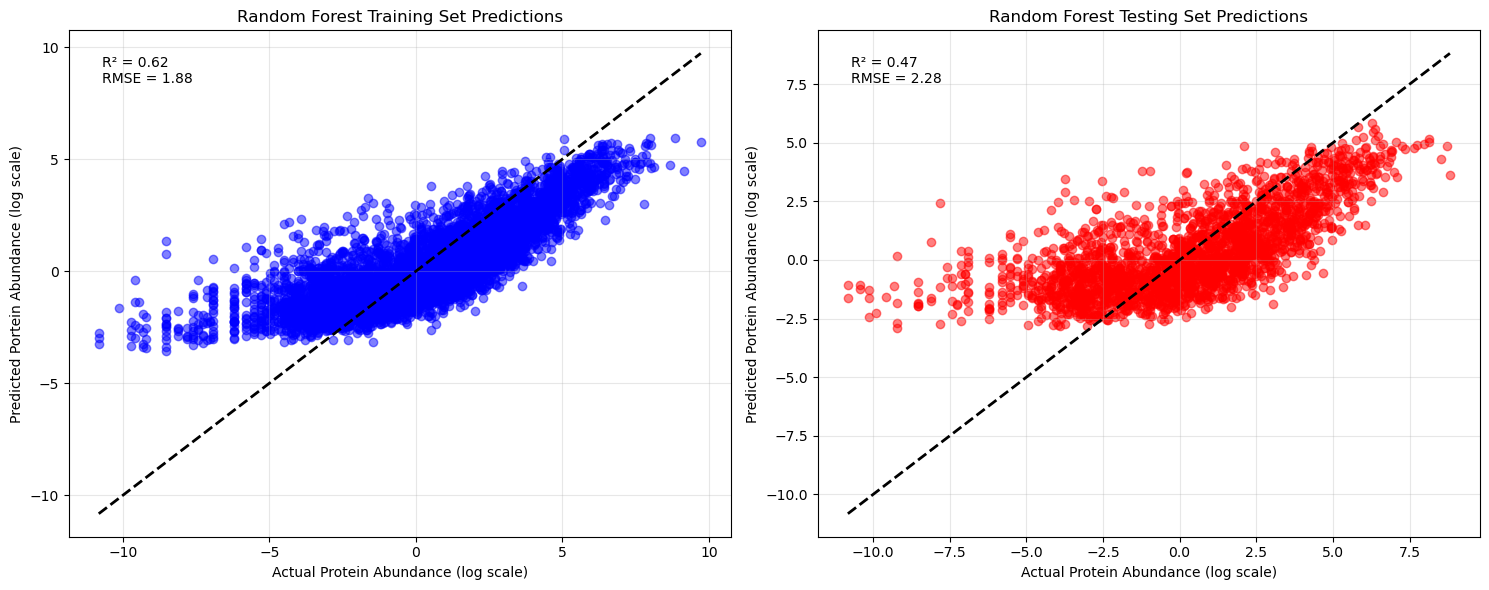

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

X = merged_df[filtered_features].drop("protein_abundance_log", axis=1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Optuna best param:

#   n_estimators: 400
#   max_depth: 50
#   min_samples_split: 17
#   min_samples_leaf: 4
#   max_features: sqrt
#   max_samples: 0.5034011583596404

rf_best = RandomForestRegressor(
    n_estimators=400,
    max_depth=50,
    min_samples_split=17,
    min_samples_leaf=4,
    max_features="sqrt",
    max_samples=0.5034011583596404,
    random_state=42,
)
rf_best.fit(X_train_scaled, y_train)

y_train_pred = rf_best.predict(X_train_scaled)
y_test_pred = rf_best.predict(X_test_scaled)

cv_scores = cross_val_score(
    rf_best, X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error"
)
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std() * 2
cv_rmse_pct = (cv_mean / np.mean(y_train)) * 100

print(
    f"\n10-Fold Cross Validation RMSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})"
)
print(f"10-Fold Cross Validation RMSE (%): {cv_rmse_pct:.2f}%")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], [min_val, max_val], "k--", lw=2, label="Perfect Prediction"
    )

    ax.set_xlabel("Actual Protein Abundance (log scale)")
    ax.set_ylabel("Predicted Portein Abundance (log scale)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(
        0.05,
        0.95,
        f"R² = {r2:.2f}\nRMSE = {rmse:.2f}",
        transform=ax.transAxes,
        verticalalignment="top",
    )


plot_predictions(
    ax1, y_train, y_train_pred, "Random Forest Training Set Predictions", "blue"
)
plot_predictions(
    ax2, y_test, y_test_pred, "Random Forest Testing Set Predictions", "red"
)

plt.tight_layout()
plt.show()

### Marginal improvements compared to Multilinear Regression

# XGBoost

# Optuna Param Tuning

In [8]:
import optuna
from sklearn.metrics import r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = merged_df[filtered_features].drop("protein_abundance_log", axis=1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 10, 20, 30, 40, 50, None]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 5)
    }
    
    model = XGBRegressor(
        **params,
        random_state=42,
        n_jobs=-1 
    )
    
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    r2_diff = train_r2 - test_r2

    penalty = 0
    if r2_diff >= 0.15:
        penalty = r2_diff - 0.15
        print(f"Overfitting detected! Applying penalty: {penalty:.4f}")

    penalized_test_r2 = test_r2 - penalty
    print(f"\nTrial {trial.number}:")
    print(f"Parameters: {params}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"R² difference: {r2_diff:.4f}")
    print(f"Penalized Test R²: {penalized_test_r2:.4f}")
    
    return penalized_test_r2

study = optuna.create_study(direction="maximize")

def print_progress(study, trial):
    print(f"\nBest trial so far: {study.best_trial.number}")
    print(f"Best penalized R² score so far: {study.best_value:.4f}")
    print(f"Best parameters so far: {study.best_params}")

print("Starting hyperparameter optimization...")
n_trials = 250
study.optimize(objective, n_trials=n_trials, callbacks=[print_progress])

print("\nOptimization completed!")
print(f"Best penalized R² score: {study.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

try:
    import optuna.visualization as vis
    import matplotlib.pyplot as plt
    
    fig1 = vis.plot_optimization_history(study)
    fig1.show()
    
    fig2 = vis.plot_param_importances(study)
    fig2.show()
except ImportError:
    print("Optuna visualization is not available. Install optuna[visualization] to see plots.")

[I 2025-04-04 17:12:58,576] A new study created in memory with name: no-name-81d7e3b6-65f5-4cff-b19e-c1cc152301ca
[I 2025-04-04 17:12:58,728] Trial 0 finished with value: 0.34545636329074936 and parameters: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}. Best is trial 0 with value: 0.34545636329074936.


Starting hyperparameter optimization...
Overfitting detected! Applying penalty: 0.1227

Trial 0:
Parameters: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}
Train R²: 0.7408
Test R²: 0.4681
R² difference: 0.2727
Penalized Test R²: 0.3455

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}


[I 2025-04-04 17:12:59,032] Trial 1 finished with value: 0.1889936531327614 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.08311047472123512, 'subsample': 0.6021518162420436, 'colsample_bytree': 0.6674609209333393, 'gamma': 3.4572397835437, 'reg_alpha': 0.5543517787499552, 'reg_lambda': 2.1943204936837755}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.2659

Trial 1:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.08311047472123512, 'subsample': 0.6021518162420436, 'colsample_bytree': 0.6674609209333393, 'gamma': 3.4572397835437, 'reg_alpha': 0.5543517787499552, 'reg_lambda': 2.1943204936837755}
Train R²: 0.8709
Test R²: 0.4549
R² difference: 0.4159
Penalized Test R²: 0.1890

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}


[I 2025-04-04 17:12:59,319] Trial 2 finished with value: 0.034572489872067624 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.2711366794523866, 'subsample': 0.8398580744726742, 'colsample_bytree': 0.6540231945740753, 'gamma': 1.270107346735213, 'reg_alpha': 3.05571912844593, 'reg_lambda': 3.1262805265295985}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.3783

Trial 2:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.2711366794523866, 'subsample': 0.8398580744726742, 'colsample_bytree': 0.6540231945740753, 'gamma': 1.270107346735213, 'reg_alpha': 3.05571912844593, 'reg_lambda': 3.1262805265295985}
Train R²: 0.9412
Test R²: 0.4129
R² difference: 0.5283
Penalized Test R²: 0.0346

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}


[I 2025-04-04 17:12:59,827] Trial 3 finished with value: 0.10177137031981331 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.1082269151382278, 'subsample': 0.9490205251448909, 'colsample_bytree': 0.8832032806642747, 'gamma': 0.3382574834468832, 'reg_alpha': 1.808639789438891, 'reg_lambda': 2.2030180627378884}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.3608

Trial 3:
Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 15, 'learning_rate': 0.1082269151382278, 'subsample': 0.9490205251448909, 'colsample_bytree': 0.8832032806642747, 'gamma': 0.3382574834468832, 'reg_alpha': 1.808639789438891, 'reg_lambda': 2.2030180627378884}
Train R²: 0.9733
Test R²: 0.4625
R² difference: 0.5108
Penalized Test R²: 0.1018

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}


[I 2025-04-04 17:13:00,193] Trial 4 finished with value: 0.06293516894321338 and parameters: {'n_estimators': 900, 'max_depth': 20, 'min_child_weight': 20, 'learning_rate': 0.19130769322197833, 'subsample': 0.8712647479778507, 'colsample_bytree': 0.808059567451423, 'gamma': 0.8220869394704949, 'reg_alpha': 1.0971870398892776, 'reg_lambda': 4.605857163094983}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.3794

Trial 4:
Parameters: {'n_estimators': 900, 'max_depth': 20, 'min_child_weight': 20, 'learning_rate': 0.19130769322197833, 'subsample': 0.8712647479778507, 'colsample_bytree': 0.808059567451423, 'gamma': 0.8220869394704949, 'reg_alpha': 1.0971870398892776, 'reg_lambda': 4.605857163094983}
Train R²: 0.9717
Test R²: 0.4423
R² difference: 0.5294
Penalized Test R²: 0.0629

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}


[I 2025-04-04 17:13:00,519] Trial 5 finished with value: 0.030086289818972878 and parameters: {'n_estimators': 500, 'max_depth': 50, 'min_child_weight': 8, 'learning_rate': 0.20937777261700755, 'subsample': 0.8181250839663863, 'colsample_bytree': 0.7053875239985784, 'gamma': 0.27681065663716475, 'reg_alpha': 1.5849960997527064, 'reg_lambda': 4.298371093192408}. Best is trial 0 with value: 0.34545636329074936.
[I 2025-04-04 17:13:00,685] Trial 6 finished with value: 0.10275476606123601 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.26279108086353253, 'subsample': 0.8407817133979769, 'colsample_bytree': 0.9991306984429564, 'gamma': 3.1476365936809496, 'reg_alpha': 2.7043810611658485, 'reg_lambda': 3.515116402133499}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.4046

Trial 5:
Parameters: {'n_estimators': 500, 'max_depth': 50, 'min_child_weight': 8, 'learning_rate': 0.20937777261700755, 'subsample': 0.8181250839663863, 'colsample_bytree': 0.7053875239985784, 'gamma': 0.27681065663716475, 'reg_alpha': 1.5849960997527064, 'reg_lambda': 4.298371093192408}
Train R²: 0.9893
Test R²: 0.4347
R² difference: 0.5546
Penalized Test R²: 0.0301

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}
Overfitting detected! Applying penalty: 0.3289

Trial 6:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.26279108086353253, 'subsample': 0.8407817133979769, 'colsample_bytree': 0.999

[I 2025-04-04 17:13:01,182] Trial 7 finished with value: 0.06797738898093031 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.10180610019274125, 'subsample': 0.7839593198801089, 'colsample_bytree': 0.7217248780136271, 'gamma': 0.8798640868735674, 'reg_alpha': 1.0841498933486622, 'reg_lambda': 4.225737943885445}. Best is trial 0 with value: 0.34545636329074936.
[I 2025-04-04 17:13:01,350] Trial 8 finished with value: 0.16350125557388295 and parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 3, 'learning_rate': 0.2255183612458175, 'subsample': 0.987861053573832, 'colsample_bytree': 0.8413299127170731, 'gamma': 4.827285795889949, 'reg_alpha': 3.1786690921820893, 'reg_lambda': 1.2615364540392289}. Best is trial 0 with value: 0.34545636329074936.


Overfitting detected! Applying penalty: 0.3678

Trial 7:
Parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.10180610019274125, 'subsample': 0.7839593198801089, 'colsample_bytree': 0.7217248780136271, 'gamma': 0.8798640868735674, 'reg_alpha': 1.0841498933486622, 'reg_lambda': 4.225737943885445}
Train R²: 0.9536
Test R²: 0.4358
R² difference: 0.5178
Penalized Test R²: 0.0680

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}
Overfitting detected! Applying penalty: 0.2813

Trial 8:
Parameters: {'n_estimators': 800, 'max_depth': 50, 'min_child_weight': 3, 'learning_rate': 0.2255183612458175, 'subsample': 0.987861053573832, 'colsample_bytree': 0.841329

[I 2025-04-04 17:13:01,559] Trial 9 finished with value: 0.19765370207359634 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.13680181931865767, 'subsample': 0.9957226469274445, 'colsample_bytree': 0.8988284752939694, 'gamma': 3.774303596314634, 'reg_alpha': 3.503841434372567, 'reg_lambda': 1.1249698048215269}. Best is trial 0 with value: 0.34545636329074936.
[I 2025-04-04 17:13:01,735] Trial 10 finished with value: 0.4907201509110952 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.2658

Trial 9:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.13680181931865767, 'subsample': 0.9957226469274445, 'colsample_bytree': 0.8988284752939694, 'gamma': 3.774303596314634, 'reg_alpha': 3.503841434372567, 'reg_lambda': 1.1249698048215269}
Train R²: 0.8792
Test R²: 0.4634
R² difference: 0.4158
Penalized Test R²: 0.1977

Best trial so far: 0
Best penalized R² score so far: 0.3455
Best parameters so far: {'n_estimators': 900, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.19165867235295914, 'subsample': 0.9978154847406254, 'colsample_bytree': 0.9306341792566188, 'gamma': 4.45569305640356, 'reg_alpha': 1.075946398238357, 'reg_lambda': 1.8755769482053224}

Trial 10:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 're

[I 2025-04-04 17:13:01,911] Trial 11 finished with value: 0.45711993085492253 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.01678207823757083, 'subsample': 0.7026855216503852, 'colsample_bytree': 0.9916445619384954, 'gamma': 1.9317231678211324, 'reg_alpha': 4.99061833098878, 'reg_lambda': 2.061316306861577}. Best is trial 10 with value: 0.4907201509110952.
[I 2025-04-04 17:13:02,072] Trial 12 finished with value: 0.4653833953345642 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.018730968412734104, 'subsample': 0.7032145134899056, 'colsample_bytree': 0.9967173009137968, 'gamma': 2.0624789588548547, 'reg_alpha': 4.6556456502590935, 'reg_lambda': 2.609668285598785}. Best is trial 10 with value: 0.4907201509110952.



Trial 11:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.01678207823757083, 'subsample': 0.7026855216503852, 'colsample_bytree': 0.9916445619384954, 'gamma': 1.9317231678211324, 'reg_alpha': 4.99061833098878, 'reg_lambda': 2.061316306861577}
Train R²: 0.5420
Test R²: 0.4571
R² difference: 0.0849
Penalized Test R²: 0.4571

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}

Trial 12:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.018730968412734104, 'subsample': 0.7032145134899056, 'colsample_bytree': 0.9967173009137968, 'gamma': 2.0624789588548547, 'reg_alpha': 4.6556456502590935, 'reg_lambda'

[I 2025-04-04 17:13:03,306] Trial 13 finished with value: 0.21266018545829923 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_child_weight': 4, 'learning_rate': 0.02205946219674284, 'subsample': 0.7024785503332289, 'colsample_bytree': 0.947230081431307, 'gamma': 2.2774928626497575, 'reg_alpha': 4.9651856406494055, 'reg_lambda': 2.7791152441841476}. Best is trial 10 with value: 0.4907201509110952.
[I 2025-04-04 17:13:03,499] Trial 14 finished with value: 0.4642169818271493 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.054778288999819874, 'subsample': 0.7119872665660116, 'colsample_bytree': 0.9545320085727012, 'gamma': 2.609363459973764, 'reg_alpha': 4.122822404489737, 'reg_lambda': 2.789099642164606}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.2700

Trial 13:
Parameters: {'n_estimators': 300, 'max_depth': 30, 'min_child_weight': 4, 'learning_rate': 0.02205946219674284, 'subsample': 0.7024785503332289, 'colsample_bytree': 0.947230081431307, 'gamma': 2.2774928626497575, 'reg_alpha': 4.9651856406494055, 'reg_lambda': 2.7791152441841476}
Train R²: 0.9027
Test R²: 0.4827
R² difference: 0.4200
Penalized Test R²: 0.2127

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}
Overfitting detected! Applying penalty: 0.0311

Trial 14:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.054778288999819874, 'subsample': 0.7119872665660116, 'colsample_bytree': 

[I 2025-04-04 17:13:03,979] Trial 15 finished with value: 0.22065265101464893 and parameters: {'n_estimators': 300, 'max_depth': 7, 'min_child_weight': 1, 'learning_rate': 0.058164479942104774, 'subsample': 0.6101386667956434, 'colsample_bytree': 0.7578410192141883, 'gamma': 1.7112807819654299, 'reg_alpha': 4.12996078306424, 'reg_lambda': 3.640588238218745}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.2604

Trial 15:
Parameters: {'n_estimators': 300, 'max_depth': 7, 'min_child_weight': 1, 'learning_rate': 0.058164479942104774, 'subsample': 0.6101386667956434, 'colsample_bytree': 0.7578410192141883, 'gamma': 1.7112807819654299, 'reg_alpha': 4.12996078306424, 'reg_lambda': 3.640588238218745}
Train R²: 0.8915
Test R²: 0.4811
R² difference: 0.4104
Penalized Test R²: 0.2207

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}


[I 2025-04-04 17:13:04,249] Trial 16 finished with value: 0.3838825877889721 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.047843323751045816, 'subsample': 0.7526528760209145, 'colsample_bytree': 0.8632141061042966, 'gamma': 2.872940192382278, 'reg_alpha': 4.297041545803666, 'reg_lambda': 1.5973002343002574}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.1077

Trial 16:
Parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.047843323751045816, 'subsample': 0.7526528760209145, 'colsample_bytree': 0.8632141061042966, 'gamma': 2.872940192382278, 'reg_alpha': 4.297041545803666, 'reg_lambda': 1.5973002343002574}
Train R²: 0.7492
Test R²: 0.4916
R² difference: 0.2577
Penalized Test R²: 0.3839

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}


[I 2025-04-04 17:13:04,553] Trial 17 finished with value: 0.09856430098244384 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 12, 'learning_rate': 0.13965994758422384, 'subsample': 0.6545425434641599, 'colsample_bytree': 0.9172989619334743, 'gamma': 1.761737728811245, 'reg_alpha': 4.5318387287226285, 'reg_lambda': 2.5614057291969825}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.3415

Trial 17:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 12, 'learning_rate': 0.13965994758422384, 'subsample': 0.6545425434641599, 'colsample_bytree': 0.9172989619334743, 'gamma': 1.761737728811245, 'reg_alpha': 4.5318387287226285, 'reg_lambda': 2.5614057291969825}
Train R²: 0.9316
Test R²: 0.4401
R² difference: 0.4915
Penalized Test R²: 0.0986

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}


[I 2025-04-04 17:13:04,950] Trial 18 finished with value: 0.37507262367646843 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 4, 'learning_rate': 0.023914337868093216, 'subsample': 0.6601637270333082, 'colsample_bytree': 0.9766891780170485, 'gamma': 2.292457116356292, 'reg_alpha': 3.7295363342004713, 'reg_lambda': 3.2013098373832554}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.1037

Trial 18:
Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 4, 'learning_rate': 0.023914337868093216, 'subsample': 0.6601637270333082, 'colsample_bytree': 0.9766891780170485, 'gamma': 2.292457116356292, 'reg_alpha': 3.7295363342004713, 'reg_lambda': 3.2013098373832554}
Train R²: 0.7325
Test R²: 0.4788
R² difference: 0.2537
Penalized Test R²: 0.3751

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}


[I 2025-04-04 17:13:05,244] Trial 19 finished with value: 0.20834033519837958 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.07792649131090922, 'subsample': 0.7588088797155854, 'colsample_bytree': 0.8187475962160006, 'gamma': 3.9604164708025706, 'reg_alpha': 2.1828242631865664, 'reg_lambda': 1.611807261602598}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.2678

Trial 19:
Parameters: {'n_estimators': 200, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.07792649131090922, 'subsample': 0.7588088797155854, 'colsample_bytree': 0.8187475962160006, 'gamma': 3.9604164708025706, 'reg_alpha': 2.1828242631865664, 'reg_lambda': 1.611807261602598}
Train R²: 0.8940
Test R²: 0.4762
R² difference: 0.4178
Penalized Test R²: 0.2083

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}


[I 2025-04-04 17:13:06,219] Trial 20 finished with value: 0.41024873852429666 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.010225779210062416, 'subsample': 0.6644602049216354, 'colsample_bytree': 0.6008342344047164, 'gamma': 1.4190398120544354, 'reg_alpha': 3.680496809301171, 'reg_lambda': 2.4612820710229717}. Best is trial 10 with value: 0.4907201509110952.
[I 2025-04-04 17:13:06,358] Trial 21 finished with value: 0.4732415021964901 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.053437974063174055, 'subsample': 0.7158142302341137, 'colsample_bytree': 0.9483705578587422, 'gamma': 2.710704349968523, 'reg_alpha': 4.515710007274812, 'reg_lambda': 2.829861100232982}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.0835

Trial 20:
Parameters: {'n_estimators': 500, 'max_depth': 7, 'min_child_weight': 3, 'learning_rate': 0.010225779210062416, 'subsample': 0.6644602049216354, 'colsample_bytree': 0.6008342344047164, 'gamma': 1.4190398120544354, 'reg_alpha': 3.680496809301171, 'reg_lambda': 2.4612820710229717}
Train R²: 0.7272
Test R²: 0.4937
R² difference: 0.2335
Penalized Test R²: 0.4102

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}
Overfitting detected! Applying penalty: 0.0225

Trial 21:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.053437974063174055, 'subsample': 0.7158142302341137, 'colsample_bytree': 

[I 2025-04-04 17:13:06,795] Trial 22 finished with value: 0.3294727201903198 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.04473275163392687, 'subsample': 0.7353040631103646, 'colsample_bytree': 0.9598485046350672, 'gamma': 2.723785299090809, 'reg_alpha': 4.595952651023972, 'reg_lambda': 3.3917798750162325}. Best is trial 10 with value: 0.4907201509110952.
[I 2025-04-04 17:13:06,918] Trial 23 finished with value: 0.342657396083628 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.10878631968576714, 'subsample': 0.6817076691978576, 'colsample_bytree': 0.9987135061404674, 'gamma': 2.148104282283791, 'reg_alpha': 4.629540931048825, 'reg_lambda': 3.84353413325839}. Best is trial 10 with value: 0.4907201509110952.


Overfitting detected! Applying penalty: 0.1591

Trial 22:
Parameters: {'n_estimators': 300, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.04473275163392687, 'subsample': 0.7353040631103646, 'colsample_bytree': 0.9598485046350672, 'gamma': 2.723785299090809, 'reg_alpha': 4.595952651023972, 'reg_lambda': 3.3917798750162325}
Train R²: 0.7977
Test R²: 0.4886
R² difference: 0.3091
Penalized Test R²: 0.3295

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}
Overfitting detected! Applying penalty: 0.1312

Trial 23:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.10878631968576714, 'subsample': 0.6817076691978576, 'colsample_bytree': 

[I 2025-04-04 17:13:07,300] Trial 24 finished with value: 0.1960840829371876 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_child_weight': 3, 'learning_rate': 0.07683800583122881, 'subsample': 0.783218986306896, 'colsample_bytree': 0.9153938288744483, 'gamma': 3.0866194705396675, 'reg_alpha': 3.9333676122928782, 'reg_lambda': 2.474364460631528}. Best is trial 10 with value: 0.4907201509110952.
[I 2025-04-04 17:13:07,451] Trial 25 finished with value: 0.49212661228721555 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.2787

Trial 24:
Parameters: {'n_estimators': 200, 'max_depth': 20, 'min_child_weight': 3, 'learning_rate': 0.07683800583122881, 'subsample': 0.783218986306896, 'colsample_bytree': 0.9153938288744483, 'gamma': 3.0866194705396675, 'reg_alpha': 3.9333676122928782, 'reg_lambda': 2.474364460631528}
Train R²: 0.9035
Test R²: 0.4748
R² difference: 0.4287
Penalized Test R²: 0.1961

Best trial so far: 10
Best penalized R² score so far: 0.4907
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 1, 'learning_rate': 0.03290928751799704, 'subsample': 0.714635736960363, 'colsample_bytree': 0.9992022664417015, 'gamma': 2.1164816258644765, 'reg_alpha': 4.953183027684095, 'reg_lambda': 2.1206077697498733}
Overfitting detected! Applying penalty: 0.0030

Trial 25:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0

[I 2025-04-04 17:13:07,790] Trial 26 finished with value: 0.08224128354885474 and parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 5, 'learning_rate': 0.16369882442590672, 'subsample': 0.6280236399492037, 'colsample_bytree': 0.864457157035532, 'gamma': 1.1159588207241489, 'reg_alpha': 3.2659405467680416, 'reg_lambda': 2.8884818419100426}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.3668

Trial 26:
Parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 5, 'learning_rate': 0.16369882442590672, 'subsample': 0.6280236399492037, 'colsample_bytree': 0.864457157035532, 'gamma': 1.1159588207241489, 'reg_alpha': 3.2659405467680416, 'reg_lambda': 2.8884818419100426}
Train R²: 0.9658
Test R²: 0.4490
R² difference: 0.5168
Penalized Test R²: 0.0822

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:08,071] Trial 27 finished with value: 0.3944068550676568 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 7, 'learning_rate': 0.042867711216140456, 'subsample': 0.7437155543390445, 'colsample_bytree': 0.9482765595883609, 'gamma': 1.5420717875024952, 'reg_alpha': 2.6986421889336705, 'reg_lambda': 1.783971338182462}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.0976

Trial 27:
Parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 7, 'learning_rate': 0.042867711216140456, 'subsample': 0.7437155543390445, 'colsample_bytree': 0.9482765595883609, 'gamma': 1.5420717875024952, 'reg_alpha': 2.6986421889336705, 'reg_lambda': 1.783971338182462}
Train R²: 0.7397
Test R²: 0.4920
R² difference: 0.2476
Penalized Test R²: 0.3944

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:08,396] Trial 28 finished with value: -0.04916177978246117 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 13, 'learning_rate': 0.29968018345397207, 'subsample': 0.6404937548160317, 'colsample_bytree': 0.7695558987943093, 'gamma': 0.8422091240892872, 'reg_alpha': 4.98863076111116, 'reg_lambda': 3.1089292097668024}. Best is trial 25 with value: 0.49212661228721555.
[I 2025-04-04 17:13:08,548] Trial 29 finished with value: 0.3964637618204757 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.0889913825200222, 'subsample': 0.6740222484260358, 'colsample_bytree': 0.9268779715530282, 'gamma': 4.3331174006635464, 'reg_alpha': 0.13814213373836548, 'reg_lambda': 1.9657773836635748}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.4322

Trial 28:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 13, 'learning_rate': 0.29968018345397207, 'subsample': 0.6404937548160317, 'colsample_bytree': 0.7695558987943093, 'gamma': 0.8422091240892872, 'reg_alpha': 4.98863076111116, 'reg_lambda': 3.1089292097668024}
Train R²: 0.9652
Test R²: 0.3830
R² difference: 0.5822
Penalized Test R²: -0.0492

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}
Overfitting detected! Applying penalty: 0.0905

Trial 29:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.0889913825200222, 'subsample': 0.6740222484260358, 'colsample_bytree

[I 2025-04-04 17:13:08,868] Trial 30 finished with value: 0.3367531003275869 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 3, 'learning_rate': 0.061899506288998304, 'subsample': 0.7291593216093608, 'colsample_bytree': 0.9685485316266522, 'gamma': 0.0057501377067086246, 'reg_alpha': 4.299898435700708, 'reg_lambda': 3.8998245038106485}. Best is trial 25 with value: 0.49212661228721555.
[I 2025-04-04 17:13:09,064] Trial 31 finished with value: 0.49192211011670106 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03387180088464656, 'subsample': 0.6999555548896614, 'colsample_bytree': 0.9361268669227774, 'gamma': 2.0088463901191425, 'reg_alpha': 4.555653351771914, 'reg_lambda': 2.560698252826129}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.1508

Trial 30:
Parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 3, 'learning_rate': 0.061899506288998304, 'subsample': 0.7291593216093608, 'colsample_bytree': 0.9685485316266522, 'gamma': 0.0057501377067086246, 'reg_alpha': 4.299898435700708, 'reg_lambda': 3.8998245038106485}
Train R²: 0.7883
Test R²: 0.4875
R² difference: 0.3008
Penalized Test R²: 0.3368

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}

Trial 31:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03387180088464656, 'subsample': 0.6999555548896614, 'colsample_bytree': 0.9361268669227774, 'gamma': 2.008846390

[I 2025-04-04 17:13:09,221] Trial 32 finished with value: 0.4896062081052548 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.036827996345285184, 'subsample': 0.6232322089009289, 'colsample_bytree': 0.8912305595690322, 'gamma': 2.3512814873033805, 'reg_alpha': 4.501467782076949, 'reg_lambda': 2.2688156831574267}. Best is trial 25 with value: 0.49212661228721555.



Trial 32:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.036827996345285184, 'subsample': 0.6232322089009289, 'colsample_bytree': 0.8912305595690322, 'gamma': 2.3512814873033805, 'reg_alpha': 4.501467782076949, 'reg_lambda': 2.2688156831574267}
Train R²: 0.6329
Test R²: 0.4896
R² difference: 0.1433
Penalized Test R²: 0.4896

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:09,543] Trial 33 finished with value: 0.42789267904574235 and parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03486988722562677, 'subsample': 0.6161524996871587, 'colsample_bytree': 0.8812911261080437, 'gamma': 1.8685959169986224, 'reg_alpha': 3.942621750129545, 'reg_lambda': 2.2988373437731484}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.0660

Trial 33:
Parameters: {'n_estimators': 200, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03486988722562677, 'subsample': 0.6161524996871587, 'colsample_bytree': 0.8812911261080437, 'gamma': 1.8685959169986224, 'reg_alpha': 3.942621750129545, 'reg_lambda': 2.2988373437731484}
Train R²: 0.7100
Test R²: 0.4939
R² difference: 0.2160
Penalized Test R²: 0.4279

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:10,189] Trial 34 finished with value: 0.1619775708729002 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.07091403009524652, 'subsample': 0.6019042908288762, 'colsample_bytree': 0.9010127381331601, 'gamma': 2.4177408589295477, 'reg_alpha': 4.704848252742105, 'reg_lambda': 2.2647248808473557}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.3071

Trial 34:
Parameters: {'n_estimators': 600, 'max_depth': 10, 'min_child_weight': 2, 'learning_rate': 0.07091403009524652, 'subsample': 0.6019042908288762, 'colsample_bytree': 0.9010127381331601, 'gamma': 2.4177408589295477, 'reg_alpha': 4.704848252742105, 'reg_lambda': 2.2647248808473557}
Train R²: 0.9262
Test R²: 0.4691
R² difference: 0.4571
Penalized Test R²: 0.1620

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:10,512] Trial 35 finished with value: 0.4681175113686197 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.03421818704810537, 'subsample': 0.6385415278764284, 'colsample_bytree': 0.9325768144006897, 'gamma': 1.105347119432702, 'reg_alpha': 4.348424121458363, 'reg_lambda': 1.751490429975567}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.0323

Trial 35:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.03421818704810537, 'subsample': 0.6385415278764284, 'colsample_bytree': 0.9325768144006897, 'gamma': 1.105347119432702, 'reg_alpha': 4.348424121458363, 'reg_lambda': 1.751490429975567}
Train R²: 0.6827
Test R²: 0.5004
R² difference: 0.1823
Penalized Test R²: 0.4681

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:10,789] Trial 36 finished with value: 0.1807412750910976 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 2, 'learning_rate': 0.09454831488399937, 'subsample': 0.6808874908291004, 'colsample_bytree': 0.9727925794557798, 'gamma': 3.3856845640487645, 'reg_alpha': 3.515889850830657, 'reg_lambda': 1.3923225082715565}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.2865

Trial 36:
Parameters: {'n_estimators': 100, 'max_depth': 30, 'min_child_weight': 2, 'learning_rate': 0.09454831488399937, 'subsample': 0.6808874908291004, 'colsample_bytree': 0.9727925794557798, 'gamma': 3.3856845640487645, 'reg_alpha': 3.515889850830657, 'reg_lambda': 1.3923225082715565}
Train R²: 0.9037
Test R²: 0.4672
R² difference: 0.4365
Penalized Test R²: 0.1807

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:11,170] Trial 37 finished with value: 0.11949859754294823 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 7, 'learning_rate': 0.12515585685643224, 'subsample': 0.6370190117029614, 'colsample_bytree': 0.8587204039200144, 'gamma': 1.6537369414139507, 'reg_alpha': 4.832153695563088, 'reg_lambda': 1.9622440582049807}. Best is trial 25 with value: 0.49212661228721555.
[I 2025-04-04 17:13:11,346] Trial 38 finished with value: 0.16409186812936827 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_child_weight': 19, 'learning_rate': 0.17420963399458203, 'subsample': 0.920740811360301, 'colsample_bytree': 0.8977769393419232, 'gamma': 1.248996319197906, 'reg_alpha': 4.10472041419927, 'reg_lambda': 2.138809110502624}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.3377

Trial 37:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 7, 'learning_rate': 0.12515585685643224, 'subsample': 0.6370190117029614, 'colsample_bytree': 0.8587204039200144, 'gamma': 1.6537369414139507, 'reg_alpha': 4.832153695563088, 'reg_lambda': 1.9622440582049807}
Train R²: 0.9448
Test R²: 0.4572
R² difference: 0.4877
Penalized Test R²: 0.1195

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}
Overfitting detected! Applying penalty: 0.2951

Trial 38:
Parameters: {'n_estimators': 200, 'max_depth': 7, 'min_child_weight': 19, 'learning_rate': 0.17420963399458203, 'subsample': 0.920740811360301, 'colsample_bytree': 0.

[I 2025-04-04 17:13:12,039] Trial 39 finished with value: 0.23752346021554524 and parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03358177117134331, 'subsample': 0.7714986589199131, 'colsample_bytree': 0.8377358438148732, 'gamma': 2.431931642861544, 'reg_alpha': 2.917769534507779, 'reg_lambda': 4.931114457189124}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.2426

Trial 39:
Parameters: {'n_estimators': 700, 'max_depth': None, 'min_child_weight': 2, 'learning_rate': 0.03358177117134331, 'subsample': 0.7714986589199131, 'colsample_bytree': 0.8377358438148732, 'gamma': 2.431931642861544, 'reg_alpha': 2.917769534507779, 'reg_lambda': 4.931114457189124}
Train R²: 0.8726
Test R²: 0.4801
R² difference: 0.3926
Penalized Test R²: 0.2375

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}


[I 2025-04-04 17:13:12,406] Trial 40 finished with value: 0.10628604176872636 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 14, 'learning_rate': 0.11085213724923915, 'subsample': 0.8797157999288236, 'colsample_bytree': 0.9341383047418622, 'gamma': 0.6428161569907862, 'reg_alpha': 2.201584007944118, 'reg_lambda': 3.259885409312455}. Best is trial 25 with value: 0.49212661228721555.
[I 2025-04-04 17:13:12,535] Trial 41 finished with value: 0.42018674355534247 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.0704285406171786, 'subsample': 0.806156965029314, 'colsample_bytree': 0.9805474989925204, 'gamma': 2.8081910165219623, 'reg_alpha': 4.409621000958975, 'reg_lambda': 2.9699994845408106}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.3551

Trial 40:
Parameters: {'n_estimators': 100, 'max_depth': 40, 'min_child_weight': 14, 'learning_rate': 0.11085213724923915, 'subsample': 0.8797157999288236, 'colsample_bytree': 0.9341383047418622, 'gamma': 0.6428161569907862, 'reg_alpha': 2.201584007944118, 'reg_lambda': 3.259885409312455}
Train R²: 0.9664
Test R²: 0.4614
R² difference: 0.5051
Penalized Test R²: 0.1063

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}
Overfitting detected! Applying penalty: 0.0693

Trial 41:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.0704285406171786, 'subsample': 0.806156965029314, 'colsample_bytree': 0

[I 2025-04-04 17:13:13,216] Trial 42 finished with value: 0.2300196656967356 and parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 4, 'learning_rate': 0.03361906287380485, 'subsample': 0.7198925246260183, 'colsample_bytree': 0.946346763614813, 'gamma': 3.127792337827855, 'reg_alpha': 4.705470969006847, 'reg_lambda': 2.685244591845996}. Best is trial 25 with value: 0.49212661228721555.
[I 2025-04-04 17:13:13,339] Trial 43 finished with value: 0.4469767044116236 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.060228568740735476, 'subsample': 0.6931197917351286, 'colsample_bytree': 0.9159022236312407, 'gamma': 1.9898194043495157, 'reg_alpha': 3.880992865319992, 'reg_lambda': 2.322121943394272}. Best is trial 25 with value: 0.49212661228721555.


Overfitting detected! Applying penalty: 0.2534

Trial 42:
Parameters: {'n_estimators': 200, 'max_depth': 50, 'min_child_weight': 4, 'learning_rate': 0.03361906287380485, 'subsample': 0.7198925246260183, 'colsample_bytree': 0.946346763614813, 'gamma': 3.127792337827855, 'reg_alpha': 4.705470969006847, 'reg_lambda': 2.685244591845996}
Train R²: 0.8869
Test R²: 0.4835
R² difference: 0.4034
Penalized Test R²: 0.2300

Best trial so far: 25
Best penalized R² score so far: 0.4921
Best parameters so far: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 5, 'learning_rate': 0.043906658004619036, 'subsample': 0.6399947604870443, 'colsample_bytree': 0.9618634480600534, 'gamma': 1.3174421438349648, 'reg_alpha': 4.650607274939081, 'reg_lambda': 2.9046032374234008}
Overfitting detected! Applying penalty: 0.0450

Trial 43:
Parameters: {'n_estimators': 100, 'max_depth': None, 'min_child_weight': 6, 'learning_rate': 0.060228568740735476, 'subsample': 0.6931197917351286, 'colsample_bytree': 0

[I 2025-04-04 17:13:13,428] Trial 44 finished with value: 0.49665854627614126 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.04904466262487217, 'subsample': 0.6486091199678167, 'colsample_bytree': 0.9758051299320721, 'gamma': 2.5203928537685076, 'reg_alpha': 4.484233979303924, 'reg_lambda': 3.0811594625487064}. Best is trial 44 with value: 0.49665854627614126.



Trial 44:
Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.04904466262487217, 'subsample': 0.6486091199678167, 'colsample_bytree': 0.9758051299320721, 'gamma': 2.5203928537685076, 'reg_alpha': 4.484233979303924, 'reg_lambda': 3.0811594625487064}
Train R²: 0.6042
Test R²: 0.4967
R² difference: 0.1075
Penalized Test R²: 0.4967

Best trial so far: 44
Best penalized R² score so far: 0.4967
Best parameters so far: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.04904466262487217, 'subsample': 0.6486091199678167, 'colsample_bytree': 0.9758051299320721, 'gamma': 2.5203928537685076, 'reg_alpha': 4.484233979303924, 'reg_lambda': 3.0811594625487064}


[I 2025-04-04 17:13:13,642] Trial 45 finished with value: 0.09820204217982886 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.23839525353612862, 'subsample': 0.6479119987148635, 'colsample_bytree': 0.9800775474708676, 'gamma': 2.1689627549884047, 'reg_alpha': 4.776978256412196, 'reg_lambda': 3.0089129579413}. Best is trial 44 with value: 0.49665854627614126.


Overfitting detected! Applying penalty: 0.3210

Trial 45:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.23839525353612862, 'subsample': 0.6479119987148635, 'colsample_bytree': 0.9800775474708676, 'gamma': 2.1689627549884047, 'reg_alpha': 4.776978256412196, 'reg_lambda': 3.0089129579413}
Train R²: 0.8901
Test R²: 0.4192
R² difference: 0.4710
Penalized Test R²: 0.0982

Best trial so far: 44
Best penalized R² score so far: 0.4967
Best parameters so far: {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.04904466262487217, 'subsample': 0.6486091199678167, 'colsample_bytree': 0.9758051299320721, 'gamma': 2.5203928537685076, 'reg_alpha': 4.484233979303924, 'reg_lambda': 3.0811594625487064}


[I 2025-04-04 17:13:13,889] Trial 46 finished with value: 0.4968383798255127 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.02138384428220058, 'subsample': 0.6226334430900619, 'colsample_bytree': 0.9656842103392913, 'gamma': 1.4408151049702225, 'reg_alpha': 4.177661426103776, 'reg_lambda': 3.3907712643441332}. Best is trial 46 with value: 0.4968383798255127.



Trial 46:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.02138384428220058, 'subsample': 0.6226334430900619, 'colsample_bytree': 0.9656842103392913, 'gamma': 1.4408151049702225, 'reg_alpha': 4.177661426103776, 'reg_lambda': 3.3907712643441332}
Train R²: 0.6305
Test R²: 0.4968
R² difference: 0.1337
Penalized Test R²: 0.4968

Best trial so far: 46
Best penalized R² score so far: 0.4968
Best parameters so far: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.02138384428220058, 'subsample': 0.6226334430900619, 'colsample_bytree': 0.9656842103392913, 'gamma': 1.4408151049702225, 'reg_alpha': 4.177661426103776, 'reg_lambda': 3.3907712643441332}


[I 2025-04-04 17:13:14,150] Trial 47 finished with value: 0.4921887335712659 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.01310304571539194, 'subsample': 0.688604374304848, 'colsample_bytree': 0.9643535558404238, 'gamma': 1.3841462610112993, 'reg_alpha': 4.116195484727886, 'reg_lambda': 3.524163893252938}. Best is trial 46 with value: 0.4968383798255127.



Trial 47:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.01310304571539194, 'subsample': 0.688604374304848, 'colsample_bytree': 0.9643535558404238, 'gamma': 1.3841462610112993, 'reg_alpha': 4.116195484727886, 'reg_lambda': 3.524163893252938}
Train R²: 0.5884
Test R²: 0.4922
R² difference: 0.0962
Penalized Test R²: 0.4922

Best trial so far: 46
Best penalized R² score so far: 0.4968
Best parameters so far: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.02138384428220058, 'subsample': 0.6226334430900619, 'colsample_bytree': 0.9656842103392913, 'gamma': 1.4408151049702225, 'reg_alpha': 4.177661426103776, 'reg_lambda': 3.3907712643441332}


[I 2025-04-04 17:13:14,549] Trial 48 finished with value: 0.4954425495757556 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.010406330647086452, 'subsample': 0.6671516874535349, 'colsample_bytree': 0.9711318156458558, 'gamma': 0.5181150795223292, 'reg_alpha': 3.3721629729779155, 'reg_lambda': 3.6807385272263757}. Best is trial 46 with value: 0.4968383798255127.



Trial 48:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.010406330647086452, 'subsample': 0.6671516874535349, 'colsample_bytree': 0.9711318156458558, 'gamma': 0.5181150795223292, 'reg_alpha': 3.3721629729779155, 'reg_lambda': 3.6807385272263757}
Train R²: 0.6134
Test R²: 0.4954
R² difference: 0.1180
Penalized Test R²: 0.4954

Best trial so far: 46
Best penalized R² score so far: 0.4968
Best parameters so far: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.02138384428220058, 'subsample': 0.6226334430900619, 'colsample_bytree': 0.9656842103392913, 'gamma': 1.4408151049702225, 'reg_alpha': 4.177661426103776, 'reg_lambda': 3.3907712643441332}


[I 2025-04-04 17:13:14,963] Trial 49 finished with value: 0.49685795387787157 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.01153477280865064, 'subsample': 0.6005932637584903, 'colsample_bytree': 0.9641696919201275, 'gamma': 0.5648675866708686, 'reg_alpha': 3.218300795393727, 'reg_lambda': 3.6933561414416256}. Best is trial 49 with value: 0.49685795387787157.



Trial 49:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.01153477280865064, 'subsample': 0.6005932637584903, 'colsample_bytree': 0.9641696919201275, 'gamma': 0.5648675866708686, 'reg_alpha': 3.218300795393727, 'reg_lambda': 3.6933561414416256}
Train R²: 0.6214
Test R²: 0.4969
R² difference: 0.1246
Penalized Test R²: 0.4969

Best trial so far: 49
Best penalized R² score so far: 0.4969
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.01153477280865064, 'subsample': 0.6005932637584903, 'colsample_bytree': 0.9641696919201275, 'gamma': 0.5648675866708686, 'reg_alpha': 3.218300795393727, 'reg_lambda': 3.6933561414416256}


[I 2025-04-04 17:13:15,330] Trial 50 finished with value: 0.4982062159313586 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}. Best is trial 50 with value: 0.4982062159313586.



Trial 50:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}
Train R²: 0.6243
Test R²: 0.4982
R² difference: 0.1261
Penalized Test R²: 0.4982

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:15,687] Trial 51 finished with value: 0.4954400749967842 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.010100013450481742, 'subsample': 0.6028237142161258, 'colsample_bytree': 0.68025537828512, 'gamma': 0.5218871510858113, 'reg_alpha': 3.317895746524248, 'reg_lambda': 4.191659232256025}. Best is trial 50 with value: 0.4982062159313586.



Trial 51:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.010100013450481742, 'subsample': 0.6028237142161258, 'colsample_bytree': 0.68025537828512, 'gamma': 0.5218871510858113, 'reg_alpha': 3.317895746524248, 'reg_lambda': 4.191659232256025}
Train R²: 0.6019
Test R²: 0.4954
R² difference: 0.1064
Penalized Test R²: 0.4954

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:16,073] Trial 52 finished with value: 0.43800390996754 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.023164015135202103, 'subsample': 0.6008425556915996, 'colsample_bytree': 0.6660389179945038, 'gamma': 0.3331708202365786, 'reg_alpha': 3.337637800954914, 'reg_lambda': 4.332964557825713}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0591

Trial 52:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.023164015135202103, 'subsample': 0.6008425556915996, 'colsample_bytree': 0.6660389179945038, 'gamma': 0.3331708202365786, 'reg_alpha': 3.337637800954914, 'reg_lambda': 4.332964557825713}
Train R²: 0.7063
Test R²: 0.4971
R² difference: 0.2091
Penalized Test R²: 0.4380

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:16,503] Trial 53 finished with value: 0.49529459889961813 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.011036327558323244, 'subsample': 0.6209450794156, 'colsample_bytree': 0.6349643766522032, 'gamma': 0.671626460619594, 'reg_alpha': 3.0369545685410055, 'reg_lambda': 4.09910004453504}. Best is trial 50 with value: 0.4982062159313586.



Trial 53:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.011036327558323244, 'subsample': 0.6209450794156, 'colsample_bytree': 0.6349643766522032, 'gamma': 0.671626460619594, 'reg_alpha': 3.0369545685410055, 'reg_lambda': 4.09910004453504}
Train R²: 0.6093
Test R²: 0.4953
R² difference: 0.1140
Penalized Test R²: 0.4953

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:16,888] Trial 54 finished with value: 0.4628912646823281 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.02192410749034876, 'subsample': 0.6659035020391694, 'colsample_bytree': 0.733659995199319, 'gamma': 0.06842249116133459, 'reg_alpha': 2.7935175036619415, 'reg_lambda': 4.469678329219113}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0361

Trial 54:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.02192410749034876, 'subsample': 0.6659035020391694, 'colsample_bytree': 0.733659995199319, 'gamma': 0.06842249116133459, 'reg_alpha': 2.7935175036619415, 'reg_lambda': 4.469678329219113}
Train R²: 0.6851
Test R²: 0.4990
R² difference: 0.1861
Penalized Test R²: 0.4629

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:17,438] Trial 55 finished with value: 0.40085879892671405 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.024201099340716667, 'subsample': 0.6138040277565866, 'colsample_bytree': 0.696966291226436, 'gamma': 0.5314554364604451, 'reg_alpha': 3.5249859185480013, 'reg_lambda': 3.782249739129276}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0959

Trial 55:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.024201099340716667, 'subsample': 0.6138040277565866, 'colsample_bytree': 0.696966291226436, 'gamma': 0.5314554364604451, 'reg_alpha': 3.5249859185480013, 'reg_lambda': 3.782249739129276}
Train R²: 0.7427
Test R²: 0.4968
R² difference: 0.2459
Penalized Test R²: 0.4009

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:17,826] Trial 56 finished with value: 0.4958890525399994 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012447270734575577, 'subsample': 0.6555712271069927, 'colsample_bytree': 0.6940746749019512, 'gamma': 0.18181004848036036, 'reg_alpha': 2.573362142552897, 'reg_lambda': 4.090147701480679}. Best is trial 50 with value: 0.4982062159313586.



Trial 56:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012447270734575577, 'subsample': 0.6555712271069927, 'colsample_bytree': 0.6940746749019512, 'gamma': 0.18181004848036036, 'reg_alpha': 2.573362142552897, 'reg_lambda': 4.090147701480679}
Train R²: 0.6045
Test R²: 0.4959
R² difference: 0.1086
Penalized Test R²: 0.4959

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:18,054] Trial 57 finished with value: 0.4965601708192957 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.023221768991877403, 'subsample': 0.6537981025480484, 'colsample_bytree': 0.6318796178394849, 'gamma': 1.001537324348237, 'reg_alpha': 2.4537160713147137, 'reg_lambda': 3.9832944190270103}. Best is trial 50 with value: 0.4982062159313586.



Trial 57:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.023221768991877403, 'subsample': 0.6537981025480484, 'colsample_bytree': 0.6318796178394849, 'gamma': 1.001537324348237, 'reg_alpha': 2.4537160713147137, 'reg_lambda': 3.9832944190270103}
Train R²: 0.6438
Test R²: 0.4966
R² difference: 0.1472
Penalized Test R²: 0.4966

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:18,306] Trial 58 finished with value: 0.3947904451371598 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.0508530260311638, 'subsample': 0.6502539196338631, 'colsample_bytree': 0.6272128254429331, 'gamma': 0.2287296759732289, 'reg_alpha': 2.344811859485996, 'reg_lambda': 3.9742357068604792}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0957

Trial 58:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 17, 'learning_rate': 0.0508530260311638, 'subsample': 0.6502539196338631, 'colsample_bytree': 0.6272128254429331, 'gamma': 0.2287296759732289, 'reg_alpha': 2.344811859485996, 'reg_lambda': 3.9742357068604792}
Train R²: 0.7362
Test R²: 0.4905
R² difference: 0.2457
Penalized Test R²: 0.3948

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:18,637] Trial 59 finished with value: 0.4972228199774127 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02203210203951239, 'subsample': 0.6281184419121708, 'colsample_bytree': 0.6435941170666766, 'gamma': 1.0502742401979166, 'reg_alpha': 1.6498607765659983, 'reg_lambda': 4.692636631897444}. Best is trial 50 with value: 0.4982062159313586.



Trial 59:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02203210203951239, 'subsample': 0.6281184419121708, 'colsample_bytree': 0.6435941170666766, 'gamma': 1.0502742401979166, 'reg_alpha': 1.6498607765659983, 'reg_lambda': 4.692636631897444}
Train R²: 0.6463
Test R²: 0.4972
R² difference: 0.1490
Penalized Test R²: 0.4972

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:18,952] Trial 60 finished with value: 0.49131984544397367 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.026911032774105552, 'subsample': 0.628733223197259, 'colsample_bytree': 0.605048505737476, 'gamma': 1.152058579651135, 'reg_alpha': 1.5277860813847022, 'reg_lambda': 4.762680752350746}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0059

Trial 60:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 20, 'learning_rate': 0.026911032774105552, 'subsample': 0.628733223197259, 'colsample_bytree': 0.605048505737476, 'gamma': 1.152058579651135, 'reg_alpha': 1.5277860813847022, 'reg_lambda': 4.762680752350746}
Train R²: 0.6530
Test R²: 0.4972
R² difference: 0.1559
Penalized Test R²: 0.4913

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:19,260] Trial 61 finished with value: 0.49786339593154116 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.01953151927557142, 'subsample': 0.6532053110690514, 'colsample_bytree': 0.6472831020822194, 'gamma': 0.9153403028589893, 'reg_alpha': 1.815074026467135, 'reg_lambda': 4.576222967152205}. Best is trial 50 with value: 0.4982062159313586.



Trial 61:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.01953151927557142, 'subsample': 0.6532053110690514, 'colsample_bytree': 0.6472831020822194, 'gamma': 0.9153403028589893, 'reg_alpha': 1.815074026467135, 'reg_lambda': 4.576222967152205}
Train R²: 0.6358
Test R²: 0.4979
R² difference: 0.1379
Penalized Test R²: 0.4979

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:19,580] Trial 62 finished with value: 0.36661853757245055 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.04519127194051968, 'subsample': 0.628917609231165, 'colsample_bytree': 0.6408950608314643, 'gamma': 0.9699228311399463, 'reg_alpha': 1.86725116743918, 'reg_lambda': 4.5814898553567005}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.1236

Trial 62:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.04519127194051968, 'subsample': 0.628917609231165, 'colsample_bytree': 0.6408950608314643, 'gamma': 0.9699228311399463, 'reg_alpha': 1.86725116743918, 'reg_lambda': 4.5814898553567005}
Train R²: 0.7639
Test R²: 0.4902
R² difference: 0.2736
Penalized Test R²: 0.3666

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:19,816] Trial 63 finished with value: 0.4812953629865868 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.02739679579083725, 'subsample': 0.6160449127115006, 'colsample_bytree': 0.6585624831128837, 'gamma': 0.8701200478970356, 'reg_alpha': 1.3332377331180802, 'reg_lambda': 4.381612701541649}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0149

Trial 63:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.02739679579083725, 'subsample': 0.6160449127115006, 'colsample_bytree': 0.6585624831128837, 'gamma': 0.8701200478970356, 'reg_alpha': 1.3332377331180802, 'reg_lambda': 4.381612701541649}
Train R²: 0.6611
Test R²: 0.4962
R² difference: 0.1649
Penalized Test R²: 0.4813

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:20,216] Trial 64 finished with value: 0.25851322076623195 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06529304864840098, 'subsample': 0.6448204997915592, 'colsample_bytree': 0.6270362070810432, 'gamma': 0.7067994322545664, 'reg_alpha': 0.9253946637800887, 'reg_lambda': 4.713641607299051}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.2132

Trial 64:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 18, 'learning_rate': 0.06529304864840098, 'subsample': 0.6448204997915592, 'colsample_bytree': 0.6270362070810432, 'gamma': 0.7067994322545664, 'reg_alpha': 0.9253946637800887, 'reg_lambda': 4.713641607299051}
Train R²: 0.8349
Test R²: 0.4717
R² difference: 0.3632
Penalized Test R²: 0.2585

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:20,505] Trial 65 finished with value: 0.4382786000548491 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.05137706573552371, 'subsample': 0.6722469030256848, 'colsample_bytree': 0.6470122780438141, 'gamma': 1.5408704517972378, 'reg_alpha': 1.8739758370864472, 'reg_lambda': 3.411406184423906}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0576

Trial 65:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.05137706573552371, 'subsample': 0.6722469030256848, 'colsample_bytree': 0.6470122780438141, 'gamma': 1.5408704517972378, 'reg_alpha': 1.8739758370864472, 'reg_lambda': 3.411406184423906}
Train R²: 0.7035
Test R²: 0.4959
R² difference: 0.2076
Penalized Test R²: 0.4383

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:20,840] Trial 66 finished with value: 0.49795900682294525 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.020395773002260614, 'subsample': 0.6316906685827279, 'colsample_bytree': 0.6776415987697315, 'gamma': 1.0304468892755714, 'reg_alpha': 2.0782384270487837, 'reg_lambda': 4.527968597805661}. Best is trial 50 with value: 0.4982062159313586.



Trial 66:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.020395773002260614, 'subsample': 0.6316906685827279, 'colsample_bytree': 0.6776415987697315, 'gamma': 1.0304468892755714, 'reg_alpha': 2.0782384270487837, 'reg_lambda': 4.527968597805661}
Train R²: 0.6436
Test R²: 0.4980
R² difference: 0.1456
Penalized Test R²: 0.4980

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:21,883] Trial 67 finished with value: 0.1278088071973159 and parameters: {'n_estimators': 600, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.043240013012386086, 'subsample': 0.6272843549738577, 'colsample_bytree': 0.7314318530824756, 'gamma': 0.7624973606393256, 'reg_alpha': 1.7293565829474713, 'reg_lambda': 4.81138279848303}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.3479

Trial 67:
Parameters: {'n_estimators': 600, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.043240013012386086, 'subsample': 0.6272843549738577, 'colsample_bytree': 0.7314318530824756, 'gamma': 0.7624973606393256, 'reg_alpha': 1.7293565829474713, 'reg_lambda': 4.81138279848303}
Train R²: 0.9737
Test R²: 0.4758
R² difference: 0.4979
Penalized Test R²: 0.1278

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:22,386] Trial 68 finished with value: -0.06212804051932108 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.20129048176686337, 'subsample': 0.6078479551150452, 'colsample_bytree': 0.6149243031364546, 'gamma': 0.3853502084139895, 'reg_alpha': 1.96397305250655, 'reg_lambda': 4.575716865617386}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.4485

Trial 68:
Parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.20129048176686337, 'subsample': 0.6078479551150452, 'colsample_bytree': 0.6149243031364546, 'gamma': 0.3853502084139895, 'reg_alpha': 1.96397305250655, 'reg_lambda': 4.575716865617386}
Train R²: 0.9848
Test R²: 0.3864
R² difference: 0.5985
Penalized Test R²: -0.0621

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:23,586] Trial 69 finished with value: 0.2169010102160448 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 8, 'learning_rate': 0.01969191126472581, 'subsample': 0.6323121719990188, 'colsample_bytree': 0.6845817049856574, 'gamma': 0.416241286201626, 'reg_alpha': 2.084950920284333, 'reg_lambda': 4.4357976757977875}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.2713

Trial 69:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 8, 'learning_rate': 0.01969191126472581, 'subsample': 0.6323121719990188, 'colsample_bytree': 0.6845817049856574, 'gamma': 0.416241286201626, 'reg_alpha': 2.084950920284333, 'reg_lambda': 4.4357976757977875}
Train R²: 0.9095
Test R²: 0.4882
R² difference: 0.4213
Penalized Test R²: 0.2169

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:24,603] Trial 70 finished with value: 0.1421038438291472 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.04060648906391623, 'subsample': 0.6181000986030264, 'colsample_bytree': 0.7135588337326308, 'gamma': 0.9244321850296746, 'reg_alpha': 1.4576612284407866, 'reg_lambda': 4.9442481902173085}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.3342

Trial 70:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.04060648906391623, 'subsample': 0.6181000986030264, 'colsample_bytree': 0.7135588337326308, 'gamma': 0.9244321850296746, 'reg_alpha': 1.4576612284407866, 'reg_lambda': 4.9442481902173085}
Train R²: 0.9604
Test R²: 0.4763
R² difference: 0.4842
Penalized Test R²: 0.1421

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:24,883] Trial 71 finished with value: 0.4734812354196617 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02801635931785043, 'subsample': 0.6564839927754151, 'colsample_bytree': 0.6542395934804375, 'gamma': 1.007475334756451, 'reg_alpha': 2.4004815924236995, 'reg_lambda': 4.231652439277805}. Best is trial 50 with value: 0.4982062159313586.


Overfitting detected! Applying penalty: 0.0231

Trial 71:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.02801635931785043, 'subsample': 0.6564839927754151, 'colsample_bytree': 0.6542395934804375, 'gamma': 1.007475334756451, 'reg_alpha': 2.4004815924236995, 'reg_lambda': 4.231652439277805}
Train R²: 0.6696
Test R²: 0.4965
R² difference: 0.1731
Penalized Test R²: 0.4735

Best trial so far: 50
Best penalized R² score so far: 0.4982
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 3, 'learning_rate': 0.012822176770897066, 'subsample': 0.6174394259832567, 'colsample_bytree': 0.6668319894086935, 'gamma': 0.43070293235264934, 'reg_alpha': 3.295283265520256, 'reg_lambda': 4.232210764353772}


[I 2025-04-04 17:13:25,158] Trial 72 finished with value: 0.4989286334213421 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}. Best is trial 72 with value: 0.4989286334213421.



Trial 72:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}
Train R²: 0.6389
Test R²: 0.4989
R² difference: 0.1400
Penalized Test R²: 0.4989

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:25,520] Trial 73 finished with value: 0.4862445291535502 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018633011989785737, 'subsample': 0.6403452006372831, 'colsample_bytree': 0.6788712314772838, 'gamma': 1.2688532415024478, 'reg_alpha': 0.8592368526641836, 'reg_lambda': 3.6863550410453017}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0132

Trial 73:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018633011989785737, 'subsample': 0.6403452006372831, 'colsample_bytree': 0.6788712314772838, 'gamma': 1.2688532415024478, 'reg_alpha': 0.8592368526641836, 'reg_lambda': 3.6863550410453017}
Train R²: 0.6627
Test R²: 0.4994
R² difference: 0.1632
Penalized Test R²: 0.4862

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:26,563] Trial 74 finished with value: 0.1640960282266618 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 11, 'learning_rate': 0.028697520966444106, 'subsample': 0.8501126175969197, 'colsample_bytree': 0.7936066614512044, 'gamma': 1.4871028681618075, 'reg_alpha': 1.3567038640103517, 'reg_lambda': 3.5298128060424716}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3151

Trial 74:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 11, 'learning_rate': 0.028697520966444106, 'subsample': 0.8501126175969197, 'colsample_bytree': 0.7936066614512044, 'gamma': 1.4871028681618075, 'reg_alpha': 1.3567038640103517, 'reg_lambda': 3.5298128060424716}
Train R²: 0.9444
Test R²: 0.4792
R² difference: 0.4651
Penalized Test R²: 0.1641

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:26,840] Trial 75 finished with value: 0.41024272904396797 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.054670426300201205, 'subsample': 0.6776559661383322, 'colsample_bytree': 0.616135145094907, 'gamma': 1.7984271842182358, 'reg_alpha': 1.7276829068661492, 'reg_lambda': 3.2405946708440547}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0819

Trial 75:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.054670426300201205, 'subsample': 0.6776559661383322, 'colsample_bytree': 0.616135145094907, 'gamma': 1.7984271842182358, 'reg_alpha': 1.7276829068661492, 'reg_lambda': 3.2405946708440547}
Train R²: 0.7240
Test R²: 0.4921
R² difference: 0.2319
Penalized Test R²: 0.4102

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:27,383] Trial 76 finished with value: 0.26790773230756604 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 10, 'learning_rate': 0.03887813930808744, 'subsample': 0.6151725454997561, 'colsample_bytree': 0.6747340742780333, 'gamma': 1.1523019222116941, 'reg_alpha': 1.32386497450561, 'reg_lambda': 4.531451492331781}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.2180

Trial 76:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 10, 'learning_rate': 0.03887813930808744, 'subsample': 0.6151725454997561, 'colsample_bytree': 0.6747340742780333, 'gamma': 1.1523019222116941, 'reg_alpha': 1.32386497450561, 'reg_lambda': 4.531451492331781}
Train R²: 0.8540
Test R²: 0.4859
R² difference: 0.3680
Penalized Test R²: 0.2679

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:27,812] Trial 77 finished with value: 0.1459433005753773 and parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.08258766874280532, 'subsample': 0.6353563134487407, 'colsample_bytree': 0.6663590996239389, 'gamma': 2.5440530937702506, 'reg_alpha': 1.1923250964585814, 'reg_lambda': 4.654768711240929}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3195

Trial 77:
Parameters: {'n_estimators': 500, 'max_depth': 40, 'min_child_weight': 7, 'learning_rate': 0.08258766874280532, 'subsample': 0.6353563134487407, 'colsample_bytree': 0.6663590996239389, 'gamma': 2.5440530937702506, 'reg_alpha': 1.1923250964585814, 'reg_lambda': 4.654768711240929}
Train R²: 0.9349
Test R²: 0.4654
R² difference: 0.4695
Penalized Test R²: 0.1459

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:28,028] Trial 78 finished with value: 0.49121047315648025 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.01563184010815418, 'subsample': 0.9596521613207964, 'colsample_bytree': 0.7549577158440176, 'gamma': 0.7791894124703702, 'reg_alpha': 1.6321638168061008, 'reg_lambda': 3.3860574634164546}. Best is trial 72 with value: 0.4989286334213421.



Trial 78:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.01563184010815418, 'subsample': 0.9596521613207964, 'colsample_bytree': 0.7549577158440176, 'gamma': 0.7791894124703702, 'reg_alpha': 1.6321638168061008, 'reg_lambda': 3.3860574634164546}
Train R²: 0.6085
Test R²: 0.4912
R² difference: 0.1173
Penalized Test R²: 0.4912

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:28,344] Trial 79 finished with value: 0.4965827286682645 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.017783183307733774, 'subsample': 0.6110262926545644, 'colsample_bytree': 0.9880350479238883, 'gamma': 1.6258051075447433, 'reg_alpha': 0.4992068187376204, 'reg_lambda': 4.095878842068318}. Best is trial 72 with value: 0.4989286334213421.



Trial 79:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.017783183307733774, 'subsample': 0.6110262926545644, 'colsample_bytree': 0.9880350479238883, 'gamma': 1.6258051075447433, 'reg_alpha': 0.4992068187376204, 'reg_lambda': 4.095878842068318}
Train R²: 0.6334
Test R²: 0.4966
R² difference: 0.1368
Penalized Test R²: 0.4966

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:28,820] Trial 80 finished with value: 0.30771513388019256 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.04790630006113246, 'subsample': 0.6000422200547657, 'colsample_bytree': 0.6945037805356165, 'gamma': 2.9886898182639112, 'reg_alpha': 3.121723321995395, 'reg_lambda': 4.827490241691434}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.1740

Trial 80:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.04790630006113246, 'subsample': 0.6000422200547657, 'colsample_bytree': 0.6945037805356165, 'gamma': 2.9886898182639112, 'reg_alpha': 3.121723321995395, 'reg_lambda': 4.827490241691434}
Train R²: 0.8056
Test R²: 0.4817
R² difference: 0.3240
Penalized Test R²: 0.3077

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:29,102] Trial 81 finished with value: 0.49852846195264877 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.01893685627395644, 'subsample': 0.6114575020615621, 'colsample_bytree': 0.9931152529933889, 'gamma': 1.641383296720228, 'reg_alpha': 0.33492196404668906, 'reg_lambda': 4.279652341285896}. Best is trial 72 with value: 0.4989286334213421.



Trial 81:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.01893685627395644, 'subsample': 0.6114575020615621, 'colsample_bytree': 0.9931152529933889, 'gamma': 1.641383296720228, 'reg_alpha': 0.33492196404668906, 'reg_lambda': 4.279652341285896}
Train R²: 0.6384
Test R²: 0.4985
R² difference: 0.1398
Penalized Test R²: 0.4985

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:29,391] Trial 82 finished with value: 0.4405107918449317 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03298250847055162, 'subsample': 0.6257427329743362, 'colsample_bytree': 0.9878456933839336, 'gamma': 1.3347311594441191, 'reg_alpha': 0.2841176864385986, 'reg_lambda': 4.263618332785671}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0543

Trial 82:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.03298250847055162, 'subsample': 0.6257427329743362, 'colsample_bytree': 0.9878456933839336, 'gamma': 1.3347311594441191, 'reg_alpha': 0.2841176864385986, 'reg_lambda': 4.263618332785671}
Train R²: 0.6991
Test R²: 0.4948
R² difference: 0.2043
Penalized Test R²: 0.4405

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:29,676] Trial 83 finished with value: 0.48864011214051617 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.018838705578274984, 'subsample': 0.6437465052550718, 'colsample_bytree': 0.649078212712894, 'gamma': 1.0819735449089332, 'reg_alpha': 2.057798952225723, 'reg_lambda': 3.8561271845125678}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0091

Trial 83:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.018838705578274984, 'subsample': 0.6437465052550718, 'colsample_bytree': 0.649078212712894, 'gamma': 1.0819735449089332, 'reg_alpha': 2.057798952225723, 'reg_lambda': 3.8561271845125678}
Train R²: 0.6569
Test R²: 0.4978
R² difference: 0.1591
Penalized Test R²: 0.4886

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:29,904] Trial 84 finished with value: 0.46140837833092896 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.03717303591104017, 'subsample': 0.6651165232572692, 'colsample_bytree': 0.9519197399570603, 'gamma': 0.5770640557642859, 'reg_alpha': 0.7599674488582863, 'reg_lambda': 4.353057903632651}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0332

Trial 84:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.03717303591104017, 'subsample': 0.6651165232572692, 'colsample_bytree': 0.9519197399570603, 'gamma': 0.5770640557642859, 'reg_alpha': 0.7599674488582863, 'reg_lambda': 4.353057903632651}
Train R²: 0.6777
Test R²: 0.4946
R² difference: 0.1832
Penalized Test R²: 0.4614

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:31,019] Trial 85 finished with value: 0.16796875114289522 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 11, 'learning_rate': 0.02906482029231434, 'subsample': 0.6211316559926069, 'colsample_bytree': 0.7104654823886899, 'gamma': 1.203954792274306, 'reg_alpha': 1.0888793451511571, 'reg_lambda': 3.765819555771985}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3107

Trial 85:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 11, 'learning_rate': 0.02906482029231434, 'subsample': 0.6211316559926069, 'colsample_bytree': 0.7104654823886899, 'gamma': 1.203954792274306, 'reg_alpha': 1.0888793451511571, 'reg_lambda': 3.765819555771985}
Train R²: 0.9395
Test R²: 0.4787
R² difference: 0.4607
Penalized Test R²: 0.1680

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:31,443] Trial 86 finished with value: 0.4918535646142773 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.010013172210146163, 'subsample': 0.6475253422945708, 'colsample_bytree': 0.6671742966164622, 'gamma': 0.8656931061088744, 'reg_alpha': 2.192260569638626, 'reg_lambda': 3.1368179726685415}. Best is trial 72 with value: 0.4989286334213421.



Trial 86:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.010013172210146163, 'subsample': 0.6475253422945708, 'colsample_bytree': 0.6671742966164622, 'gamma': 0.8656931061088744, 'reg_alpha': 2.192260569638626, 'reg_lambda': 3.1368179726685415}
Train R²: 0.5826
Test R²: 0.4919
R² difference: 0.0907
Penalized Test R²: 0.4919

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:32,538] Trial 87 finished with value: 0.1549376441524234 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.03975205915030755, 'subsample': 0.6876695239798397, 'colsample_bytree': 0.9620335468116396, 'gamma': 1.4713730253105863, 'reg_alpha': 3.7872769420971992, 'reg_lambda': 4.158322553079036}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3198

Trial 87:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.03975205915030755, 'subsample': 0.6876695239798397, 'colsample_bytree': 0.9620335468116396, 'gamma': 1.4713730253105863, 'reg_alpha': 3.7872769420971992, 'reg_lambda': 4.158322553079036}
Train R²: 0.9446
Test R²: 0.4748
R² difference: 0.4698
Penalized Test R²: 0.1549

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:32,792] Trial 88 finished with value: 0.17827147104283314 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 12, 'learning_rate': 0.1519680215365371, 'subsample': 0.6090399761688288, 'colsample_bytree': 0.993783619672337, 'gamma': 4.890209007396599, 'reg_alpha': 3.6324857980824508, 'reg_lambda': 4.677118362211872}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.2765

Trial 88:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 12, 'learning_rate': 0.1519680215365371, 'subsample': 0.6090399761688288, 'colsample_bytree': 0.993783619672337, 'gamma': 4.890209007396599, 'reg_alpha': 3.6324857980824508, 'reg_lambda': 4.677118362211872}
Train R²: 0.8813
Test R²: 0.4548
R² difference: 0.4265
Penalized Test R²: 0.1783

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:33,562] Trial 89 finished with value: 0.15929643989126774 and parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 10, 'learning_rate': 0.05768315994877274, 'subsample': 0.6335843443601396, 'colsample_bytree': 0.6398916614365486, 'gamma': 1.9062659669177537, 'reg_alpha': 2.28563605826088, 'reg_lambda': 3.986189249307499}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3171

Trial 89:
Parameters: {'n_estimators': 900, 'max_depth': 30, 'min_child_weight': 10, 'learning_rate': 0.05768315994877274, 'subsample': 0.6335843443601396, 'colsample_bytree': 0.6398916614365486, 'gamma': 1.9062659669177537, 'reg_alpha': 2.28563605826088, 'reg_lambda': 3.986189249307499}
Train R²: 0.9434
Test R²: 0.4764
R² difference: 0.4671
Penalized Test R²: 0.1593

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:33,991] Trial 90 finished with value: 0.48116700189358375 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.018978240715856007, 'subsample': 0.660215370377367, 'colsample_bytree': 0.9410895448297365, 'gamma': 1.759643812542119, 'reg_alpha': 2.6038099434025996, 'reg_lambda': 3.3147355278221893}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0157

Trial 90:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.018978240715856007, 'subsample': 0.660215370377367, 'colsample_bytree': 0.9410895448297365, 'gamma': 1.759643812542119, 'reg_alpha': 2.6038099434025996, 'reg_lambda': 3.3147355278221893}
Train R²: 0.6626
Test R²: 0.4969
R² difference: 0.1657
Penalized Test R²: 0.4812

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:34,320] Trial 91 finished with value: 0.4986897477946971 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.017697020593896655, 'subsample': 0.6095961624442872, 'colsample_bytree': 0.9840190430415058, 'gamma': 2.225734597035045, 'reg_alpha': 0.6141233074883274, 'reg_lambda': 4.0824373979846795}. Best is trial 72 with value: 0.4989286334213421.



Trial 91:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.017697020593896655, 'subsample': 0.6095961624442872, 'colsample_bytree': 0.9840190430415058, 'gamma': 2.225734597035045, 'reg_alpha': 0.6141233074883274, 'reg_lambda': 4.0824373979846795}
Train R²: 0.6289
Test R²: 0.4987
R² difference: 0.1302
Penalized Test R²: 0.4987

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:34,674] Trial 92 finished with value: 0.45171992905718994 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.030799993212372596, 'subsample': 0.6101240865893578, 'colsample_bytree': 0.9812660112919692, 'gamma': 2.2151907406821896, 'reg_alpha': 0.05642194340046647, 'reg_lambda': 3.5794774810884267}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0424

Trial 92:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.030799993212372596, 'subsample': 0.6101240865893578, 'colsample_bytree': 0.9812660112919692, 'gamma': 2.2151907406821896, 'reg_alpha': 0.05642194340046647, 'reg_lambda': 3.5794774810884267}
Train R²: 0.6865
Test R²: 0.4941
R² difference: 0.1924
Penalized Test R²: 0.4517

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:34,989] Trial 93 finished with value: 0.4777638661109116 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.024524337781704063, 'subsample': 0.6230385496624441, 'colsample_bytree': 0.954798819229989, 'gamma': 2.6454881176814316, 'reg_alpha': 0.4535531385943761, 'reg_lambda': 4.500309663813162}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0168

Trial 93:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 16, 'learning_rate': 0.024524337781704063, 'subsample': 0.6230385496624441, 'colsample_bytree': 0.954798819229989, 'gamma': 2.6454881176814316, 'reg_alpha': 0.4535531385943761, 'reg_lambda': 4.500309663813162}
Train R²: 0.6613
Test R²: 0.4945
R² difference: 0.1668
Penalized Test R²: 0.4778

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:35,441] Trial 94 finished with value: 0.4977549067835205 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.014460199632403295, 'subsample': 0.6383016334500683, 'colsample_bytree': 0.9974732875693832, 'gamma': 1.6372472480584859, 'reg_alpha': 0.6949270845708624, 'reg_lambda': 4.2980181244525575}. Best is trial 72 with value: 0.4989286334213421.



Trial 94:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.014460199632403295, 'subsample': 0.6383016334500683, 'colsample_bytree': 0.9974732875693832, 'gamma': 1.6372472480584859, 'reg_alpha': 0.6949270845708624, 'reg_lambda': 4.2980181244525575}
Train R²: 0.6281
Test R²: 0.4978
R² difference: 0.1304
Penalized Test R²: 0.4978

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:36,312] Trial 95 finished with value: 0.32927034238334507 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 2, 'learning_rate': 0.019514234960089572, 'subsample': 0.6319713027291187, 'colsample_bytree': 0.9976959644514878, 'gamma': 1.6545795415628366, 'reg_alpha': 0.6597438540978852, 'reg_lambda': 4.295637798145432}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.1616

Trial 95:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 2, 'learning_rate': 0.019514234960089572, 'subsample': 0.6319713027291187, 'colsample_bytree': 0.9976959644514878, 'gamma': 1.6545795415628366, 'reg_alpha': 0.6597438540978852, 'reg_lambda': 4.295637798145432}
Train R²: 0.8025
Test R²: 0.4909
R² difference: 0.3116
Penalized Test R²: 0.3293

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:38,049] Trial 96 finished with value: 0.2067870054861609 and parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 5, 'learning_rate': 0.015270041814956052, 'subsample': 0.6071642544655932, 'colsample_bytree': 0.983552570599064, 'gamma': 1.4117549026203848, 'reg_alpha': 0.259826568935563, 'reg_lambda': 4.439716992311906}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.2792

Trial 96:
Parameters: {'n_estimators': 300, 'max_depth': 40, 'min_child_weight': 5, 'learning_rate': 0.015270041814956052, 'subsample': 0.6071642544655932, 'colsample_bytree': 0.983552570599064, 'gamma': 1.4117549026203848, 'reg_alpha': 0.259826568935563, 'reg_lambda': 4.439716992311906}
Train R²: 0.9152
Test R²: 0.4860
R² difference: 0.4292
Penalized Test R²: 0.2068

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:38,327] Trial 97 finished with value: 0.4098924459675558 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.03151316171377264, 'subsample': 0.6194783588140608, 'colsample_bytree': 0.969513436368604, 'gamma': 1.2586667592387697, 'reg_alpha': 0.3388106185775908, 'reg_lambda': 3.936387768539902}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0826

Trial 97:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 12, 'learning_rate': 0.03151316171377264, 'subsample': 0.6194783588140608, 'colsample_bytree': 0.969513436368604, 'gamma': 1.2586667592387697, 'reg_alpha': 0.3388106185775908, 'reg_lambda': 3.936387768539902}
Train R²: 0.7250
Test R²: 0.4925
R² difference: 0.2326
Penalized Test R²: 0.4099

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:38,575] Trial 98 finished with value: 0.49365293951445033 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.010008024720208925, 'subsample': 0.6386386273095142, 'colsample_bytree': 0.999414050775121, 'gamma': 1.0104922172985824, 'reg_alpha': 0.9560787489796654, 'reg_lambda': 4.043510414885252}. Best is trial 72 with value: 0.4989286334213421.
[I 2025-04-04 17:13:38,748] Trial 99 finished with value: -0.0262975255857556 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.2850153398749682, 'subsample': 0.6023128974939773, 'colsample_bytree': 0.7952523080361302, 'gamma': 1.5678634562007316, 'reg_alpha': 1.6649761468744075, 'reg_lambda': 4.8660030208964296}. Best is trial 72 with value: 0.4989286334213421.



Trial 98:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 14, 'learning_rate': 0.010008024720208925, 'subsample': 0.6386386273095142, 'colsample_bytree': 0.999414050775121, 'gamma': 1.0104922172985824, 'reg_alpha': 0.9560787489796654, 'reg_lambda': 4.043510414885252}
Train R²: 0.5851
Test R²: 0.4937
R² difference: 0.0914
Penalized Test R²: 0.4937

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}
Overfitting detected! Applying penalty: 0.4053

Trial 99:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 15, 'learning_rate': 0.2850153398749682, 'subsample': 0.6023128974939773, 'colsample_bytree': 0.7952523080361302, 'gamma': 1.5678634562007316, 'reg

[I 2025-04-04 17:13:38,972] Trial 100 finished with value: 0.4780412040358726 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.025207772379524738, 'subsample': 0.6531296170495946, 'colsample_bytree': 0.6583693153810037, 'gamma': 2.025245924214806, 'reg_alpha': 0.6302928255791332, 'reg_lambda': 4.181884729208474}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0203

Trial 100:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.025207772379524738, 'subsample': 0.6531296170495946, 'colsample_bytree': 0.6583693153810037, 'gamma': 2.025245924214806, 'reg_alpha': 0.6302928255791332, 'reg_lambda': 4.181884729208474}
Train R²: 0.6687
Test R²: 0.4984
R² difference: 0.1703
Penalized Test R²: 0.4780

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:39,301] Trial 101 finished with value: 0.481978319516594 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.016486394475952293, 'subsample': 0.6460372221554005, 'colsample_bytree': 0.9751447866630407, 'gamma': 0.6240908869437958, 'reg_alpha': 0.42344792531509107, 'reg_lambda': 3.77173384865416}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0175

Trial 101:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.016486394475952293, 'subsample': 0.6460372221554005, 'colsample_bytree': 0.9751447866630407, 'gamma': 0.6240908869437958, 'reg_alpha': 0.42344792531509107, 'reg_lambda': 3.77173384865416}
Train R²: 0.6669
Test R²: 0.4994
R² difference: 0.1675
Penalized Test R²: 0.4820

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:39,564] Trial 102 finished with value: 0.3937994233250123 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 2, 'learning_rate': 0.03843505807085097, 'subsample': 0.6700534069948154, 'colsample_bytree': 0.9883194583759316, 'gamma': 2.3259273407566625, 'reg_alpha': 4.214470923916421, 'reg_lambda': 4.394365754846767}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0964

Trial 102:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 2, 'learning_rate': 0.03843505807085097, 'subsample': 0.6700534069948154, 'colsample_bytree': 0.9883194583759316, 'gamma': 2.3259273407566625, 'reg_alpha': 4.214470923916421, 'reg_lambda': 4.394365754846767}
Train R²: 0.7365
Test R²: 0.4902
R² difference: 0.2464
Penalized Test R²: 0.3938

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:39,828] Trial 103 finished with value: 0.3647949888696874 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.045652678127669544, 'subsample': 0.6225959599779636, 'colsample_bytree': 0.9649341089634805, 'gamma': 1.843000088400216, 'reg_alpha': 0.1498172163215572, 'reg_lambda': 4.6205365077194}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.1277

Trial 103:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.045652678127669544, 'subsample': 0.6225959599779636, 'colsample_bytree': 0.9649341089634805, 'gamma': 1.843000088400216, 'reg_alpha': 0.1498172163215572, 'reg_lambda': 4.6205365077194}
Train R²: 0.7703
Test R²: 0.4925
R² difference: 0.2777
Penalized Test R²: 0.3648

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:40,185] Trial 104 finished with value: -0.013880510058358553 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.24921597110654092, 'subsample': 0.6308144933715767, 'colsample_bytree': 0.9263261416637892, 'gamma': 1.35228006414787, 'reg_alpha': 2.020681657677452, 'reg_lambda': 4.300280470642023}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.4126

Trial 104:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 4, 'learning_rate': 0.24921597110654092, 'subsample': 0.6308144933715767, 'colsample_bytree': 0.9263261416637892, 'gamma': 1.35228006414787, 'reg_alpha': 2.020681657677452, 'reg_lambda': 4.300280470642023}
Train R²: 0.9613
Test R²: 0.3987
R² difference: 0.5626
Penalized Test R²: -0.0139

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:40,604] Trial 105 finished with value: 0.42326605964437414 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.02557255694826835, 'subsample': 0.6590664406397027, 'colsample_bytree': 0.9573446679792338, 'gamma': 0.7688670533001472, 'reg_alpha': 1.2115786244134141, 'reg_lambda': 3.63773698375302}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0741

Trial 105:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.02557255694826835, 'subsample': 0.6590664406397027, 'colsample_bytree': 0.9573446679792338, 'gamma': 0.7688670533001472, 'reg_alpha': 1.2115786244134141, 'reg_lambda': 3.63773698375302}
Train R²: 0.7215
Test R²: 0.4974
R² difference: 0.2241
Penalized Test R²: 0.4233

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:40,821] Trial 106 finished with value: 0.49268077123458665 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.032719706140378446, 'subsample': 0.6130621616984493, 'colsample_bytree': 0.6189139226829911, 'gamma': 2.1081091744311227, 'reg_alpha': 0.6196545308506597, 'reg_lambda': 4.144037028307062}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0045

Trial 106:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 13, 'learning_rate': 0.032719706140378446, 'subsample': 0.6130621616984493, 'colsample_bytree': 0.6189139226829911, 'gamma': 2.1081091744311227, 'reg_alpha': 0.6196545308506597, 'reg_lambda': 4.144037028307062}
Train R²: 0.6518
Test R²: 0.4972
R² difference: 0.1545
Penalized Test R²: 0.4927

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:41,204] Trial 107 finished with value: 0.46036380294506396 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 2, 'learning_rate': 0.02178421347236846, 'subsample': 0.6365612855818049, 'colsample_bytree': 0.6894642967375464, 'gamma': 0.43106662863847345, 'reg_alpha': 1.4633930262635801, 'reg_lambda': 4.999815621949327}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.0372

Trial 107:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 2, 'learning_rate': 0.02178421347236846, 'subsample': 0.6365612855818049, 'colsample_bytree': 0.6894642967375464, 'gamma': 0.43106662863847345, 'reg_alpha': 1.4633930262635801, 'reg_lambda': 4.999815621949327}
Train R²: 0.6848
Test R²: 0.4976
R² difference: 0.1872
Penalized Test R²: 0.4604

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:42,334] Trial 108 finished with value: 0.07973873844284618 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 3, 'learning_rate': 0.06542457555910627, 'subsample': 0.648336502215574, 'colsample_bytree': 0.9750081564038594, 'gamma': 0.1251904635685559, 'reg_alpha': 4.001230278568636, 'reg_lambda': 3.0229866601121107}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3792

Trial 108:
Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 3, 'learning_rate': 0.06542457555910627, 'subsample': 0.648336502215574, 'colsample_bytree': 0.9750081564038594, 'gamma': 0.1251904635685559, 'reg_alpha': 4.001230278568636, 'reg_lambda': 3.0229866601121107}
Train R²: 0.9881
Test R²: 0.4589
R² difference: 0.5292
Penalized Test R²: 0.0797

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:42,626] Trial 109 finished with value: 0.4944074155799967 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01457569738922096, 'subsample': 0.8912763857361679, 'colsample_bytree': 0.6735314172709359, 'gamma': 1.0666590352456355, 'reg_alpha': 1.7945873035829758, 'reg_lambda': 3.8738881861217562}. Best is trial 72 with value: 0.4989286334213421.



Trial 109:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01457569738922096, 'subsample': 0.8912763857361679, 'colsample_bytree': 0.6735314172709359, 'gamma': 1.0666590352456355, 'reg_alpha': 1.7945873035829758, 'reg_lambda': 3.8738881861217562}
Train R²: 0.6221
Test R²: 0.4944
R² difference: 0.1277
Penalized Test R²: 0.4944

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:42,930] Trial 110 finished with value: 0.09855710086998248 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 2, 'learning_rate': 0.17871511832249617, 'subsample': 0.6002371744919759, 'colsample_bytree': 0.9445591907148397, 'gamma': 2.4357878246766997, 'reg_alpha': 0.7495127201507504, 'reg_lambda': 4.732482281324139}. Best is trial 72 with value: 0.4989286334213421.


Overfitting detected! Applying penalty: 0.3510

Trial 110:
Parameters: {'n_estimators': 300, 'max_depth': 50, 'min_child_weight': 2, 'learning_rate': 0.17871511832249617, 'subsample': 0.6002371744919759, 'colsample_bytree': 0.9445591907148397, 'gamma': 2.4357878246766997, 'reg_alpha': 0.7495127201507504, 'reg_lambda': 4.732482281324139}
Train R²: 0.9506
Test R²: 0.4496
R² difference: 0.5010
Penalized Test R²: 0.0986

Best trial so far: 72
Best penalized R² score so far: 0.4989
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018733230573659453, 'subsample': 0.6456616648243164, 'colsample_bytree': 0.6731304084979538, 'gamma': 1.2182570192562623, 'reg_alpha': 1.273342103690628, 'reg_lambda': 3.959506137901035}


[I 2025-04-04 17:13:43,332] Trial 111 finished with value: 0.4994087625787764 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016663162926524887, 'subsample': 0.6121527782642362, 'colsample_bytree': 0.988276969892382, 'gamma': 1.568567361174762, 'reg_alpha': 0.5020695054243318, 'reg_lambda': 4.049735233451812}. Best is trial 111 with value: 0.4994087625787764.



Trial 111:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016663162926524887, 'subsample': 0.6121527782642362, 'colsample_bytree': 0.988276969892382, 'gamma': 1.568567361174762, 'reg_alpha': 0.5020695054243318, 'reg_lambda': 4.049735233451812}
Train R²: 0.6328
Test R²: 0.4994
R² difference: 0.1334
Penalized Test R²: 0.4994

Best trial so far: 111
Best penalized R² score so far: 0.4994
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016663162926524887, 'subsample': 0.6121527782642362, 'colsample_bytree': 0.988276969892382, 'gamma': 1.568567361174762, 'reg_alpha': 0.5020695054243318, 'reg_lambda': 4.049735233451812}


[I 2025-04-04 17:13:43,621] Trial 112 finished with value: 0.49952411319645385 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01669445366216956, 'subsample': 0.6170682601163581, 'colsample_bytree': 0.991813220376192, 'gamma': 0.30246838003539117, 'reg_alpha': 0.8191838127881808, 'reg_lambda': 4.513881637379421}. Best is trial 112 with value: 0.49952411319645385.



Trial 112:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01669445366216956, 'subsample': 0.6170682601163581, 'colsample_bytree': 0.991813220376192, 'gamma': 0.30246838003539117, 'reg_alpha': 0.8191838127881808, 'reg_lambda': 4.513881637379421}
Train R²: 0.6302
Test R²: 0.4995
R² difference: 0.1306
Penalized Test R²: 0.4995

Best trial so far: 112
Best penalized R² score so far: 0.4995
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01669445366216956, 'subsample': 0.6170682601163581, 'colsample_bytree': 0.991813220376192, 'gamma': 0.30246838003539117, 'reg_alpha': 0.8191838127881808, 'reg_lambda': 4.513881637379421}


[I 2025-04-04 17:13:43,968] Trial 113 finished with value: 0.499788559427941 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}. Best is trial 113 with value: 0.499788559427941.



Trial 113:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}
Train R²: 0.6309
Test R²: 0.4998
R² difference: 0.1311
Penalized Test R²: 0.4998

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:44,255] Trial 114 finished with value: 0.4980781446241439 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015642193241949983, 'subsample': 0.6109855960752854, 'colsample_bytree': 0.9897607680129396, 'gamma': 0.26645276966970044, 'reg_alpha': 0.9821269453399055, 'reg_lambda': 4.027963168374493}. Best is trial 113 with value: 0.499788559427941.



Trial 114:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015642193241949983, 'subsample': 0.6109855960752854, 'colsample_bytree': 0.9897607680129396, 'gamma': 0.26645276966970044, 'reg_alpha': 0.9821269453399055, 'reg_lambda': 4.027963168374493}
Train R²: 0.6270
Test R²: 0.4981
R² difference: 0.1290
Penalized Test R²: 0.4981

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:44,553] Trial 115 finished with value: 0.45608717242565133 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.027397694741747653, 'subsample': 0.6125307549399298, 'colsample_bytree': 0.9904333034486935, 'gamma': 0.2803742311705054, 'reg_alpha': 1.0328886273767772, 'reg_lambda': 4.524391401411296}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0377

Trial 115:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.027397694741747653, 'subsample': 0.6125307549399298, 'colsample_bytree': 0.9904333034486935, 'gamma': 0.2803742311705054, 'reg_alpha': 1.0328886273767772, 'reg_lambda': 4.524391401411296}
Train R²: 0.6816
Test R²: 0.4938
R² difference: 0.1877
Penalized Test R²: 0.4561

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:46,409] Trial 116 finished with value: 0.19568645717754407 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.016148372864614745, 'subsample': 0.6270992043534108, 'colsample_bytree': 0.8126387449547477, 'gamma': 0.29278724667571737, 'reg_alpha': 0.7951809649286927, 'reg_lambda': 4.071566880119567}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.2915

Trial 116:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 9, 'learning_rate': 0.016148372864614745, 'subsample': 0.6270992043534108, 'colsample_bytree': 0.8126387449547477, 'gamma': 0.29278724667571737, 'reg_alpha': 0.7951809649286927, 'reg_lambda': 4.071566880119567}
Train R²: 0.9288
Test R²: 0.4872
R² difference: 0.4415
Penalized Test R²: 0.1957

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:46,746] Trial 117 finished with value: 0.41805305661442793 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.036013254651979625, 'subsample': 0.6189464500572999, 'colsample_bytree': 0.9835647807518209, 'gamma': 0.19560654099503957, 'reg_alpha': 0.9870813279297594, 'reg_lambda': 4.20080263024812}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0761

Trial 117:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.036013254651979625, 'subsample': 0.6189464500572999, 'colsample_bytree': 0.9835647807518209, 'gamma': 0.19560654099503957, 'reg_alpha': 0.9870813279297594, 'reg_lambda': 4.20080263024812}
Train R²: 0.7202
Test R²: 0.4941
R² difference: 0.2261
Penalized Test R²: 0.4181

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:47,088] Trial 118 finished with value: 0.4855759167478334 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02222054310618268, 'subsample': 0.6404332223273393, 'colsample_bytree': 0.9977506463629703, 'gamma': 0.06929868019775842, 'reg_alpha': 0.5471479664333083, 'reg_lambda': 4.258892185418334}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0130

Trial 118:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02222054310618268, 'subsample': 0.6404332223273393, 'colsample_bytree': 0.9977506463629703, 'gamma': 0.06929868019775842, 'reg_alpha': 0.5471479664333083, 'reg_lambda': 4.258892185418334}
Train R²: 0.6615
Test R²: 0.4986
R² difference: 0.1630
Penalized Test R²: 0.4856

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:48,545] Trial 119 finished with value: 0.09943728317339628 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.04238476483732431, 'subsample': 0.6100004947849847, 'colsample_bytree': 0.6490207237727286, 'gamma': 0.3957676623266036, 'reg_alpha': 0.8329684672650939, 'reg_lambda': 4.343550802318785}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.3675

Trial 119:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.04238476483732431, 'subsample': 0.6100004947849847, 'colsample_bytree': 0.6490207237727286, 'gamma': 0.3957676623266036, 'reg_alpha': 0.8329684672650939, 'reg_lambda': 4.343550802318785}
Train R²: 0.9845
Test R²: 0.4669
R² difference: 0.5175
Penalized Test R²: 0.0994

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:49,242] Trial 120 finished with value: 0.45833037267375554 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 10, 'learning_rate': 0.010078677902823647, 'subsample': 0.6297437613166953, 'colsample_bytree': 0.7027244619280505, 'gamma': 0.5152224114283162, 'reg_alpha': 0.705933318132179, 'reg_lambda': 4.0211702836203695}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0348

Trial 120:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 10, 'learning_rate': 0.010078677902823647, 'subsample': 0.6297437613166953, 'colsample_bytree': 0.7027244619280505, 'gamma': 0.5152224114283162, 'reg_alpha': 0.705933318132179, 'reg_lambda': 4.0211702836203695}
Train R²: 0.6779
Test R²: 0.4931
R² difference: 0.1848
Penalized Test R²: 0.4583

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:49,591] Trial 121 finished with value: 0.4963160119914909 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.016832396691820184, 'subsample': 0.6169396176237139, 'colsample_bytree': 0.9899567225854261, 'gamma': 0.700028678901548, 'reg_alpha': 1.1427512283423733, 'reg_lambda': 4.457298827743841}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0022

Trial 121:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.016832396691820184, 'subsample': 0.6169396176237139, 'colsample_bytree': 0.9899567225854261, 'gamma': 0.700028678901548, 'reg_alpha': 1.1427512283423733, 'reg_lambda': 4.457298827743841}
Train R²: 0.6507
Test R²: 0.4985
R² difference: 0.1522
Penalized Test R²: 0.4963

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:49,901] Trial 122 finished with value: 0.4349896713151268 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.030410828029279732, 'subsample': 0.6089713562896455, 'colsample_bytree': 0.9748558500583234, 'gamma': 0.9168293946824285, 'reg_alpha': 1.2517433780910623, 'reg_lambda': 3.9026894595514894}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0570

Trial 122:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.030410828029279732, 'subsample': 0.6089713562896455, 'colsample_bytree': 0.9748558500583234, 'gamma': 0.9168293946824285, 'reg_alpha': 1.2517433780910623, 'reg_lambda': 3.9026894595514894}
Train R²: 0.6990
Test R²: 0.4920
R² difference: 0.2070
Penalized Test R²: 0.4350

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:50,294] Trial 123 finished with value: 0.49959350814936276 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01517545707042667, 'subsample': 0.6010141246736825, 'colsample_bytree': 0.9840065829069218, 'gamma': 0.03336937719156369, 'reg_alpha': 0.89806159178441, 'reg_lambda': 4.5936376110249135}. Best is trial 113 with value: 0.499788559427941.



Trial 123:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.01517545707042667, 'subsample': 0.6010141246736825, 'colsample_bytree': 0.9840065829069218, 'gamma': 0.03336937719156369, 'reg_alpha': 0.89806159178441, 'reg_lambda': 4.5936376110249135}
Train R²: 0.6408
Test R²: 0.4996
R² difference: 0.1412
Penalized Test R²: 0.4996

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:50,732] Trial 124 finished with value: 0.44353003046961936 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.023418749263223883, 'subsample': 0.6215084967907905, 'colsample_bytree': 0.9924479367814626, 'gamma': 0.022215316481247083, 'reg_alpha': 0.5654501168403242, 'reg_lambda': 4.61674069654068}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.0501

Trial 124:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.023418749263223883, 'subsample': 0.6215084967907905, 'colsample_bytree': 0.9924479367814626, 'gamma': 0.022215316481247083, 'reg_alpha': 0.5654501168403242, 'reg_lambda': 4.61674069654068}
Train R²: 0.6936
Test R²: 0.4936
R² difference: 0.2001
Penalized Test R²: 0.4435

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:51,120] Trial 125 finished with value: 0.49970166332281374 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.015999898719903684, 'subsample': 0.6388773672234754, 'colsample_bytree': 0.9996143762265635, 'gamma': 0.1710568999189168, 'reg_alpha': 0.9146867775010723, 'reg_lambda': 4.400200108800002}. Best is trial 113 with value: 0.499788559427941.



Trial 125:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.015999898719903684, 'subsample': 0.6388773672234754, 'colsample_bytree': 0.9996143762265635, 'gamma': 0.1710568999189168, 'reg_alpha': 0.9146867775010723, 'reg_lambda': 4.400200108800002}
Train R²: 0.6277
Test R²: 0.4997
R² difference: 0.1280
Penalized Test R²: 0.4997

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:51,903] Trial 126 finished with value: 0.054817782405432 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.11982992664783619, 'subsample': 0.6391631460493714, 'colsample_bytree': 0.9995500902567152, 'gamma': 0.13759344106546237, 'reg_alpha': 0.9006945576115934, 'reg_lambda': 4.40039090433883}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.3954

Trial 126:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 11, 'learning_rate': 0.11982992664783619, 'subsample': 0.6391631460493714, 'colsample_bytree': 0.9995500902567152, 'gamma': 0.13759344106546237, 'reg_alpha': 0.9006945576115934, 'reg_lambda': 4.40039090433883}
Train R²: 0.9957
Test R²: 0.4502
R² difference: 0.5454
Penalized Test R²: 0.0548

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:52,128] Trial 127 finished with value: 0.028438590774714112 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.22166720116596114, 'subsample': 0.6061356495956727, 'colsample_bytree': 0.9829935102590962, 'gamma': 0.22207973489535288, 'reg_alpha': 0.3678338811790213, 'reg_lambda': 4.565269400043246}. Best is trial 113 with value: 0.499788559427941.


Overfitting detected! Applying penalty: 0.3769

Trial 127:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.22166720116596114, 'subsample': 0.6061356495956727, 'colsample_bytree': 0.9829935102590962, 'gamma': 0.22207973489535288, 'reg_alpha': 0.3678338811790213, 'reg_lambda': 4.565269400043246}
Train R²: 0.9323
Test R²: 0.4054
R² difference: 0.5269
Penalized Test R²: 0.0284

Best trial so far: 113
Best penalized R² score so far: 0.4998
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016308589626648374, 'subsample': 0.6167920891476855, 'colsample_bytree': 0.9861531233046379, 'gamma': 0.29944683845371806, 'reg_alpha': 0.9852145110503892, 'reg_lambda': 4.043187653651473}


[I 2025-04-04 17:13:52,481] Trial 128 finished with value: 0.500007149819494 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015723483203561955, 'subsample': 0.6157932534208397, 'colsample_bytree': 0.8331928557073212, 'gamma': 0.3592395219431485, 'reg_alpha': 1.0642675555592762, 'reg_lambda': 4.14113410715793}. Best is trial 128 with value: 0.500007149819494.



Trial 128:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015723483203561955, 'subsample': 0.6157932534208397, 'colsample_bytree': 0.8331928557073212, 'gamma': 0.3592395219431485, 'reg_alpha': 1.0642675555592762, 'reg_lambda': 4.14113410715793}
Train R²: 0.6448
Test R²: 0.5000
R² difference: 0.1448
Penalized Test R²: 0.5000

Best trial so far: 128
Best penalized R² score so far: 0.5000
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015723483203561955, 'subsample': 0.6157932534208397, 'colsample_bytree': 0.8331928557073212, 'gamma': 0.3592395219431485, 'reg_alpha': 1.0642675555592762, 'reg_lambda': 4.14113410715793}


[I 2025-04-04 17:13:52,922] Trial 129 finished with value: 0.4216162341388848 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02935433608648168, 'subsample': 0.6171785982191879, 'colsample_bytree': 0.8414244756170838, 'gamma': 0.30825750949719866, 'reg_alpha': 1.0577136338644677, 'reg_lambda': 4.159022235769927}. Best is trial 128 with value: 0.500007149819494.


Overfitting detected! Applying penalty: 0.0712

Trial 129:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02935433608648168, 'subsample': 0.6171785982191879, 'colsample_bytree': 0.8414244756170838, 'gamma': 0.30825750949719866, 'reg_alpha': 1.0577136338644677, 'reg_lambda': 4.159022235769927}
Train R²: 0.7140
Test R²: 0.4928
R² difference: 0.2212
Penalized Test R²: 0.4216

Best trial so far: 128
Best penalized R² score so far: 0.5000
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015723483203561955, 'subsample': 0.6157932534208397, 'colsample_bytree': 0.8331928557073212, 'gamma': 0.3592395219431485, 'reg_alpha': 1.0642675555592762, 'reg_lambda': 4.14113410715793}


[I 2025-04-04 17:13:53,308] Trial 130 finished with value: 0.3851621656460572 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.03472373950291857, 'subsample': 0.6263192375792049, 'colsample_bytree': 0.980085077960452, 'gamma': 0.4629451581779939, 'reg_alpha': 0.9252712920469753, 'reg_lambda': 4.046230642181251}. Best is trial 128 with value: 0.500007149819494.


Overfitting detected! Applying penalty: 0.1062

Trial 130:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.03472373950291857, 'subsample': 0.6263192375792049, 'colsample_bytree': 0.980085077960452, 'gamma': 0.4629451581779939, 'reg_alpha': 0.9252712920469753, 'reg_lambda': 4.046230642181251}
Train R²: 0.7476
Test R²: 0.4914
R² difference: 0.2562
Penalized Test R²: 0.3852

Best trial so far: 128
Best penalized R² score so far: 0.5000
Best parameters so far: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015723483203561955, 'subsample': 0.6157932534208397, 'colsample_bytree': 0.8331928557073212, 'gamma': 0.3592395219431485, 'reg_alpha': 1.0642675555592762, 'reg_lambda': 4.14113410715793}


[I 2025-04-04 17:13:53,679] Trial 131 finished with value: 0.5010711731851811 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}. Best is trial 131 with value: 0.5010711731851811.



Trial 131:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}
Train R²: 0.6349
Test R²: 0.5011
R² difference: 0.1338
Penalized Test R²: 0.5011

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:54,053] Trial 132 finished with value: 0.5004590592626468 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01618889080101666, 'subsample': 0.6007305646176705, 'colsample_bytree': 0.8558559313652884, 'gamma': 0.0025399930871911613, 'reg_alpha': 0.8339731142228128, 'reg_lambda': 4.250615255327249}. Best is trial 131 with value: 0.5010711731851811.



Trial 132:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01618889080101666, 'subsample': 0.6007305646176705, 'colsample_bytree': 0.8558559313652884, 'gamma': 0.0025399930871911613, 'reg_alpha': 0.8339731142228128, 'reg_lambda': 4.250615255327249}
Train R²: 0.6265
Test R²: 0.5005
R² difference: 0.1261
Penalized Test R²: 0.5005

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:54,425] Trial 133 finished with value: 0.49866517162850854 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014773839246000833, 'subsample': 0.6003580715646528, 'colsample_bytree': 0.8576469673553767, 'gamma': 0.009292786592055291, 'reg_alpha': 1.1117335067753282, 'reg_lambda': 4.2505816680996835}. Best is trial 131 with value: 0.5010711731851811.



Trial 133:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014773839246000833, 'subsample': 0.6003580715646528, 'colsample_bytree': 0.8576469673553767, 'gamma': 0.009292786592055291, 'reg_alpha': 1.1117335067753282, 'reg_lambda': 4.2505816680996835}
Train R²: 0.6189
Test R²: 0.4987
R² difference: 0.1202
Penalized Test R²: 0.4987

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:54,836] Trial 134 finished with value: 0.49856352630104706 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01469328308665454, 'subsample': 0.6005139307619614, 'colsample_bytree': 0.8518905068524422, 'gamma': 0.0939614047519472, 'reg_alpha': 0.8247988884989569, 'reg_lambda': 4.245096291559403}. Best is trial 131 with value: 0.5010711731851811.



Trial 134:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01469328308665454, 'subsample': 0.6005139307619614, 'colsample_bytree': 0.8518905068524422, 'gamma': 0.0939614047519472, 'reg_alpha': 0.8247988884989569, 'reg_lambda': 4.245096291559403}
Train R²: 0.6181
Test R²: 0.4986
R² difference: 0.1195
Penalized Test R²: 0.4986

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:55,253] Trial 135 finished with value: 0.4968715974573569 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01145665919402816, 'subsample': 0.6020803064884213, 'colsample_bytree': 0.8684366416467724, 'gamma': 0.10539782296869314, 'reg_alpha': 0.8044840448331048, 'reg_lambda': 4.249041132349259}. Best is trial 131 with value: 0.5010711731851811.



Trial 135:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01145665919402816, 'subsample': 0.6020803064884213, 'colsample_bytree': 0.8684366416467724, 'gamma': 0.10539782296869314, 'reg_alpha': 0.8044840448331048, 'reg_lambda': 4.249041132349259}
Train R²: 0.6178
Test R²: 0.4969
R² difference: 0.1210
Penalized Test R²: 0.4969

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:55,612] Trial 136 finished with value: 0.45882164333389286 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02704971890502869, 'subsample': 0.6077998010776461, 'colsample_bytree': 0.8499316665194722, 'gamma': 0.008515512578933404, 'reg_alpha': 0.5415913626486605, 'reg_lambda': 4.119323782421164}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0359

Trial 136:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02704971890502869, 'subsample': 0.6077998010776461, 'colsample_bytree': 0.8499316665194722, 'gamma': 0.008515512578933404, 'reg_alpha': 0.5415913626486605, 'reg_lambda': 4.119323782421164}
Train R²: 0.6807
Test R²: 0.4948
R² difference: 0.1859
Penalized Test R²: 0.4588

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:55,924] Trial 137 finished with value: 0.49448944343798606 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.010030868084019762, 'subsample': 0.6001255501154952, 'colsample_bytree': 0.8758783427003668, 'gamma': 0.15548838147216293, 'reg_alpha': 1.089349717656535, 'reg_lambda': 4.377651090530443}. Best is trial 131 with value: 0.5010711731851811.



Trial 137:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.010030868084019762, 'subsample': 0.6001255501154952, 'colsample_bytree': 0.8758783427003668, 'gamma': 0.15548838147216293, 'reg_alpha': 1.089349717656535, 'reg_lambda': 4.377651090530443}
Train R²: 0.5862
Test R²: 0.4945
R² difference: 0.0917
Penalized Test R²: 0.4945

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:56,402] Trial 138 finished with value: 0.4434310654711938 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.021875971019356906, 'subsample': 0.6165422227843299, 'colsample_bytree': 0.8586174983564036, 'gamma': 0.015416734344809557, 'reg_alpha': 0.8798812295410218, 'reg_lambda': 1.0285168836079759}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0528

Trial 138:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.021875971019356906, 'subsample': 0.6165422227843299, 'colsample_bytree': 0.8586174983564036, 'gamma': 0.015416734344809557, 'reg_alpha': 0.8798812295410218, 'reg_lambda': 1.0285168836079759}
Train R²: 0.6989
Test R²: 0.4962
R² difference: 0.2028
Penalized Test R²: 0.4434

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:56,872] Trial 139 finished with value: 0.4605764768671282 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01842634536071966, 'subsample': 0.6167792534498041, 'colsample_bytree': 0.8256218761966877, 'gamma': 0.3467575568873959, 'reg_alpha': 0.1717943317666797, 'reg_lambda': 4.205166571049977}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0378

Trial 139:
Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01842634536071966, 'subsample': 0.6167792534498041, 'colsample_bytree': 0.8256218761966877, 'gamma': 0.3467575568873959, 'reg_alpha': 0.1717943317666797, 'reg_lambda': 4.205166571049977}
Train R²: 0.6861
Test R²: 0.4984
R² difference: 0.1878
Penalized Test R²: 0.4606

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:58,423] Trial 140 finished with value: 0.15260650755697702 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 8, 'learning_rate': 0.0270243524370433, 'subsample': 0.7974670629124528, 'colsample_bytree': 0.8324010026175652, 'gamma': 0.19542260840993952, 'reg_alpha': 0.7128835453989083, 'reg_lambda': 4.329298946141257}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.3330

Trial 140:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 8, 'learning_rate': 0.0270243524370433, 'subsample': 0.7974670629124528, 'colsample_bytree': 0.8324010026175652, 'gamma': 0.19542260840993952, 'reg_alpha': 0.7128835453989083, 'reg_lambda': 4.329298946141257}
Train R²: 0.9686
Test R²: 0.4856
R² difference: 0.4830
Penalized Test R²: 0.1526

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:58,784] Trial 141 finished with value: 0.49918865301977544 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01710725923267638, 'subsample': 0.6092783998895864, 'colsample_bytree': 0.8462281351446087, 'gamma': 0.23445122087954312, 'reg_alpha': 0.992571855510485, 'reg_lambda': 4.107724936384216}. Best is trial 131 with value: 0.5010711731851811.



Trial 141:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01710725923267638, 'subsample': 0.6092783998895864, 'colsample_bytree': 0.8462281351446087, 'gamma': 0.23445122087954312, 'reg_alpha': 0.992571855510485, 'reg_lambda': 4.107724936384216}
Train R²: 0.6342
Test R²: 0.4992
R² difference: 0.1350
Penalized Test R²: 0.4992

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:59,084] Trial 142 finished with value: 0.4993528689901846 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01569011957404935, 'subsample': 0.6003135408564808, 'colsample_bytree': 0.8478681416800888, 'gamma': 0.14193163263910247, 'reg_alpha': 1.1409596040931476, 'reg_lambda': 3.9471141081854935}. Best is trial 131 with value: 0.5010711731851811.



Trial 142:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01569011957404935, 'subsample': 0.6003135408564808, 'colsample_bytree': 0.8478681416800888, 'gamma': 0.14193163263910247, 'reg_alpha': 1.1409596040931476, 'reg_lambda': 3.9471141081854935}
Train R²: 0.6241
Test R²: 0.4994
R² difference: 0.1248
Penalized Test R²: 0.4994

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:59,381] Trial 143 finished with value: 0.4993278135905529 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.017130126069947727, 'subsample': 0.6001097070768571, 'colsample_bytree': 0.8460472559821475, 'gamma': 0.11007514843087526, 'reg_alpha': 1.2083389459580656, 'reg_lambda': 3.9369946070146367}. Best is trial 131 with value: 0.5010711731851811.



Trial 143:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.017130126069947727, 'subsample': 0.6001097070768571, 'colsample_bytree': 0.8460472559821475, 'gamma': 0.11007514843087526, 'reg_alpha': 1.2083389459580656, 'reg_lambda': 3.9369946070146367}
Train R²: 0.6344
Test R²: 0.4993
R² difference: 0.1351
Penalized Test R²: 0.4993

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:13:59,731] Trial 144 finished with value: 0.4138902253777471 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.036920101837030164, 'subsample': 0.6055925394351009, 'colsample_bytree': 0.8534687331686865, 'gamma': 0.13370068441228172, 'reg_alpha': 1.2511967174953416, 'reg_lambda': 3.81270368959929}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0791

Trial 144:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.036920101837030164, 'subsample': 0.6055925394351009, 'colsample_bytree': 0.8534687331686865, 'gamma': 0.13370068441228172, 'reg_alpha': 1.2511967174953416, 'reg_lambda': 3.81270368959929}
Train R²: 0.7221
Test R²: 0.4930
R² difference: 0.2291
Penalized Test R²: 0.4139

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:00,015] Trial 145 finished with value: 0.4966548940263329 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016483496313385356, 'subsample': 0.625035126695061, 'colsample_bytree': 0.8463365606114097, 'gamma': 0.011608685436068106, 'reg_alpha': 1.1246423490595177, 'reg_lambda': 3.9358049196679517}. Best is trial 131 with value: 0.5010711731851811.



Trial 145:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016483496313385356, 'subsample': 0.625035126695061, 'colsample_bytree': 0.8463365606114097, 'gamma': 0.011608685436068106, 'reg_alpha': 1.1246423490595177, 'reg_lambda': 3.9358049196679517}
Train R²: 0.6032
Test R²: 0.4967
R² difference: 0.1065
Penalized Test R²: 0.4967

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:00,393] Trial 146 finished with value: 0.47160669661499643 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.024714237647016832, 'subsample': 0.6019917401413776, 'colsample_bytree': 0.8713549945219857, 'gamma': 0.2272755632800202, 'reg_alpha': 1.3670557880377308, 'reg_lambda': 3.963061611291781}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0262

Trial 146:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.024714237647016832, 'subsample': 0.6019917401413776, 'colsample_bytree': 0.8713549945219857, 'gamma': 0.2272755632800202, 'reg_alpha': 1.3670557880377308, 'reg_lambda': 3.963061611291781}
Train R²: 0.6740
Test R²: 0.4978
R² difference: 0.1762
Penalized Test R²: 0.4716

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:00,751] Trial 147 finished with value: 0.4359848692095897 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.031248031660824065, 'subsample': 0.6007612352333074, 'colsample_bytree': 0.8270019408394349, 'gamma': 0.35302560213208034, 'reg_alpha': 0.9901085356455127, 'reg_lambda': 4.100554995249727}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0586

Trial 147:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.031248031660824065, 'subsample': 0.6007612352333074, 'colsample_bytree': 0.8270019408394349, 'gamma': 0.35302560213208034, 'reg_alpha': 0.9901085356455127, 'reg_lambda': 4.100554995249727}
Train R²: 0.7031
Test R²: 0.4945
R² difference: 0.2086
Penalized Test R²: 0.4360

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:02,929] Trial 148 finished with value: 0.14353671423402714 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 7, 'learning_rate': 0.021808092513861056, 'subsample': 0.61104799260088, 'colsample_bytree': 0.8871092993325601, 'gamma': 0.10701643977522218, 'reg_alpha': 1.1651566578548869, 'reg_lambda': 3.8555595639821747}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.3383

Trial 148:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 7, 'learning_rate': 0.021808092513861056, 'subsample': 0.61104799260088, 'colsample_bytree': 0.8871092993325601, 'gamma': 0.10701643977522218, 'reg_alpha': 1.1651566578548869, 'reg_lambda': 3.8555595639821747}
Train R²: 0.9701
Test R²: 0.4818
R² difference: 0.4883
Penalized Test R²: 0.1435

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:04,432] Trial 149 finished with value: 0.23759597794736795 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 8, 'learning_rate': 0.014527228330743516, 'subsample': 0.6230743711320931, 'colsample_bytree': 0.8577680642692829, 'gamma': 0.2242883741106215, 'reg_alpha': 0.7956793468809161, 'reg_lambda': 4.001217351649039}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.2460

Trial 149:
Parameters: {'n_estimators': 300, 'max_depth': 20, 'min_child_weight': 8, 'learning_rate': 0.014527228330743516, 'subsample': 0.6230743711320931, 'colsample_bytree': 0.8577680642692829, 'gamma': 0.2242883741106215, 'reg_alpha': 0.7956793468809161, 'reg_lambda': 4.001217351649039}
Train R²: 0.8796
Test R²: 0.4836
R² difference: 0.3960
Penalized Test R²: 0.2376

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:04,772] Trial 150 finished with value: 0.43615316459477305 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.03213933322165382, 'subsample': 0.6327194622825245, 'colsample_bytree': 0.8360214037356886, 'gamma': 0.32918068825332153, 'reg_alpha': 0.8999760583190367, 'reg_lambda': 4.15289207521077}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0615

Trial 150:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.03213933322165382, 'subsample': 0.6327194622825245, 'colsample_bytree': 0.8360214037356886, 'gamma': 0.32918068825332153, 'reg_alpha': 0.8999760583190367, 'reg_lambda': 4.15289207521077}
Train R²: 0.7091
Test R²: 0.4976
R² difference: 0.2115
Penalized Test R²: 0.4362

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:05,108] Trial 151 finished with value: 0.49355049131511775 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.010231425697118133, 'subsample': 0.6114405042731916, 'colsample_bytree': 0.7848377589495081, 'gamma': 0.13241318228024188, 'reg_alpha': 0.6128928492204708, 'reg_lambda': 4.229768335871213}. Best is trial 131 with value: 0.5010711731851811.



Trial 151:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.010231425697118133, 'subsample': 0.6114405042731916, 'colsample_bytree': 0.7848377589495081, 'gamma': 0.13241318228024188, 'reg_alpha': 0.6128928492204708, 'reg_lambda': 4.229768335871213}
Train R²: 0.5871
Test R²: 0.4936
R² difference: 0.0935
Penalized Test R²: 0.4936

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:05,410] Trial 152 finished with value: 0.5005311875444685 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02035578486402835, 'subsample': 0.6135187884186927, 'colsample_bytree': 0.8435504409438475, 'gamma': 0.0071918498438883205, 'reg_alpha': 0.42640892516601536, 'reg_lambda': 4.468838962201884}. Best is trial 131 with value: 0.5010711731851811.



Trial 152:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02035578486402835, 'subsample': 0.6135187884186927, 'colsample_bytree': 0.8435504409438475, 'gamma': 0.0071918498438883205, 'reg_alpha': 0.42640892516601536, 'reg_lambda': 4.468838962201884}
Train R²: 0.6475
Test R²: 0.5005
R² difference: 0.1470
Penalized Test R²: 0.5005

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:05,718] Trial 153 finished with value: 0.5000682560654801 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.017493695204719592, 'subsample': 0.6162904324943389, 'colsample_bytree': 0.8473527784476015, 'gamma': 0.018856903769007102, 'reg_alpha': 1.033775064054865, 'reg_lambda': 4.493918995438405}. Best is trial 131 with value: 0.5010711731851811.



Trial 153:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.017493695204719592, 'subsample': 0.6162904324943389, 'colsample_bytree': 0.8473527784476015, 'gamma': 0.018856903769007102, 'reg_alpha': 1.033775064054865, 'reg_lambda': 4.493918995438405}
Train R²: 0.6336
Test R²: 0.5001
R² difference: 0.1335
Penalized Test R²: 0.5001

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:06,025] Trial 154 finished with value: 0.48126982160876974 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.024100559514611226, 'subsample': 0.6197210889213466, 'colsample_bytree': 0.820344966525802, 'gamma': 0.009582681145999666, 'reg_alpha': 0.4480936472142947, 'reg_lambda': 4.457947671630668}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0175

Trial 154:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.024100559514611226, 'subsample': 0.6197210889213466, 'colsample_bytree': 0.820344966525802, 'gamma': 0.009582681145999666, 'reg_alpha': 0.4480936472142947, 'reg_lambda': 4.457947671630668}
Train R²: 0.6663
Test R²: 0.4988
R² difference: 0.1675
Penalized Test R²: 0.4813

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:06,351] Trial 155 finished with value: 0.5004455773500305 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.019452544543036628, 'subsample': 0.6262518119849726, 'colsample_bytree': 0.8634966052728003, 'gamma': 0.46386018841552484, 'reg_alpha': 1.06448731879309, 'reg_lambda': 4.4169192287181245}. Best is trial 131 with value: 0.5010711731851811.



Trial 155:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.019452544543036628, 'subsample': 0.6262518119849726, 'colsample_bytree': 0.8634966052728003, 'gamma': 0.46386018841552484, 'reg_alpha': 1.06448731879309, 'reg_lambda': 4.4169192287181245}
Train R²: 0.6439
Test R²: 0.5004
R² difference: 0.1435
Penalized Test R²: 0.5004

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:07,700] Trial 156 finished with value: 0.11992621538009873 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.039647877236807766, 'subsample': 0.8323300705270851, 'colsample_bytree': 0.842994048619806, 'gamma': 0.4377196128900415, 'reg_alpha': 1.2841756914201687, 'reg_lambda': 4.476522996653002}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.3557

Trial 156:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 9, 'learning_rate': 0.039647877236807766, 'subsample': 0.8323300705270851, 'colsample_bytree': 0.842994048619806, 'gamma': 0.4377196128900415, 'reg_alpha': 1.2841756914201687, 'reg_lambda': 4.476522996653002}
Train R²: 0.9813
Test R²: 0.4756
R² difference: 0.5057
Penalized Test R²: 0.1199

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:07,981] Trial 157 finished with value: 0.4651899228463773 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.026688469576071815, 'subsample': 0.6308054628662295, 'colsample_bytree': 0.9066370790163409, 'gamma': 3.3116247408682984, 'reg_alpha': 1.4293195685197237, 'reg_lambda': 4.369809242381152}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0310

Trial 157:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.026688469576071815, 'subsample': 0.6308054628662295, 'colsample_bytree': 0.9066370790163409, 'gamma': 3.3116247408682984, 'reg_alpha': 1.4293195685197237, 'reg_lambda': 4.369809242381152}
Train R²: 0.6771
Test R²: 0.4961
R² difference: 0.1810
Penalized Test R²: 0.4652

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:08,608] Trial 158 finished with value: 0.35641851360749544 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 9, 'learning_rate': 0.019785808007260534, 'subsample': 0.7551398358877331, 'colsample_bytree': 0.8659738195944632, 'gamma': 0.25108127864799024, 'reg_alpha': 1.0371537723865287, 'reg_lambda': 4.659408756281217}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.1359

Trial 158:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 9, 'learning_rate': 0.019785808007260534, 'subsample': 0.7551398358877331, 'colsample_bytree': 0.8659738195944632, 'gamma': 0.25108127864799024, 'reg_alpha': 1.0371537723865287, 'reg_lambda': 4.659408756281217}
Train R²: 0.7782
Test R²: 0.4923
R² difference: 0.2859
Penalized Test R²: 0.3564

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:08,845] Trial 159 finished with value: 0.49406032831860247 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.030671223831103427, 'subsample': 0.6438487735036145, 'colsample_bytree': 0.8408655236602978, 'gamma': 0.3615978111233388, 'reg_alpha': 0.6791569080799973, 'reg_lambda': 4.533427483714994}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0065

Trial 159:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.030671223831103427, 'subsample': 0.6438487735036145, 'colsample_bytree': 0.8408655236602978, 'gamma': 0.3615978111233388, 'reg_alpha': 0.6791569080799973, 'reg_lambda': 4.533427483714994}
Train R²: 0.6570
Test R²: 0.5005
R² difference: 0.1565
Penalized Test R²: 0.4941

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:09,125] Trial 160 finished with value: 0.4973253163978747 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.019924045887809, 'subsample': 0.6262323966390791, 'colsample_bytree': 0.882189353542969, 'gamma': 0.5616148418448157, 'reg_alpha': 0.9600495278862986, 'reg_lambda': 4.088776857134688}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0022

Trial 160:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.019924045887809, 'subsample': 0.6262323966390791, 'colsample_bytree': 0.882189353542969, 'gamma': 0.5616148418448157, 'reg_alpha': 0.9600495278862986, 'reg_lambda': 4.088776857134688}
Train R²: 0.6517
Test R²: 0.4995
R² difference: 0.1522
Penalized Test R²: 0.4973

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:09,418] Trial 161 finished with value: 0.49924237132943317 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015417510617712604, 'subsample': 0.6133906489582934, 'colsample_bytree': 0.8623183477787161, 'gamma': 0.1803549373469513, 'reg_alpha': 1.1572697412069375, 'reg_lambda': 4.410374748827434}. Best is trial 131 with value: 0.5010711731851811.



Trial 161:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015417510617712604, 'subsample': 0.6133906489582934, 'colsample_bytree': 0.8623183477787161, 'gamma': 0.1803549373469513, 'reg_alpha': 1.1572697412069375, 'reg_lambda': 4.410374748827434}
Train R²: 0.6210
Test R²: 0.4992
R² difference: 0.1217
Penalized Test R²: 0.4992

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:09,734] Trial 162 finished with value: 0.4799931733529822 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02428019992288154, 'subsample': 0.6147200672190893, 'colsample_bytree': 0.8058631019965914, 'gamma': 0.20130039072709754, 'reg_alpha': 1.1413126836685445, 'reg_lambda': 4.408534120057637}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0181

Trial 162:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02428019992288154, 'subsample': 0.6147200672190893, 'colsample_bytree': 0.8058631019965914, 'gamma': 0.20130039072709754, 'reg_alpha': 1.1413126836685445, 'reg_lambda': 4.408534120057637}
Train R²: 0.6661
Test R²: 0.4981
R² difference: 0.1681
Penalized Test R²: 0.4800

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:10,054] Trial 163 finished with value: 0.49883794737663223 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016448589871515294, 'subsample': 0.6095920444663699, 'colsample_bytree': 0.8319088829684138, 'gamma': 0.12642181188116133, 'reg_alpha': 1.5406010539949082, 'reg_lambda': 4.797454891222665}. Best is trial 131 with value: 0.5010711731851811.



Trial 163:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.016448589871515294, 'subsample': 0.6095920444663699, 'colsample_bytree': 0.8319088829684138, 'gamma': 0.12642181188116133, 'reg_alpha': 1.5406010539949082, 'reg_lambda': 4.797454891222665}
Train R²: 0.6257
Test R²: 0.4988
R² difference: 0.1269
Penalized Test R²: 0.4988

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:10,375] Trial 164 finished with value: 0.4947914421987668 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010247926819937806, 'subsample': 0.6197047835025489, 'colsample_bytree': 0.8740508649469272, 'gamma': 0.11597457968442867, 'reg_alpha': 1.2604319930096861, 'reg_lambda': 4.788754025120362}. Best is trial 131 with value: 0.5010711731851811.



Trial 164:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010247926819937806, 'subsample': 0.6197047835025489, 'colsample_bytree': 0.8740508649469272, 'gamma': 0.11597457968442867, 'reg_alpha': 1.2604319930096861, 'reg_lambda': 4.788754025120362}
Train R²: 0.5870
Test R²: 0.4948
R² difference: 0.0922
Penalized Test R²: 0.4948

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:10,649] Trial 165 finished with value: 0.4982968456063186 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.016278817393223264, 'subsample': 0.6355754364979885, 'colsample_bytree': 0.8317894719919247, 'gamma': 0.4889414948776784, 'reg_alpha': 1.3884457613451735, 'reg_lambda': 4.698857470681648}. Best is trial 131 with value: 0.5010711731851811.



Trial 165:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.016278817393223264, 'subsample': 0.6355754364979885, 'colsample_bytree': 0.8317894719919247, 'gamma': 0.4889414948776784, 'reg_alpha': 1.3884457613451735, 'reg_lambda': 4.698857470681648}
Train R²: 0.6245
Test R²: 0.4983
R² difference: 0.1262
Penalized Test R²: 0.4983

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:12,971] Trial 166 finished with value: 0.11609882207615496 and parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 9, 'learning_rate': 0.026187091396259878, 'subsample': 0.6243620247735238, 'colsample_bytree': 0.8165671061422984, 'gamma': 0.2561258113189014, 'reg_alpha': 1.499023351014623, 'reg_lambda': 4.493399590729138}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.3614

Trial 166:
Parameters: {'n_estimators': 800, 'max_depth': 40, 'min_child_weight': 9, 'learning_rate': 0.026187091396259878, 'subsample': 0.6243620247735238, 'colsample_bytree': 0.8165671061422984, 'gamma': 0.2561258113189014, 'reg_alpha': 1.499023351014623, 'reg_lambda': 4.493399590729138}
Train R²: 0.9890
Test R²: 0.4775
R² difference: 0.5114
Penalized Test R²: 0.1161

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:13,213] Trial 167 finished with value: 0.43246562952924694 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.03388814949623972, 'subsample': 0.6094265689423239, 'colsample_bytree': 0.8636017406367386, 'gamma': 0.35101665591048725, 'reg_alpha': 1.03034421606713, 'reg_lambda': 4.868666794103188}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0609

Trial 167:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.03388814949623972, 'subsample': 0.6094265689423239, 'colsample_bytree': 0.8636017406367386, 'gamma': 0.35101665591048725, 'reg_alpha': 1.03034421606713, 'reg_lambda': 4.868666794103188}
Train R²: 0.7042
Test R²: 0.4933
R² difference: 0.2109
Penalized Test R²: 0.4325

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:13,531] Trial 168 finished with value: 0.49952935494589834 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02059727407067824, 'subsample': 0.6153713889716536, 'colsample_bytree': 0.8461154008786411, 'gamma': 0.17697834956076366, 'reg_alpha': 0.8974371911244312, 'reg_lambda': 4.5971628559808515}. Best is trial 131 with value: 0.5010711731851811.
[I 2025-04-04 17:14:13,729] Trial 169 finished with value: 0.2575695591723671 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.09979881264116405, 'subsample': 0.6169626040924744, 'colsample_bytree': 0.8482675139266237, 'gamma': 0.23473317924622836, 'reg_alpha': 0.8928799474256917, 'reg_lambda': 4.603458521330924}. Best is trial 131 with value: 0.5010711731851811.



Trial 168:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.02059727407067824, 'subsample': 0.6153713889716536, 'colsample_bytree': 0.8461154008786411, 'gamma': 0.17697834956076366, 'reg_alpha': 0.8974371911244312, 'reg_lambda': 4.5971628559808515}
Train R²: 0.6470
Test R²: 0.4995
R² difference: 0.1474
Penalized Test R²: 0.4995

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}
Overfitting detected! Applying penalty: 0.2058

Trial 169:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.09979881264116405, 'subsample': 0.6169626040924744, 'colsample_bytree': 0.8482675139266237, 'gamma': 0.2347331792462

[I 2025-04-04 17:14:14,070] Trial 170 finished with value: 0.46565343858454933 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.021824039467682774, 'subsample': 0.635264612481654, 'colsample_bytree': 0.8790561699416541, 'gamma': 0.3066032746542465, 'reg_alpha': 0.7472469511071965, 'reg_lambda': 4.335286696509164}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0325

Trial 170:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.021824039467682774, 'subsample': 0.635264612481654, 'colsample_bytree': 0.8790561699416541, 'gamma': 0.3066032746542465, 'reg_alpha': 0.7472469511071965, 'reg_lambda': 4.335286696509164}
Train R²: 0.6806
Test R²: 0.4982
R² difference: 0.1825
Penalized Test R²: 0.4657

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:14,417] Trial 171 finished with value: 0.498665108488766 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.014974823335414614, 'subsample': 0.607976934530198, 'colsample_bytree': 0.8338698484591712, 'gamma': 0.09840344197697126, 'reg_alpha': 1.1700861339195763, 'reg_lambda': 4.7346942791674955}. Best is trial 131 with value: 0.5010711731851811.



Trial 171:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.014974823335414614, 'subsample': 0.607976934530198, 'colsample_bytree': 0.8338698484591712, 'gamma': 0.09840344197697126, 'reg_alpha': 1.1700861339195763, 'reg_lambda': 4.7346942791674955}
Train R²: 0.6178
Test R²: 0.4987
R² difference: 0.1192
Penalized Test R²: 0.4987

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:14,739] Trial 172 finished with value: 0.49954093668291866 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.019928217468690085, 'subsample': 0.6218776836179587, 'colsample_bytree': 0.8251215584317731, 'gamma': 0.0008647237554877483, 'reg_alpha': 1.0278259864164072, 'reg_lambda': 4.569709861920536}. Best is trial 131 with value: 0.5010711731851811.



Trial 172:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.019928217468690085, 'subsample': 0.6218776836179587, 'colsample_bytree': 0.8251215584317731, 'gamma': 0.0008647237554877483, 'reg_alpha': 1.0278259864164072, 'reg_lambda': 4.569709861920536}
Train R²: 0.6473
Test R²: 0.4995
R² difference: 0.1478
Penalized Test R²: 0.4995

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:15,079] Trial 173 finished with value: 0.49370019354024963 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01018390665330387, 'subsample': 0.6262995390604966, 'colsample_bytree': 0.8242596784814233, 'gamma': 4.471031600504606, 'reg_alpha': 0.9692806236040062, 'reg_lambda': 4.429334761761283}. Best is trial 131 with value: 0.5010711731851811.



Trial 173:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01018390665330387, 'subsample': 0.6262995390604966, 'colsample_bytree': 0.8242596784814233, 'gamma': 4.471031600504606, 'reg_alpha': 0.9692806236040062, 'reg_lambda': 4.429334761761283}
Train R²: 0.5875
Test R²: 0.4937
R² difference: 0.0938
Penalized Test R²: 0.4937

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:15,368] Trial 174 finished with value: 0.4541985966682346 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.027764024685141074, 'subsample': 0.6172576778835036, 'colsample_bytree': 0.84495634072298, 'gamma': 0.0003168275014294158, 'reg_alpha': 1.0671479295295627, 'reg_lambda': 4.564089018015571}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0399

Trial 174:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.027764024685141074, 'subsample': 0.6172576778835036, 'colsample_bytree': 0.84495634072298, 'gamma': 0.0003168275014294158, 'reg_alpha': 1.0671479295295627, 'reg_lambda': 4.564089018015571}
Train R²: 0.6839
Test R²: 0.4941
R² difference: 0.1899
Penalized Test R²: 0.4542

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:15,647] Trial 175 finished with value: 0.4983323544748002 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.020633809487317467, 'subsample': 0.6426722555633559, 'colsample_bytree': 0.8492200584598764, 'gamma': 0.19373372495137292, 'reg_alpha': 0.8485601589639614, 'reg_lambda': 4.4809548961965895}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0022

Trial 175:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.020633809487317467, 'subsample': 0.6426722555633559, 'colsample_bytree': 0.8492200584598764, 'gamma': 0.19373372495137292, 'reg_alpha': 0.8485601589639614, 'reg_lambda': 4.4809548961965895}
Train R²: 0.6526
Test R²: 0.5005
R² difference: 0.1522
Penalized Test R²: 0.4983

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:15,987] Trial 176 finished with value: 0.4929408924765778 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.010094082255357493, 'subsample': 0.6296281783627395, 'colsample_bytree': 0.8664305591475718, 'gamma': 0.40614069957424404, 'reg_alpha': 1.2110481790583354, 'reg_lambda': 4.323016227912398}. Best is trial 131 with value: 0.5010711731851811.



Trial 176:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.010094082255357493, 'subsample': 0.6296281783627395, 'colsample_bytree': 0.8664305591475718, 'gamma': 0.40614069957424404, 'reg_alpha': 1.2110481790583354, 'reg_lambda': 4.323016227912398}
Train R²: 0.5856
Test R²: 0.4929
R² difference: 0.0926
Penalized Test R²: 0.4929

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:16,301] Trial 177 finished with value: 0.4818426576820697 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02290765607018656, 'subsample': 0.6214373047404368, 'colsample_bytree': 0.808580936193866, 'gamma': 0.10988454023382105, 'reg_alpha': 1.0269206252952705, 'reg_lambda': 4.614811837544241}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0151

Trial 177:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02290765607018656, 'subsample': 0.6214373047404368, 'colsample_bytree': 0.808580936193866, 'gamma': 0.10988454023382105, 'reg_alpha': 1.0269206252952705, 'reg_lambda': 4.614811837544241}
Train R²: 0.6621
Test R²: 0.4970
R² difference: 0.1651
Penalized Test R²: 0.4818

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:16,519] Trial 178 finished with value: 0.4608648761666315 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.03539656233028083, 'subsample': 0.767382499980531, 'colsample_bytree': 0.8947902539200505, 'gamma': 0.27385891193497847, 'reg_alpha': 0.9006385128492546, 'reg_lambda': 4.391875968385089}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.0340

Trial 178:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.03539656233028083, 'subsample': 0.767382499980531, 'colsample_bytree': 0.8947902539200505, 'gamma': 0.27385891193497847, 'reg_alpha': 0.9006385128492546, 'reg_lambda': 4.391875968385089}
Train R²: 0.6788
Test R²: 0.4948
R² difference: 0.1840
Penalized Test R²: 0.4609

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:17,897] Trial 179 finished with value: 0.1419589119380813 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 9, 'learning_rate': 0.02917818887604887, 'subsample': 0.6141577582493389, 'colsample_bytree': 0.856129293944908, 'gamma': 0.16163417721829876, 'reg_alpha': 0.7690929167151951, 'reg_lambda': 3.9258943234615757}. Best is trial 131 with value: 0.5010711731851811.


Overfitting detected! Applying penalty: 0.3339

Trial 179:
Parameters: {'n_estimators': 500, 'max_depth': 10, 'min_child_weight': 9, 'learning_rate': 0.02917818887604887, 'subsample': 0.6141577582493389, 'colsample_bytree': 0.856129293944908, 'gamma': 0.16163417721829876, 'reg_alpha': 0.7690929167151951, 'reg_lambda': 3.9258943234615757}
Train R²: 0.9598
Test R²: 0.4759
R² difference: 0.4839
Penalized Test R²: 0.1420

Best trial so far: 131
Best penalized R² score so far: 0.5011
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016704712143683804, 'subsample': 0.6345983395485995, 'colsample_bytree': 0.8736858155460462, 'gamma': 0.002591479819147164, 'reg_alpha': 0.6882803420786321, 'reg_lambda': 4.260431511867646}


[I 2025-04-04 17:14:18,195] Trial 180 finished with value: 0.5011583856785717 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}. Best is trial 180 with value: 0.5011583856785717.



Trial 180:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}
Train R²: 0.6433
Test R²: 0.5012
R² difference: 0.1421
Penalized Test R²: 0.5012

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:18,508] Trial 181 finished with value: 0.4997282415249972 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01675506825161107, 'subsample': 0.6000810227524795, 'colsample_bytree': 0.8424958058643934, 'gamma': 0.4393172937962351, 'reg_alpha': 0.49006922232383765, 'reg_lambda': 3.7394381389518836}. Best is trial 180 with value: 0.5011583856785717.



Trial 181:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01675506825161107, 'subsample': 0.6000810227524795, 'colsample_bytree': 0.8424958058643934, 'gamma': 0.4393172937962351, 'reg_alpha': 0.49006922232383765, 'reg_lambda': 3.7394381389518836}
Train R²: 0.6320
Test R²: 0.4997
R² difference: 0.1322
Penalized Test R²: 0.4997

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:18,777] Trial 182 finished with value: 0.49991310055064897 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01837990574094476, 'subsample': 0.600022699521594, 'colsample_bytree': 0.8402945227085785, 'gamma': 0.4314703806337791, 'reg_alpha': 0.4722863070753909, 'reg_lambda': 4.1594283524539994}. Best is trial 180 with value: 0.5011583856785717.



Trial 182:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01837990574094476, 'subsample': 0.600022699521594, 'colsample_bytree': 0.8402945227085785, 'gamma': 0.4314703806337791, 'reg_alpha': 0.4722863070753909, 'reg_lambda': 4.1594283524539994}
Train R²: 0.6392
Test R²: 0.4999
R² difference: 0.1393
Penalized Test R²: 0.4999

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:19,056] Trial 183 finished with value: 0.49000407372407817 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02243123596408168, 'subsample': 0.6003859829061595, 'colsample_bytree': 0.8367226737100881, 'gamma': 0.6052967326956795, 'reg_alpha': 0.2662883420486777, 'reg_lambda': 3.755523618956227}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0101

Trial 183:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02243123596408168, 'subsample': 0.6003859829061595, 'colsample_bytree': 0.8367226737100881, 'gamma': 0.6052967326956795, 'reg_alpha': 0.2662883420486777, 'reg_lambda': 3.755523618956227}
Train R²: 0.6603
Test R²: 0.5001
R² difference: 0.1601
Penalized Test R²: 0.4900

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:19,433] Trial 184 finished with value: 0.49777817041542227 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01471957131439967, 'subsample': 0.6000235690666262, 'colsample_bytree': 0.858708440282583, 'gamma': 0.48204577821409195, 'reg_alpha': 0.49045194483920734, 'reg_lambda': 4.526638620115846}. Best is trial 180 with value: 0.5011583856785717.



Trial 184:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01471957131439967, 'subsample': 0.6000235690666262, 'colsample_bytree': 0.858708440282583, 'gamma': 0.48204577821409195, 'reg_alpha': 0.49045194483920734, 'reg_lambda': 4.526638620115846}
Train R²: 0.6159
Test R²: 0.4978
R² difference: 0.1181
Penalized Test R²: 0.4978

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:19,693] Trial 185 finished with value: 0.45194106395740186 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.028265680766136093, 'subsample': 0.6095441428139453, 'colsample_bytree': 0.839391691980419, 'gamma': 0.4411672429702012, 'reg_alpha': 0.40179529327987473, 'reg_lambda': 4.181462714018778}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0424

Trial 185:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.028265680766136093, 'subsample': 0.6095441428139453, 'colsample_bytree': 0.839391691980419, 'gamma': 0.4411672429702012, 'reg_alpha': 0.40179529327987473, 'reg_lambda': 4.181462714018778}
Train R²: 0.6867
Test R²: 0.4943
R² difference: 0.1924
Penalized Test R²: 0.4519

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:19,990] Trial 186 finished with value: 0.49891865858506323 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01986453100408773, 'subsample': 0.6154604271391565, 'colsample_bytree': 0.826799863720159, 'gamma': 0.0020949677780828374, 'reg_alpha': 0.49499010680326444, 'reg_lambda': 3.6203282035532185}. Best is trial 180 with value: 0.5011583856785717.



Trial 186:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01986453100408773, 'subsample': 0.6154604271391565, 'colsample_bytree': 0.826799863720159, 'gamma': 0.0020949677780828374, 'reg_alpha': 0.49499010680326444, 'reg_lambda': 3.6203282035532185}
Train R²: 0.6472
Test R²: 0.4989
R² difference: 0.1483
Penalized Test R²: 0.4989

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:21,497] Trial 187 finished with value: 0.14349904078854636 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.02469155045941591, 'subsample': 0.6183159603436086, 'colsample_bytree': 0.851687945271692, 'gamma': 0.6622302169194075, 'reg_alpha': 0.6177074685840652, 'reg_lambda': 4.421961240008055}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3351

Trial 187:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 10, 'learning_rate': 0.02469155045941591, 'subsample': 0.6183159603436086, 'colsample_bytree': 0.851687945271692, 'gamma': 0.6622302169194075, 'reg_alpha': 0.6177074685840652, 'reg_lambda': 4.421961240008055}
Train R²: 0.9637
Test R²: 0.4786
R² difference: 0.4851
Penalized Test R²: 0.1435

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:21,804] Trial 188 finished with value: 0.4982798092060483 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01462371371055104, 'subsample': 0.6071771780412923, 'colsample_bytree': 0.8626302778047695, 'gamma': 0.347578073160522, 'reg_alpha': 0.6859576063398038, 'reg_lambda': 3.8786995808686267}. Best is trial 180 with value: 0.5011583856785717.



Trial 188:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01462371371055104, 'subsample': 0.6071771780412923, 'colsample_bytree': 0.8626302778047695, 'gamma': 0.347578073160522, 'reg_alpha': 0.6859576063398038, 'reg_lambda': 3.8786995808686267}
Train R²: 0.6185
Test R²: 0.4983
R² difference: 0.1203
Penalized Test R²: 0.4983

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:22,194] Trial 189 finished with value: 0.4962348330718963 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010134399085817512, 'subsample': 0.6066493183729319, 'colsample_bytree': 0.8166652922683146, 'gamma': 3.66809145527178, 'reg_alpha': 0.21922045082515995, 'reg_lambda': 4.638742238720195}. Best is trial 180 with value: 0.5011583856785717.



Trial 189:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010134399085817512, 'subsample': 0.6066493183729319, 'colsample_bytree': 0.8166652922683146, 'gamma': 3.66809145527178, 'reg_alpha': 0.21922045082515995, 'reg_lambda': 4.638742238720195}
Train R²: 0.6046
Test R²: 0.4962
R² difference: 0.1083
Penalized Test R²: 0.4962

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:23,700] Trial 190 finished with value: 0.10336650080086407 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 8, 'learning_rate': 0.034404735532366296, 'subsample': 0.6242802977530438, 'colsample_bytree': 0.8403113343140225, 'gamma': 0.5387137193748713, 'reg_alpha': 0.36076772729569284, 'reg_lambda': 4.015941054211681}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3650

Trial 190:
Parameters: {'n_estimators': 400, 'max_depth': 20, 'min_child_weight': 8, 'learning_rate': 0.034404735532366296, 'subsample': 0.6242802977530438, 'colsample_bytree': 0.8403113343140225, 'gamma': 0.5387137193748713, 'reg_alpha': 0.36076772729569284, 'reg_lambda': 4.015941054211681}
Train R²: 0.9834
Test R²: 0.4684
R² difference: 0.5150
Penalized Test R²: 0.1034

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:24,007] Trial 191 finished with value: 0.5000484093484621 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.018545944451614865, 'subsample': 0.6069778701460529, 'colsample_bytree': 0.8472886484586098, 'gamma': 0.16325751493353663, 'reg_alpha': 0.05039825909354306, 'reg_lambda': 3.7154099820401614}. Best is trial 180 with value: 0.5011583856785717.



Trial 191:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.018545944451614865, 'subsample': 0.6069778701460529, 'colsample_bytree': 0.8472886484586098, 'gamma': 0.16325751493353663, 'reg_alpha': 0.05039825909354306, 'reg_lambda': 3.7154099820401614}
Train R²: 0.6427
Test R²: 0.5000
R² difference: 0.1426
Penalized Test R²: 0.5000

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:24,330] Trial 192 finished with value: 0.4991195624209127 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01954269537727043, 'subsample': 0.6071171482833697, 'colsample_bytree': 0.844136061073152, 'gamma': 0.087627298821006, 'reg_alpha': 0.09990654532033649, 'reg_lambda': 3.7128048338412403}. Best is trial 180 with value: 0.5011583856785717.



Trial 192:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.01954269537727043, 'subsample': 0.6071171482833697, 'colsample_bytree': 0.844136061073152, 'gamma': 0.087627298821006, 'reg_alpha': 0.09990654532033649, 'reg_lambda': 3.7128048338412403}
Train R²: 0.6482
Test R²: 0.4991
R² difference: 0.1491
Penalized Test R²: 0.4991

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:24,652] Trial 193 finished with value: 0.5005040650373562 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016901776031424783, 'subsample': 0.600551644887078, 'colsample_bytree': 0.8530214130622427, 'gamma': 0.17800139921522035, 'reg_alpha': 0.5733518561787844, 'reg_lambda': 3.511813473108232}. Best is trial 180 with value: 0.5011583856785717.



Trial 193:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016901776031424783, 'subsample': 0.600551644887078, 'colsample_bytree': 0.8530214130622427, 'gamma': 0.17800139921522035, 'reg_alpha': 0.5733518561787844, 'reg_lambda': 3.511813473108232}
Train R²: 0.6324
Test R²: 0.5005
R² difference: 0.1319
Penalized Test R²: 0.5005

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:24,946] Trial 194 finished with value: 0.47265577224085276 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.024410398907649046, 'subsample': 0.6058789667653669, 'colsample_bytree': 0.8297217366711843, 'gamma': 0.2972364968550492, 'reg_alpha': 0.5208212105956916, 'reg_lambda': 3.6848253581233337}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0248

Trial 194:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.024410398907649046, 'subsample': 0.6058789667653669, 'colsample_bytree': 0.8297217366711843, 'gamma': 0.2972364968550492, 'reg_alpha': 0.5208212105956916, 'reg_lambda': 3.6848253581233337}
Train R²: 0.6723
Test R²: 0.4975
R² difference: 0.1748
Penalized Test R²: 0.4727

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:25,414] Trial 195 finished with value: 0.45777644219001756 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.028105534508182616, 'subsample': 0.6009498812777303, 'colsample_bytree': 0.8370702516721014, 'gamma': 0.0830226201853802, 'reg_alpha': 0.5923382648538739, 'reg_lambda': 3.590234057340545}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0401

Trial 195:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.028105534508182616, 'subsample': 0.6009498812777303, 'colsample_bytree': 0.8370702516721014, 'gamma': 0.0830226201853802, 'reg_alpha': 0.5923382648538739, 'reg_lambda': 3.590234057340545}
Train R²: 0.6880
Test R²: 0.4979
R² difference: 0.1901
Penalized Test R²: 0.4578

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:27,663] Trial 196 finished with value: 0.14855769493590143 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 7, 'learning_rate': 0.01802179801785068, 'subsample': 0.6202752144100896, 'colsample_bytree': 0.8524991382724346, 'gamma': 0.3949687537889244, 'reg_alpha': 0.01673192466336275, 'reg_lambda': 3.807877612211175}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3334

Trial 196:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 7, 'learning_rate': 0.01802179801785068, 'subsample': 0.6202752144100896, 'colsample_bytree': 0.8524991382724346, 'gamma': 0.3949687537889244, 'reg_alpha': 0.01673192466336275, 'reg_lambda': 3.807877612211175}
Train R²: 0.9655
Test R²: 0.4820
R² difference: 0.4834
Penalized Test R²: 0.1486

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:28,072] Trial 197 finished with value: 0.49185111591746267 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02115066200952108, 'subsample': 0.6151184251265898, 'colsample_bytree': 0.8513085436221771, 'gamma': 0.17589888113163643, 'reg_alpha': 0.34666017556662243, 'reg_lambda': 3.433465068494226}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0071

Trial 197:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02115066200952108, 'subsample': 0.6151184251265898, 'colsample_bytree': 0.8513085436221771, 'gamma': 0.17589888113163643, 'reg_alpha': 0.34666017556662243, 'reg_lambda': 3.433465068494226}
Train R²: 0.6560
Test R²: 0.4989
R² difference: 0.1571
Penalized Test R²: 0.4919

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:28,386] Trial 198 finished with value: 0.49458151449695276 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.010371177346959895, 'subsample': 0.6312262790043678, 'colsample_bytree': 0.8703027915866828, 'gamma': 0.003305488268484293, 'reg_alpha': 0.7501473777932581, 'reg_lambda': 3.8103377621845196}. Best is trial 180 with value: 0.5011583856785717.



Trial 198:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.010371177346959895, 'subsample': 0.6312262790043678, 'colsample_bytree': 0.8703027915866828, 'gamma': 0.003305488268484293, 'reg_alpha': 0.7501473777932581, 'reg_lambda': 3.8103377621845196}
Train R²: 0.5899
Test R²: 0.4946
R² difference: 0.0953
Penalized Test R²: 0.4946

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:29,758] Trial 199 finished with value: 0.13913685728892122 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.03146322747893136, 'subsample': 0.6010464043644328, 'colsample_bytree': 0.8222061363774762, 'gamma': 0.2919317369820312, 'reg_alpha': 0.8246240473414662, 'reg_lambda': 3.9406526833603164}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3348

Trial 199:
Parameters: {'n_estimators': 900, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.03146322747893136, 'subsample': 0.6010464043644328, 'colsample_bytree': 0.8222061363774762, 'gamma': 0.2919317369820312, 'reg_alpha': 0.8246240473414662, 'reg_lambda': 3.9406526833603164}
Train R²: 0.9588
Test R²: 0.4740
R² difference: 0.4848
Penalized Test R²: 0.1391

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:30,232] Trial 200 finished with value: 0.5010680960961116 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01955545641727193, 'subsample': 0.6233990989830919, 'colsample_bytree': 0.843370807362061, 'gamma': 0.09917877539974597, 'reg_alpha': 0.5090357145657296, 'reg_lambda': 3.7251229074759435}. Best is trial 180 with value: 0.5011583856785717.



Trial 200:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01955545641727193, 'subsample': 0.6233990989830919, 'colsample_bytree': 0.843370807362061, 'gamma': 0.09917877539974597, 'reg_alpha': 0.5090357145657296, 'reg_lambda': 3.7251229074759435}
Train R²: 0.6477
Test R²: 0.5011
R² difference: 0.1467
Penalized Test R²: 0.5011

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:30,615] Trial 201 finished with value: 0.49935136050286477 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016467056987925735, 'subsample': 0.6225231027257108, 'colsample_bytree': 0.844845398160182, 'gamma': 0.10615642882064552, 'reg_alpha': 0.5970028998171442, 'reg_lambda': 3.517649942237928}. Best is trial 180 with value: 0.5011583856785717.



Trial 201:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.016467056987925735, 'subsample': 0.6225231027257108, 'colsample_bytree': 0.844845398160182, 'gamma': 0.10615642882064552, 'reg_alpha': 0.5970028998171442, 'reg_lambda': 3.517649942237928}
Train R²: 0.6320
Test R²: 0.4994
R² difference: 0.1326
Penalized Test R²: 0.4994

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:30,912] Trial 202 finished with value: 0.4799403292153437 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02337480511154328, 'subsample': 0.6248238153312108, 'colsample_bytree': 0.8406711697229504, 'gamma': 0.20842643512542347, 'reg_alpha': 0.43559203398191315, 'reg_lambda': 3.7386355818866868}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0178

Trial 202:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02337480511154328, 'subsample': 0.6248238153312108, 'colsample_bytree': 0.8406711697229504, 'gamma': 0.20842643512542347, 'reg_alpha': 0.43559203398191315, 'reg_lambda': 3.7386355818866868}
Train R²: 0.6656
Test R²: 0.4978
R² difference: 0.1678
Penalized Test R²: 0.4799

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:31,270] Trial 203 finished with value: 0.49938149944735666 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015585542132132703, 'subsample': 0.6134042426622832, 'colsample_bytree': 0.8582793724833766, 'gamma': 0.0013971918414996676, 'reg_alpha': 0.5270475808660576, 'reg_lambda': 3.491211099608374}. Best is trial 180 with value: 0.5011583856785717.



Trial 203:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015585542132132703, 'subsample': 0.6134042426622832, 'colsample_bytree': 0.8582793724833766, 'gamma': 0.0013971918414996676, 'reg_alpha': 0.5270475808660576, 'reg_lambda': 3.491211099608374}
Train R²: 0.6252
Test R²: 0.4994
R² difference: 0.1258
Penalized Test R²: 0.4994

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:31,581] Trial 204 finished with value: 0.46858186522471124 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.025512486549023, 'subsample': 0.6140105079487898, 'colsample_bytree': 0.8598169311732925, 'gamma': 0.006072202659201699, 'reg_alpha': 0.5257991794222792, 'reg_lambda': 3.5960670939202313}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0275

Trial 204:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.025512486549023, 'subsample': 0.6140105079487898, 'colsample_bytree': 0.8598169311732925, 'gamma': 0.006072202659201699, 'reg_alpha': 0.5257991794222792, 'reg_lambda': 3.5960670939202313}
Train R²: 0.6735
Test R²: 0.4960
R² difference: 0.1775
Penalized Test R²: 0.4686

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:32,169] Trial 205 finished with value: 0.4954603717162741 and parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.01018106066757914, 'subsample': 0.61210238287004, 'colsample_bytree': 0.854649484876605, 'gamma': 0.18416179479081984, 'reg_alpha': 0.4159718394080745, 'reg_lambda': 3.6472205709941967}. Best is trial 180 with value: 0.5011583856785717.



Trial 205:
Parameters: {'n_estimators': 400, 'max_depth': None, 'min_child_weight': 9, 'learning_rate': 0.01018106066757914, 'subsample': 0.61210238287004, 'colsample_bytree': 0.854649484876605, 'gamma': 0.18416179479081984, 'reg_alpha': 0.4159718394080745, 'reg_lambda': 3.6472205709941967}
Train R²: 0.6377
Test R²: 0.4955
R² difference: 0.1422
Penalized Test R²: 0.4955

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:32,418] Trial 206 finished with value: 0.1932518243386463 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.14300045791571642, 'subsample': 0.9832715784718362, 'colsample_bytree': 0.8330642429859594, 'gamma': 0.41979989533404966, 'reg_alpha': 0.2826268417144193, 'reg_lambda': 3.74874817440581}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.2639

Trial 206:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.14300045791571642, 'subsample': 0.9832715784718362, 'colsample_bytree': 0.8330642429859594, 'gamma': 0.41979989533404966, 'reg_alpha': 0.2826268417144193, 'reg_lambda': 3.74874817440581}
Train R²: 0.8710
Test R²: 0.4571
R² difference: 0.4139
Penalized Test R²: 0.1933

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:34,431] Trial 207 finished with value: 0.15058562909889528 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 8, 'learning_rate': 0.01940534081859157, 'subsample': 0.6343588040249734, 'colsample_bytree': 0.8651865546621915, 'gamma': 0.31882654543567585, 'reg_alpha': 0.6801807361689307, 'reg_lambda': 3.4975335434464814}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3314

Trial 207:
Parameters: {'n_estimators': 400, 'max_depth': 40, 'min_child_weight': 8, 'learning_rate': 0.01940534081859157, 'subsample': 0.6343588040249734, 'colsample_bytree': 0.8651865546621915, 'gamma': 0.31882654543567585, 'reg_alpha': 0.6801807361689307, 'reg_lambda': 3.4975335434464814}
Train R²: 0.9634
Test R²: 0.4820
R² difference: 0.4814
Penalized Test R²: 0.1506

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:34,741] Trial 208 finished with value: 0.4991927652953655 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015718070634718386, 'subsample': 0.6081720464587962, 'colsample_bytree': 0.8252359447593255, 'gamma': 0.07213995707364747, 'reg_alpha': 0.17028751041783358, 'reg_lambda': 4.307547046191535}. Best is trial 180 with value: 0.5011583856785717.



Trial 208:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015718070634718386, 'subsample': 0.6081720464587962, 'colsample_bytree': 0.8252359447593255, 'gamma': 0.07213995707364747, 'reg_alpha': 0.17028751041783358, 'reg_lambda': 4.307547046191535}
Train R²: 0.6233
Test R²: 0.4992
R² difference: 0.1241
Penalized Test R²: 0.4992

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:35,059] Trial 209 finished with value: 0.4212022936704357 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02888195400466715, 'subsample': 0.6202035094344786, 'colsample_bytree': 0.8523110540570107, 'gamma': 0.23909460384163994, 'reg_alpha': 0.5026607161903911, 'reg_lambda': 3.8617255206895362}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0732

Trial 209:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02888195400466715, 'subsample': 0.6202035094344786, 'colsample_bytree': 0.8523110540570107, 'gamma': 0.23909460384163994, 'reg_alpha': 0.5026607161903911, 'reg_lambda': 3.8617255206895362}
Train R²: 0.7176
Test R²: 0.4944
R² difference: 0.2232
Penalized Test R²: 0.4212

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:35,321] Trial 210 finished with value: 0.4070445757707132 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.03891073936778247, 'subsample': 0.6262443719674637, 'colsample_bytree': 0.8759928226449986, 'gamma': 0.5450252026783603, 'reg_alpha': 0.6873303361758253, 'reg_lambda': 3.347163366823037}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0860

Trial 210:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.03891073936778247, 'subsample': 0.6262443719674637, 'colsample_bytree': 0.8759928226449986, 'gamma': 0.5450252026783603, 'reg_alpha': 0.6873303361758253, 'reg_lambda': 3.347163366823037}
Train R²: 0.7291
Test R²: 0.4931
R² difference: 0.2360
Penalized Test R²: 0.4070

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:35,603] Trial 211 finished with value: 0.49886408989203734 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.0161340109760406, 'subsample': 0.6195876628628101, 'colsample_bytree': 0.8440616090771484, 'gamma': 0.09683863665172515, 'reg_alpha': 0.5897421873296612, 'reg_lambda': 3.5230963779665694}. Best is trial 180 with value: 0.5011583856785717.



Trial 211:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.0161340109760406, 'subsample': 0.6195876628628101, 'colsample_bytree': 0.8440616090771484, 'gamma': 0.09683863665172515, 'reg_alpha': 0.5897421873296612, 'reg_lambda': 3.5230963779665694}
Train R²: 0.6296
Test R²: 0.4989
R² difference: 0.1308
Penalized Test R²: 0.4989

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:35,884] Trial 212 finished with value: 0.4910087472498119 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.021446894114378973, 'subsample': 0.614249282249753, 'colsample_bytree': 0.8382417497025157, 'gamma': 0.14289678813425566, 'reg_alpha': 0.6076488572464293, 'reg_lambda': 3.4473084532942835}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0082

Trial 212:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.021446894114378973, 'subsample': 0.614249282249753, 'colsample_bytree': 0.8382417497025157, 'gamma': 0.14289678813425566, 'reg_alpha': 0.6076488572464293, 'reg_lambda': 3.4473084532942835}
Train R²: 0.6575
Test R²: 0.4992
R² difference: 0.1582
Penalized Test R²: 0.4910

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:36,137] Trial 213 finished with value: 0.4979836606773964 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01595113090635392, 'subsample': 0.6287580755511315, 'colsample_bytree': 0.8440080217895162, 'gamma': 0.005991877964232064, 'reg_alpha': 0.8181700920160746, 'reg_lambda': 3.4961509687006482}. Best is trial 180 with value: 0.5011583856785717.



Trial 213:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01595113090635392, 'subsample': 0.6287580755511315, 'colsample_bytree': 0.8440080217895162, 'gamma': 0.005991877964232064, 'reg_alpha': 0.8181700920160746, 'reg_lambda': 3.4961509687006482}
Train R²: 0.6275
Test R²: 0.4980
R² difference: 0.1295
Penalized Test R²: 0.4980

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:36,419] Trial 214 finished with value: 0.49318121967936357 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010098492918030798, 'subsample': 0.6082673740434626, 'colsample_bytree': 0.8573675876306057, 'gamma': 0.09697983731157866, 'reg_alpha': 0.4261970361648688, 'reg_lambda': 3.2019577856999693}. Best is trial 180 with value: 0.5011583856785717.



Trial 214:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.010098492918030798, 'subsample': 0.6082673740434626, 'colsample_bytree': 0.8573675876306057, 'gamma': 0.09697983731157866, 'reg_alpha': 0.4261970361648688, 'reg_lambda': 3.2019577856999693}
Train R²: 0.5886
Test R²: 0.4932
R² difference: 0.0954
Penalized Test R²: 0.4932

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:36,684] Trial 215 finished with value: 0.4951841980381443 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02126851242132348, 'subsample': 0.6218011528862882, 'colsample_bytree': 0.8315458502324922, 'gamma': 0.1990437533290069, 'reg_alpha': 0.899585082115994, 'reg_lambda': 3.6656050085046163}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0047

Trial 215:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02126851242132348, 'subsample': 0.6218011528862882, 'colsample_bytree': 0.8315458502324922, 'gamma': 0.1990437533290069, 'reg_alpha': 0.899585082115994, 'reg_lambda': 3.6656050085046163}
Train R²: 0.6546
Test R²: 0.4999
R² difference: 0.1547
Penalized Test R²: 0.4952

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:36,934] Trial 216 finished with value: 0.4984507823968435 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.015479331389369407, 'subsample': 0.6374765903864053, 'colsample_bytree': 0.8505820537911627, 'gamma': 0.3116080075255907, 'reg_alpha': 0.7149947065743139, 'reg_lambda': 3.5652043488791167}. Best is trial 180 with value: 0.5011583856785717.



Trial 216:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 11, 'learning_rate': 0.015479331389369407, 'subsample': 0.6374765903864053, 'colsample_bytree': 0.8505820537911627, 'gamma': 0.3116080075255907, 'reg_alpha': 0.7149947065743139, 'reg_lambda': 3.5652043488791167}
Train R²: 0.6216
Test R²: 0.4985
R² difference: 0.1232
Penalized Test R²: 0.4985

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:37,209] Trial 217 finished with value: 0.4567730102283708 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.026351417134435316, 'subsample': 0.6079135408461954, 'colsample_bytree': 0.8677642425631837, 'gamma': 0.4026656890462199, 'reg_alpha': 0.29053778770780186, 'reg_lambda': 4.518793527051386}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0369

Trial 217:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.026351417134435316, 'subsample': 0.6079135408461954, 'colsample_bytree': 0.8677642425631837, 'gamma': 0.4026656890462199, 'reg_alpha': 0.29053778770780186, 'reg_lambda': 4.518793527051386}
Train R²: 0.6805
Test R²: 0.4936
R² difference: 0.1869
Penalized Test R²: 0.4568

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:37,493] Trial 218 finished with value: 0.49902507303432564 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.020609569703184012, 'subsample': 0.6179881848520881, 'colsample_bytree': 0.8456199997822085, 'gamma': 0.11288416847067052, 'reg_alpha': 0.5700495016657399, 'reg_lambda': 3.290099457829063}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0009

Trial 218:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.020609569703184012, 'subsample': 0.6179881848520881, 'colsample_bytree': 0.8456199997822085, 'gamma': 0.11288416847067052, 'reg_alpha': 0.5700495016657399, 'reg_lambda': 3.290099457829063}
Train R²: 0.6508
Test R²: 0.4999
R² difference: 0.1509
Penalized Test R²: 0.4990

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:37,849] Trial 219 finished with value: 0.49801964398839627 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014902828197940091, 'subsample': 0.6007637369365886, 'colsample_bytree': 0.8363394357664943, 'gamma': 0.2762388695293324, 'reg_alpha': 0.7959062583216787, 'reg_lambda': 4.14032017594933}. Best is trial 180 with value: 0.5011583856785717.



Trial 219:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014902828197940091, 'subsample': 0.6007637369365886, 'colsample_bytree': 0.8363394357664943, 'gamma': 0.2762388695293324, 'reg_alpha': 0.7959062583216787, 'reg_lambda': 4.14032017594933}
Train R²: 0.6194
Test R²: 0.4980
R² difference: 0.1214
Penalized Test R²: 0.4980

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:38,178] Trial 220 finished with value: 0.4624467798996067 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02838304637505694, 'subsample': 0.6295041474783313, 'colsample_bytree': 0.8482353495628184, 'gamma': 0.1815463234094059, 'reg_alpha': 0.9363493371799926, 'reg_lambda': 4.243033946918504}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0361

Trial 220:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.02838304637505694, 'subsample': 0.6295041474783313, 'colsample_bytree': 0.8482353495628184, 'gamma': 0.1815463234094059, 'reg_alpha': 0.9363493371799926, 'reg_lambda': 4.243033946918504}
Train R²: 0.6847
Test R²: 0.4986
R² difference: 0.1861
Penalized Test R²: 0.4624

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:38,521] Trial 221 finished with value: 0.4999324128954733 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.017407148106727152, 'subsample': 0.6081971832835661, 'colsample_bytree': 0.8606142911700784, 'gamma': 0.08884999431772744, 'reg_alpha': 1.0938349977691748, 'reg_lambda': 4.036236614324163}. Best is trial 180 with value: 0.5011583856785717.



Trial 221:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.017407148106727152, 'subsample': 0.6081971832835661, 'colsample_bytree': 0.8606142911700784, 'gamma': 0.08884999431772744, 'reg_alpha': 1.0938349977691748, 'reg_lambda': 4.036236614324163}
Train R²: 0.6351
Test R²: 0.4999
R² difference: 0.1351
Penalized Test R²: 0.4999

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:38,830] Trial 222 finished with value: 0.49752190815064856 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.02010886598429836, 'subsample': 0.6131957644880355, 'colsample_bytree': 0.8597332370147035, 'gamma': 0.004201381588809033, 'reg_alpha': 1.0004711919303348, 'reg_lambda': 4.0206305611201545}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0013

Trial 222:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.02010886598429836, 'subsample': 0.6131957644880355, 'colsample_bytree': 0.8597332370147035, 'gamma': 0.004201381588809033, 'reg_alpha': 1.0004711919303348, 'reg_lambda': 4.0206305611201545}
Train R²: 0.6501
Test R²: 0.4988
R² difference: 0.1513
Penalized Test R²: 0.4975

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:39,142] Trial 223 finished with value: 0.4978424907011624 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.013792521718540993, 'subsample': 0.6091113649325234, 'colsample_bytree': 0.8572717345941588, 'gamma': 0.10476677488396245, 'reg_alpha': 1.074649261465382, 'reg_lambda': 4.083548784210669}. Best is trial 180 with value: 0.5011583856785717.



Trial 223:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 6, 'learning_rate': 0.013792521718540993, 'subsample': 0.6091113649325234, 'colsample_bytree': 0.8572717345941588, 'gamma': 0.10476677488396245, 'reg_alpha': 1.074649261465382, 'reg_lambda': 4.083548784210669}
Train R²: 0.6158
Test R²: 0.4978
R² difference: 0.1180
Penalized Test R²: 0.4978

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:39,443] Trial 224 finished with value: 0.47759240345210296 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.0237250182913463, 'subsample': 0.6002873074468611, 'colsample_bytree': 0.8707299405080569, 'gamma': 0.21141366912581444, 'reg_alpha': 0.48573897324660475, 'reg_lambda': 4.170777373739693}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0202

Trial 224:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.0237250182913463, 'subsample': 0.6002873074468611, 'colsample_bytree': 0.8707299405080569, 'gamma': 0.21141366912581444, 'reg_alpha': 0.48573897324660475, 'reg_lambda': 4.170777373739693}
Train R²: 0.6679
Test R²: 0.4977
R² difference: 0.1702
Penalized Test R²: 0.4776

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:39,940] Trial 225 finished with value: 0.4985426518224574 and parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.0101562807828291, 'subsample': 0.6229658269969431, 'colsample_bytree': 0.8369368770344194, 'gamma': 0.07269958246956264, 'reg_alpha': 0.6403942399757139, 'reg_lambda': 4.561461134542411}. Best is trial 180 with value: 0.5011583856785717.



Trial 225:
Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.0101562807828291, 'subsample': 0.6229658269969431, 'colsample_bytree': 0.8369368770344194, 'gamma': 0.07269958246956264, 'reg_alpha': 0.6403942399757139, 'reg_lambda': 4.561461134542411}
Train R²: 0.6350
Test R²: 0.4985
R² difference: 0.1364
Penalized Test R²: 0.4985

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:40,279] Trial 226 finished with value: 0.5006055256957535 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018841977678379675, 'subsample': 0.6144712427682698, 'colsample_bytree': 0.8193072735127586, 'gamma': 0.0030651737352883675, 'reg_alpha': 0.3587156795541517, 'reg_lambda': 3.836758934898837}. Best is trial 180 with value: 0.5011583856785717.



Trial 226:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018841977678379675, 'subsample': 0.6144712427682698, 'colsample_bytree': 0.8193072735127586, 'gamma': 0.0030651737352883675, 'reg_alpha': 0.3587156795541517, 'reg_lambda': 3.836758934898837}
Train R²: 0.6435
Test R²: 0.5006
R² difference: 0.1429
Penalized Test R²: 0.5006

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:40,752] Trial 227 finished with value: 0.39841147742112437 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.03136694437822467, 'subsample': 0.6135953424900349, 'colsample_bytree': 0.8045047699754174, 'gamma': 0.3403096080416728, 'reg_alpha': 0.3744648695924867, 'reg_lambda': 3.7946060056083715}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0927

Trial 227:
Parameters: {'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.03136694437822467, 'subsample': 0.6135953424900349, 'colsample_bytree': 0.8045047699754174, 'gamma': 0.3403096080416728, 'reg_alpha': 0.3744648695924867, 'reg_lambda': 3.7946060056083715}
Train R²: 0.7339
Test R²: 0.4911
R² difference: 0.2427
Penalized Test R²: 0.3984

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:41,621] Trial 228 finished with value: 0.21255884340736642 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 10, 'learning_rate': 0.02365502612609835, 'subsample': 0.6081326627692734, 'colsample_bytree': 0.8157264921252745, 'gamma': 0.005803812437318536, 'reg_alpha': 0.17498629238435542, 'reg_lambda': 3.878818492971558}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.2706

Trial 228:
Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_child_weight': 10, 'learning_rate': 0.02365502612609835, 'subsample': 0.6081326627692734, 'colsample_bytree': 0.8157264921252745, 'gamma': 0.005803812437318536, 'reg_alpha': 0.17498629238435542, 'reg_lambda': 3.878818492971558}
Train R²: 0.9038
Test R²: 0.4832
R² difference: 0.4206
Penalized Test R²: 0.2126

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:41,920] Trial 229 finished with value: 0.5002360739306152 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.020188114727964286, 'subsample': 0.6001208232820404, 'colsample_bytree': 0.8170576556837938, 'gamma': 0.19867218557944427, 'reg_alpha': 0.8667591576554892, 'reg_lambda': 3.9884878925157623}. Best is trial 180 with value: 0.5011583856785717.



Trial 229:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.020188114727964286, 'subsample': 0.6001208232820404, 'colsample_bytree': 0.8170576556837938, 'gamma': 0.19867218557944427, 'reg_alpha': 0.8667591576554892, 'reg_lambda': 3.9884878925157623}
Train R²: 0.6183
Test R²: 0.5002
R² difference: 0.1181
Penalized Test R²: 0.5002

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:42,184] Trial 230 finished with value: 0.498679420717308 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.021001830628395425, 'subsample': 0.615368755644705, 'colsample_bytree': 0.7863262653598916, 'gamma': 0.46989158634914363, 'reg_alpha': 0.8398353369919955, 'reg_lambda': 4.002115092137488}. Best is trial 180 with value: 0.5011583856785717.
[I 2025-04-04 17:14:42,356] Trial 231 finished with value: 0.4892454546501921 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01613013025484174, 'subsample': 0.6060889824445082, 'colsample_bytree': 0.8130009824381955, 'gamma': 0.18647280709352923, 'reg_alpha': 0.9781786153499799, 'reg_lambda': 3.8549203223466137}. Best is trial 180 with value: 0.5011583856785717.



Trial 230:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.021001830628395425, 'subsample': 0.615368755644705, 'colsample_bytree': 0.7863262653598916, 'gamma': 0.46989158634914363, 'reg_alpha': 0.8398353369919955, 'reg_lambda': 4.002115092137488}
Train R²: 0.6215
Test R²: 0.4987
R² difference: 0.1228
Penalized Test R²: 0.4987

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}

Trial 231:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.01613013025484174, 'subsample': 0.6060889824445082, 'colsample_bytree': 0.8130009824381955, 'gamma': 0.18647280709352923, 'reg_alpha': 0.9781786153499799, 'reg_lambda': 

[I 2025-04-04 17:14:42,694] Trial 232 finished with value: 0.5004816681214415 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018629986031048137, 'subsample': 0.6007224152091386, 'colsample_bytree': 0.8223971394881352, 'gamma': 0.264320869023466, 'reg_alpha': 0.9163662317657029, 'reg_lambda': 3.960668340629279}. Best is trial 180 with value: 0.5011583856785717.



Trial 232:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.018629986031048137, 'subsample': 0.6007224152091386, 'colsample_bytree': 0.8223971394881352, 'gamma': 0.264320869023466, 'reg_alpha': 0.9163662317657029, 'reg_lambda': 3.960668340629279}
Train R²: 0.6410
Test R²: 0.5005
R² difference: 0.1405
Penalized Test R²: 0.5005

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:42,949] Trial 233 finished with value: 0.48895837707221845 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.026354245670458888, 'subsample': 0.8999443374558718, 'colsample_bytree': 0.8220902750177836, 'gamma': 0.271287151624613, 'reg_alpha': 0.8845562426634621, 'reg_lambda': 4.023294931393221}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0077

Trial 233:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.026354245670458888, 'subsample': 0.8999443374558718, 'colsample_bytree': 0.8220902750177836, 'gamma': 0.271287151624613, 'reg_alpha': 0.8845562426634621, 'reg_lambda': 4.023294931393221}
Train R²: 0.6544
Test R²: 0.4967
R² difference: 0.1577
Penalized Test R²: 0.4890

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:43,222] Trial 234 finished with value: 0.4980010076700049 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.020870604043914196, 'subsample': 0.607103834782105, 'colsample_bytree': 0.826337525749221, 'gamma': 0.3414731614739187, 'reg_alpha': 0.7489610111594603, 'reg_lambda': 3.703225610174216}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0005

Trial 234:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 10, 'learning_rate': 0.020870604043914196, 'subsample': 0.607103834782105, 'colsample_bytree': 0.826337525749221, 'gamma': 0.3414731614739187, 'reg_alpha': 0.7489610111594603, 'reg_lambda': 3.703225610174216}
Train R²: 0.6490
Test R²: 0.4985
R² difference: 0.1505
Penalized Test R²: 0.4980

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:43,577] Trial 235 finished with value: 0.4978519059635865 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015018389866732476, 'subsample': 0.7360188035627399, 'colsample_bytree': 0.8185265258218161, 'gamma': 0.0010179192463738752, 'reg_alpha': 0.4681474251062302, 'reg_lambda': 4.066131473097694}. Best is trial 180 with value: 0.5011583856785717.



Trial 235:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 9, 'learning_rate': 0.015018389866732476, 'subsample': 0.7360188035627399, 'colsample_bytree': 0.8185265258218161, 'gamma': 0.0010179192463738752, 'reg_alpha': 0.4681474251062302, 'reg_lambda': 4.066131473097694}
Train R²: 0.6239
Test R²: 0.4979
R² difference: 0.1261
Penalized Test R²: 0.4979

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:43,893] Trial 236 finished with value: 0.4763316331621418 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.025678945104412678, 'subsample': 0.6000717984207365, 'colsample_bytree': 0.8090025159605445, 'gamma': 0.155569652991462, 'reg_alpha': 0.3465768670373418, 'reg_lambda': 4.483238609914309}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0240

Trial 236:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.025678945104412678, 'subsample': 0.6000717984207365, 'colsample_bytree': 0.8090025159605445, 'gamma': 0.155569652991462, 'reg_alpha': 0.3465768670373418, 'reg_lambda': 4.483238609914309}
Train R²: 0.6743
Test R²: 0.5003
R² difference: 0.1740
Penalized Test R²: 0.4763

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:44,155] Trial 237 finished with value: 0.42547376973052187 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.03293837257156039, 'subsample': 0.6155098955192895, 'colsample_bytree': 0.8009009265722814, 'gamma': 0.24521146520916426, 'reg_alpha': 0.9281284358553641, 'reg_lambda': 3.8012806265369763}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0673

Trial 237:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.03293837257156039, 'subsample': 0.6155098955192895, 'colsample_bytree': 0.8009009265722814, 'gamma': 0.24521146520916426, 'reg_alpha': 0.9281284358553641, 'reg_lambda': 3.8012806265369763}
Train R²: 0.7101
Test R²: 0.4928
R² difference: 0.2173
Penalized Test R²: 0.4255

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:45,827] Trial 238 finished with value: 0.17769560078841973 and parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 9, 'learning_rate': 0.018546052037260844, 'subsample': 0.6073705809516236, 'colsample_bytree': 0.8272555210176368, 'gamma': 0.48033253549693644, 'reg_alpha': 0.7385800730768839, 'reg_lambda': 4.661097146689699}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3059

Trial 238:
Parameters: {'n_estimators': 400, 'max_depth': 50, 'min_child_weight': 9, 'learning_rate': 0.018546052037260844, 'subsample': 0.6073705809516236, 'colsample_bytree': 0.8272555210176368, 'gamma': 0.48033253549693644, 'reg_alpha': 0.7385800730768839, 'reg_lambda': 4.661097146689699}
Train R²: 0.9395
Test R²: 0.4836
R² difference: 0.4559
Penalized Test R²: 0.1777

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:47,824] Trial 239 finished with value: 0.2368925608429193 and parameters: {'n_estimators': 500, 'max_depth': 20, 'min_child_weight': 10, 'learning_rate': 0.010194703954699002, 'subsample': 0.6202547938231839, 'colsample_bytree': 0.9797140551618233, 'gamma': 0.08335960577358076, 'reg_alpha': 1.0527698143030058, 'reg_lambda': 4.1866111920146984}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.2487

Trial 239:
Parameters: {'n_estimators': 500, 'max_depth': 20, 'min_child_weight': 10, 'learning_rate': 0.010194703954699002, 'subsample': 0.6202547938231839, 'colsample_bytree': 0.9797140551618233, 'gamma': 0.08335960577358076, 'reg_alpha': 1.0527698143030058, 'reg_lambda': 4.1866111920146984}
Train R²: 0.8842
Test R²: 0.4856
R² difference: 0.3987
Penalized Test R²: 0.2369

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:48,046] Trial 240 finished with value: 0.4986624162809413 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02070513998282393, 'subsample': 0.614221217460977, 'colsample_bytree': 0.9895579337041936, 'gamma': 0.6048803877480999, 'reg_alpha': 0.8372394861107745, 'reg_lambda': 4.30659006081971}. Best is trial 180 with value: 0.5011583856785717.



Trial 240:
Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.02070513998282393, 'subsample': 0.614221217460977, 'colsample_bytree': 0.9895579337041936, 'gamma': 0.6048803877480999, 'reg_alpha': 0.8372394861107745, 'reg_lambda': 4.30659006081971}
Train R²: 0.6247
Test R²: 0.4987
R² difference: 0.1260
Penalized Test R²: 0.4987

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:48,330] Trial 241 finished with value: 0.49772160593220294 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014196602056008603, 'subsample': 0.6052182003947387, 'colsample_bytree': 0.8319376658248573, 'gamma': 0.16124944936366467, 'reg_alpha': 1.1090429543826386, 'reg_lambda': 3.9536003474724217}. Best is trial 180 with value: 0.5011583856785717.



Trial 241:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.014196602056008603, 'subsample': 0.6052182003947387, 'colsample_bytree': 0.8319376658248573, 'gamma': 0.16124944936366467, 'reg_alpha': 1.1090429543826386, 'reg_lambda': 3.9536003474724217}
Train R²: 0.6156
Test R²: 0.4977
R² difference: 0.1179
Penalized Test R²: 0.4977

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:48,631] Trial 242 finished with value: 0.5000560325148824 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.017329501232731206, 'subsample': 0.6010142936686241, 'colsample_bytree': 0.8389898705141857, 'gamma': 0.08436437838381831, 'reg_alpha': 0.9778897510394409, 'reg_lambda': 3.9100802012001323}. Best is trial 180 with value: 0.5011583856785717.



Trial 242:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.017329501232731206, 'subsample': 0.6010142936686241, 'colsample_bytree': 0.8389898705141857, 'gamma': 0.08436437838381831, 'reg_alpha': 0.9778897510394409, 'reg_lambda': 3.9100802012001323}
Train R²: 0.6339
Test R²: 0.5001
R² difference: 0.1339
Penalized Test R²: 0.5001

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:48,896] Trial 243 finished with value: 0.47315571329176176 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.025701197246265736, 'subsample': 0.6002566716642989, 'colsample_bytree': 0.8341193078885855, 'gamma': 0.056097142517009896, 'reg_alpha': 0.9440316433873751, 'reg_lambda': 3.905197751913115}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0268

Trial 243:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.025701197246265736, 'subsample': 0.6002566716642989, 'colsample_bytree': 0.8341193078885855, 'gamma': 0.056097142517009896, 'reg_alpha': 0.9440316433873751, 'reg_lambda': 3.905197751913115}
Train R²: 0.6768
Test R²: 0.5000
R² difference: 0.1768
Penalized Test R²: 0.4732

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:49,160] Trial 244 finished with value: 0.5011522581012133 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.018965506675381334, 'subsample': 0.6119458320976622, 'colsample_bytree': 0.8398052544745885, 'gamma': 0.2659003975262318, 'reg_alpha': 0.5231249354133377, 'reg_lambda': 4.094287083532609}. Best is trial 180 with value: 0.5011583856785717.



Trial 244:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.018965506675381334, 'subsample': 0.6119458320976622, 'colsample_bytree': 0.8398052544745885, 'gamma': 0.2659003975262318, 'reg_alpha': 0.5231249354133377, 'reg_lambda': 4.094287083532609}
Train R²: 0.6426
Test R²: 0.5012
R² difference: 0.1414
Penalized Test R²: 0.5012

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:49,437] Trial 245 finished with value: 0.492876201523636 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.021255932539309255, 'subsample': 0.6088998308849536, 'colsample_bytree': 0.8380831134476852, 'gamma': 0.3605936306687161, 'reg_alpha': 0.8522280879789166, 'reg_lambda': 4.115042590637982}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0058

Trial 245:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.021255932539309255, 'subsample': 0.6088998308849536, 'colsample_bytree': 0.8380831134476852, 'gamma': 0.3605936306687161, 'reg_alpha': 0.8522280879789166, 'reg_lambda': 4.115042590637982}
Train R²: 0.6544
Test R²: 0.4986
R² difference: 0.1558
Penalized Test R²: 0.4929

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:49,725] Trial 246 finished with value: 0.4369320191296958 and parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.028902159077556444, 'subsample': 0.625338347465922, 'colsample_bytree': 0.9997786990242157, 'gamma': 0.25461935445644845, 'reg_alpha': 0.692943875325214, 'reg_lambda': 4.071699784352454}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0563

Trial 246:
Parameters: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.028902159077556444, 'subsample': 0.625338347465922, 'colsample_bytree': 0.9997786990242157, 'gamma': 0.25461935445644845, 'reg_alpha': 0.692943875325214, 'reg_lambda': 4.071699784352454}
Train R²: 0.6995
Test R²: 0.4932
R² difference: 0.2063
Penalized Test R²: 0.4369

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:51,758] Trial 247 finished with value: 0.16595069621433867 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 7, 'learning_rate': 0.019092636213677443, 'subsample': 0.6161937819125375, 'colsample_bytree': 0.8268303238498127, 'gamma': 0.39922403868735445, 'reg_alpha': 1.0208605361562693, 'reg_lambda': 3.9893335802862158}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.3208

Trial 247:
Parameters: {'n_estimators': 400, 'max_depth': 30, 'min_child_weight': 7, 'learning_rate': 0.019092636213677443, 'subsample': 0.6161937819125375, 'colsample_bytree': 0.8268303238498127, 'gamma': 0.39922403868735445, 'reg_alpha': 1.0208605361562693, 'reg_lambda': 3.9893335802862158}
Train R²: 0.9576
Test R²: 0.4868
R² difference: 0.4708
Penalized Test R²: 0.1660

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:52,021] Trial 248 finished with value: 0.49747942556240654 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.024568296493402145, 'subsample': 0.6071319326621005, 'colsample_bytree': 0.8423960066454423, 'gamma': 0.2181875412592353, 'reg_alpha': 0.28548966210481064, 'reg_lambda': 4.213491730189641}. Best is trial 180 with value: 0.5011583856785717.



Trial 248:
Parameters: {'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.024568296493402145, 'subsample': 0.6071319326621005, 'colsample_bytree': 0.8423960066454423, 'gamma': 0.2181875412592353, 'reg_alpha': 0.28548966210481064, 'reg_lambda': 4.213491730189641}
Train R²: 0.6020
Test R²: 0.4975
R² difference: 0.1045
Penalized Test R²: 0.4975

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}


[I 2025-04-04 17:14:52,691] Trial 249 finished with value: 0.4030005571081331 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.014462562578634151, 'subsample': 0.6003897846502992, 'colsample_bytree': 0.8171147218493977, 'gamma': 0.2663651569601056, 'reg_alpha': 0.4431895838225321, 'reg_lambda': 3.833997643691655}. Best is trial 180 with value: 0.5011583856785717.


Overfitting detected! Applying penalty: 0.0916

Trial 249:
Parameters: {'n_estimators': 400, 'max_depth': 7, 'min_child_weight': 7, 'learning_rate': 0.014462562578634151, 'subsample': 0.6003897846502992, 'colsample_bytree': 0.8171147218493977, 'gamma': 0.2663651569601056, 'reg_alpha': 0.4431895838225321, 'reg_lambda': 3.833997643691655}
Train R²: 0.7361
Test R²: 0.4946
R² difference: 0.2416
Penalized Test R²: 0.4030

Best trial so far: 180
Best penalized R² score so far: 0.5012
Best parameters so far: {'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 8, 'learning_rate': 0.01909802075491606, 'subsample': 0.6073239446002833, 'colsample_bytree': 0.8415215844751461, 'gamma': 0.6335379517543892, 'reg_alpha': 0.4690436314422055, 'reg_lambda': 3.750308472912599}

Optimization completed!
Best penalized R² score: 0.5012
Best hyperparameters:
  n_estimators: 400
  max_depth: 5
  min_child_weight: 8
  learning_rate: 0.01909802075491606
  subsample: 0.6073239446002833
  colsample_bytree: 0

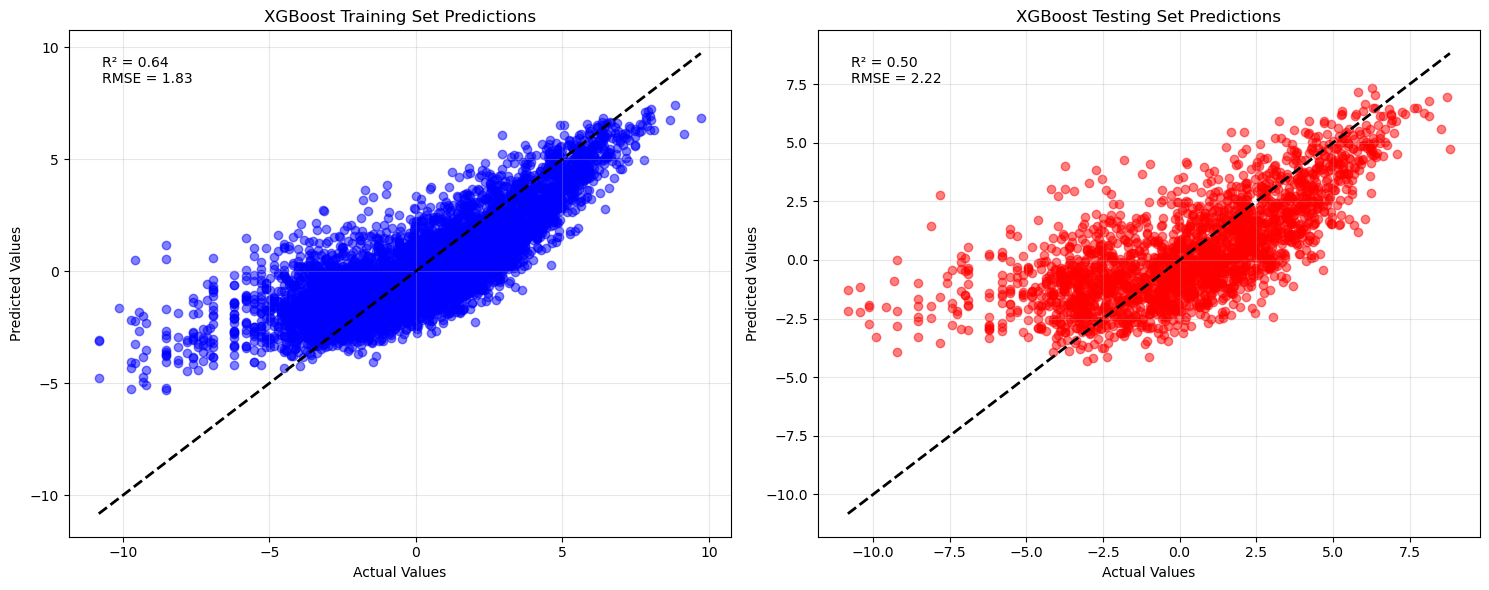

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import uniform, randint

X = merged_df[filtered_features].drop("protein_abundance_log", axis=1)
y = merged_df["protein_abundance_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Optuna best params:
#  n_estimators: 400
#   max_depth: 5
#   min_child_weight: 8
#   learning_rate: 0.01909802075491606
#   subsample: 0.6073239446002833
#   colsample_bytree: 0.8415215844751461
#   gamma: 0.6335379517543892
#   reg_alpha: 0.4690436314422055
#   reg_lambda: 3.750308472912599

xgb_best = XGBRegressor(
    n_estimators=400,
    max_depth=5,
    min_child_weight=8,
    learning_rate=0.01909802075491606,
    subsample=0.6073239446002833,
    colsample_bytree=0.8415215844751461,
    gamma=0.6335379517543892,
    reg_alpha=0.4690436314422055,
    reg_lambda=3.750308472912599,
    random_state=42,
    objective="reg:squarederror",
)
xgb_best.fit(X_train_scaled, y_train)

y_train_pred = xgb_best.predict(X_train_scaled)
y_test_pred = xgb_best.predict(X_test_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


def plot_predictions(ax, y_true, y_pred, title, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color)

    min_val = min(y_true)
    max_val = max(y_true)
    ax.plot(
        [min_val, max_val], [min_val, max_val], "k--", lw=2, label="Perfect Prediction"
    )

    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Handle potential division by zero in MAPE
    mask = y_true != 0
    mape = (
        np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        if np.any(mask)
        else np.nan
    )

    ax.text(
        0.05,
        0.95,
        (
            f"R² = {r2:.2f}\nRMSE = {rmse:.2f}"
        ),
        transform=ax.transAxes,
        verticalalignment="top",
    )


# Plot predictions
plot_predictions(ax1, y_train, y_train_pred, "XGBoost Training Set Predictions", "blue")
plot_predictions(ax2, y_test, y_test_pred, "XGBoost Testing Set Predictions", "red")

plt.tight_layout()
plt.show()

In [54]:
import pickle

with open('ProtAbRegressor_xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_best, file)

In [1]:
X_test_scaled

NameError: name 'X_test_scaled' is not defined